 # Football Data Analysis Project 

# Python libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import warnings
warnings.filterwarnings('ignore')

# hypothesis
from scipy.stats import t
from scipy.stats import norm
import math


# Linearregression is for =regression
# logistic regression is for =classification
# Machine Learning (common for both Regression and Classification):

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression  # Classification
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,r2_score


# optional method for Regression:
from sklearn.tree import DecisionTreeRegressor

# KNN for classification:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score # roc and auc curve score and plot library:
from sklearn.model_selection import cross_val_score

# K-Mean Clustering(unsupervised):
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
# In unsupervised there is no metrics to check accuracy:Instead two methods we have:
# 1.Elbow method
# 2.Silhouette Score method.

In [2]:
df1=pd.read_excel(r"C:\Users\Baskar\OneDrive\Desktop\Capston project\appearances.xlsx")
df2=pd.read_excel(r"C:\Users\Baskar\OneDrive\Desktop\Capston project\game_events.xlsx")
df3=pd.read_excel(r"C:\Users\Baskar\OneDrive\Desktop\Capston project\game_lineups.xlsx")
df4=pd.read_excel(r"C:\Users\Baskar\OneDrive\Desktop\Capston project\games.xlsx")
df5=pd.read_excel(r"C:\Users\Baskar\OneDrive\Desktop\Capston project\players.xlsx")
print(df1,df2,df3,df4,df5)

       appearance_id  game_id  player_id       date          player_name  \
0     2224728_119169  2224728     119169 2012-07-13      Aron Johannsson   
1     2224732_161244  2224732     161244 2012-07-14        Conor O'Brien   
2      2224729_39467  2224729      39467 2012-07-15     Clarence Goodson   
3     2232104_119169  2232104     119169 2012-07-19      Aron Johannsson   
4      2219794_39475  2219794      39475 2012-07-22       Sacha Kljestan   
...              ...      ...        ...        ...                  ...   
3563  3415291_537467  3415291     537467 2020-09-26        Joseph Efford   
3564  3415296_367423  3415296     367423 2020-09-26         Chris Durkin   
3565  3431983_478940  3431983     478940 2020-09-26        Reggie Cannon   
3566  3450575_361104  3450575     361104 2020-09-26         Sergino Dest   
3567  3412904_124732  3412904     124732 2020-09-27  John Anthony Brooks   

     competition_id  yellow_cards  red_cards  goals  assists  minutes_played  
0       

In [3]:
merged_df=df1.merge(df2,on=['game_id','player_id'],how='outer').merge(df3,on=['game_id','player_id'],how='outer').merge(df4,on='game_id',how='outer').merge(df5,on='player_id',how='outer')
print(merged_df)

     appearance_id    game_id  player_id     date_x   player_name_x  \
0     2222536_1321  2222536.0       1321 2012-08-26  Jermaine Jones   
1     2231391_1321  2231391.0       1321 2012-09-01  Jermaine Jones   
2     2231391_1321  2231391.0       1321 2012-09-01  Jermaine Jones   
3     2231397_1321  2231397.0       1321 2012-09-28  Jermaine Jones   
4     2231397_1321  2231397.0       1321 2012-09-28  Jermaine Jones   
...            ...        ...        ...        ...             ...   
4649           NaN        NaN     795738        NaT             NaN   
4650           NaN        NaN     796429        NaT             NaN   
4651           NaN        NaN     860812        NaT             NaN   
4652           NaN        NaN     971613        NaT             NaN   
4653           NaN        NaN    1163778        NaT             NaN   

     competition_id_x  yellow_cards  red_cards  goals  assists  ...  \
0                  L1           1.0        0.0    0.0      1.0  ...   
1    

In [4]:
new_df=merged_df.copy()
print(new_df)

     appearance_id    game_id  player_id     date_x   player_name_x  \
0     2222536_1321  2222536.0       1321 2012-08-26  Jermaine Jones   
1     2231391_1321  2231391.0       1321 2012-09-01  Jermaine Jones   
2     2231391_1321  2231391.0       1321 2012-09-01  Jermaine Jones   
3     2231397_1321  2231397.0       1321 2012-09-28  Jermaine Jones   
4     2231397_1321  2231397.0       1321 2012-09-28  Jermaine Jones   
...            ...        ...        ...        ...             ...   
4649           NaN        NaN     795738        NaT             NaN   
4650           NaN        NaN     796429        NaT             NaN   
4651           NaN        NaN     860812        NaT             NaN   
4652           NaN        NaN     971613        NaT             NaN   
4653           NaN        NaN    1163778        NaT             NaN   

     competition_id_x  yellow_cards  red_cards  goals  assists  ...  \
0                  L1           1.0        0.0    0.0      1.0  ...   
1    

# Data Preprocessing:

# Null Value Treatment:

In [6]:
new_df.isnull().sum()

appearance_id                   932
game_id                          60
player_id                         0
date_x                          932
player_name_x                   932
competition_id_x                932
yellow_cards                    932
red_cards                       932
goals                           932
assists                         932
minutes_played                  932
game_event_id                  2805
date_y                         2805
minute                         2805
type_x                         2805
description                    3738
player_in_id                   3499
player_assist_id               4514
game_lineups_id                4419
type_y                         4419
number                         4419
player_name_y                  4419
team_captain                   4419
position_x                     4419
competition_id_y                928
season                          928
round                           928
date                        

In [7]:
print('=============================Identifying Categorical columns==============================')
print(new_df.select_dtypes(include='object').dtypes)
print('=============================Identifying Numerical columns==============================')
print(new_df.select_dtypes(exclude='object').dtypes)

=============================Identifying Categorical columns==============================
appearance_id             object
player_name_x             object
competition_id_x          object
game_event_id             object
type_x                    object
description               object
game_lineups_id           object
type_y                    object
player_name_y             object
position_x                object
competition_id_y          object
round                     object
home_club_manager_name    object
away_club_manager_name    object
stadium                   object
referee                   object
home_club_name            object
away_club_name            object
aggregate                 object
competition_type          object
name                      object
player_code               object
country_of_birth          object
sub_position              object
position_y                object
foot                      object
agent_name                object
dtype: object
====

# Null value Treatment for Categorical and Numerical Columns:

In [6]:
for col in new_df.select_dtypes(include='object').columns:
    if new_df[col].isnull().sum()>0:
        new_df[col].fillna(new_df[col].mode()[0],inplace=True)

In [7]:
for col in new_df.select_dtypes(include=['int64','float64']).columns:
    if new_df[col].isnull().sum()>0:
        new_df[col].fillna(new_df[col].mean(),inplace=True)

# Filled Date Columns with mode:

In [8]:
for col in ['date_x','date_y','date','contract_expiration_date']:
    if new_df[col].isnull().sum()>0:
        new_df[col].fillna(new_df[col].mode()[0],inplace=True)

# Verification of Null value Treatment:

In [15]:
new_df.isnull().sum()

appearance_id                     0
game_id                           0
player_id                         0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
game_event_id                     0
date_y                            0
minute                            0
type_x                            0
description                       0
player_in_id                      0
player_assist_id                  0
game_lineups_id                   0
type_y                            0
number                            0
player_name_y                     0
team_captain                      0
position_x                        0
competition_id_y                  0
season                            0
round                             0
date                        

In [15]:
for col in new_df[['home_club_formation','away_club_formation']]:
    if new_df[col].isnull().sum()>0:
        new_df[col].dropna(inplace=True)

In [17]:
new_df[['home_club_formation','away_club_formation']].isnull().sum()

home_club_formation    4654
away_club_formation    4654
dtype: int64

In [21]:
new_df[['home_club_formation','away_club_formation']].shape

(4654, 2)

In [19]:
(new_df[['home_club_formation','away_club_formation']]==0).sum()

home_club_formation    0
away_club_formation    0
dtype: int64

In [19]:
new_df.isnull().sum()

appearance_id                     0
game_id                           0
player_id                         0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
game_event_id                     0
date_y                            0
minute                            0
type_x                            0
description                       0
player_in_id                      0
player_assist_id                  0
game_lineups_id                   0
type_y                            0
number                            0
player_name_y                     0
team_captain                      0
position_x                        0
competition_id_y                  0
season                            0
round                             0
date                        

In [23]:
(new_df==0).sum()

appearance_id                     0
game_id                           0
player_id                         0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                   3236
red_cards                      3710
goals                          3289
assists                        3448
minutes_played                    0
game_event_id                     0
date_y                            0
minute                            0
type_x                            0
description                       0
player_in_id                      0
player_assist_id                  0
game_lineups_id                   0
type_y                            0
number                            0
player_name_y                     0
team_captain                    225
position_x                        0
competition_id_y                  0
season                            0
round                             0
date                        

In [17]:
col_impute_null=['yellow_cards','red_cards','assists','goals','home_club_goals','team_captain','away_club_goals'] 
new_df[col_impute_null]=new_df[col_impute_null].replace(0,np.nan)

In [23]:
new_df.isnull().sum()

appearance_id                     0
game_id                           0
player_id                         0
date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                   3236
red_cards                      3710
goals                          3289
assists                        3448
minutes_played                    0
game_event_id                     0
date_y                            0
minute                            0
type_x                            0
description                       0
player_in_id                      0
player_assist_id                  0
game_lineups_id                   0
type_y                            0
number                            0
player_name_y                     0
team_captain                    225
position_x                        0
competition_id_y                  0
season                            0
round                             0
date                        

# Duplicates Identification:

In [19]:
new_df.drop(columns=['appearance_id', 'game_id','player_id','player_in_id', 'player_assist_id', 'game_lineups_id','current_club_id'],inplace=True)
new_df[new_df.duplicated(keep='first')]

date_x   player_name_x competition_id_x  yellow_cards  red_cards  \
1451 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
1452 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
1453 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
1454 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
1455 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
...         ...             ...              ...           ...        ...   
4618 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4619 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4620 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4621 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4622 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   

         goals   assists  minutes_played                     game_event_id  \
1451  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
1452  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
1453  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
1454  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
1455  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
...        ...       ...             ...                               ...   
4618  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4619  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4620  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4621  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4622  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   

         date_y  ...  country_of_birth date_of_birth sub_position position_y  \
1451 2021-04-10  ...           Germany    1990-03-29   Right-Back   Defender   
1452 2021-04-10  ...           Germany    1990-03-29   Right-Back   Defender   
1453 2021-04-10  ...           Germany    1990-03-29   Right-Back   Defender   
1454 2021-04-10  ...           Germany    1990-03-29   Right-Back   Defender   
1455 2021-04-10  ...           Germany    1990-03-29   Right-Back   Defender   
...         ...  ...               ...           ...          ...        ...   
4618 2021-04-10  ...     United States    2000-03-28  Centre-Back   Defender   
4619 2021-04-10  ...     United States    2000-03-28  Centre-Back   Defender   
4620 2021-04-10  ...     United States    2000-03-28  Centre-Back   Defender   
4621 2021-04-10  ...     United States    2000-03-28  Centre-Back   Defender   
4622 2021-04-10  ...     United States    2000-03-28  Centre-Back   Defender   

       foot height_in_cm  market_value_in_eur highest_market_value_in_eur  \
1451  right        186.0             700000.0                   5000000.0   
1452  right        186.0             700000.0                   5000000.0   
1453  right        186.0             700000.0                   5000000.0   
1454  right        186.0             700000.0                   5000000.0   
1455  right        186.0             700000.0                   5000000.0   
...     ...          ...                  ...                         ...   
4618  right        188.0           10000000.0                  12000000.0   
4619  right        188.0           10000000.0                  12000000.0   
4620  right        188.0           10000000.0                  12000000.0   
4621  right        188.0           10000000.0                  12000000.0   
4622  right        188.0           10000000.0                  12000000.0   

     contract_expiration_date  agent_name  
1451               2025-06-30   Wasserman  
1452               2025-06-30   Wasserman  
1453               2025-06-30   Wasserman  
1454               2025-06-30   Wasserman  
1455               2025-06-30   Wasserman

In [21]:
new_df.drop_duplicates(keep='first',inplace=True)

In [23]:
new_df[new_df.duplicated(keep='first')]

Empty DataFrame
Columns: [date_x, player_name_x, competition_id_x, yellow_cards, red_cards, goals, assists, minutes_played, game_event_id, date_y, minute, type_x, description, type_y, number, player_name_y, team_captain, position_x, competition_id_y, season, round, date, home_club_goals, away_club_goals, home_club_position, away_club_position, home_club_manager_name, away_club_manager_name, stadium, attendance, referee, home_club_formation, away_club_formation, home_club_name, away_club_name, aggregate, competition_type, name, last_season, player_code, country_of_birth, date_of_birth, sub_position, position_y, foot, height_in_cm, market_value_in_eur, highest_market_value_in_eur, contract_expiration_date, agent_name]
Index: []

[0 rows x 50 columns]

# Outlier Treatment:

# Outlier Identification:

In [29]:
def outlier_identify(new_df):
    outlier={}
    for col in new_df.select_dtypes(exclude='object').columns:
        Q1=new_df[col].quantile(0.25)
        Q3=new_df[col].quantile(0.75)
        IQR=Q3-Q1
        LF=Q1-1.5*IQR
        UF=Q3+1.5*IQR
        outlier[col]=new_df[(new_df[col]<=LF)|(new_df[col]>=UF)]
    return outlier

# call
result=outlier_identify(new_df)
print(result)        

{'date_x': Empty DataFrame
Columns: [date_x, player_name_x, competition_id_x, yellow_cards, red_cards, goals, assists, minutes_played, game_event_id, date_y, minute, type_x, description, type_y, number, player_name_y, team_captain, position_x, competition_id_y, season, round, date, home_club_goals, away_club_goals, home_club_position, away_club_position, home_club_manager_name, away_club_manager_name, stadium, attendance, referee, home_club_formation, away_club_formation, home_club_name, away_club_name, aggregate, competition_type, name, last_season, player_code, country_of_birth, date_of_birth, sub_position, position_y, foot, height_in_cm, market_value_in_eur, highest_market_value_in_eur, contract_expiration_date, agent_name]
Index: []

[0 rows x 50 columns], 'yellow_cards': Empty DataFrame
Columns: [date_x, player_name_x, competition_id_x, yellow_cards, red_cards, goals, assists, minutes_played, game_event_id, date_y, minute, type_x, description, type_y, number, player_name_y, team_c

# Verified outlier with boxplot:

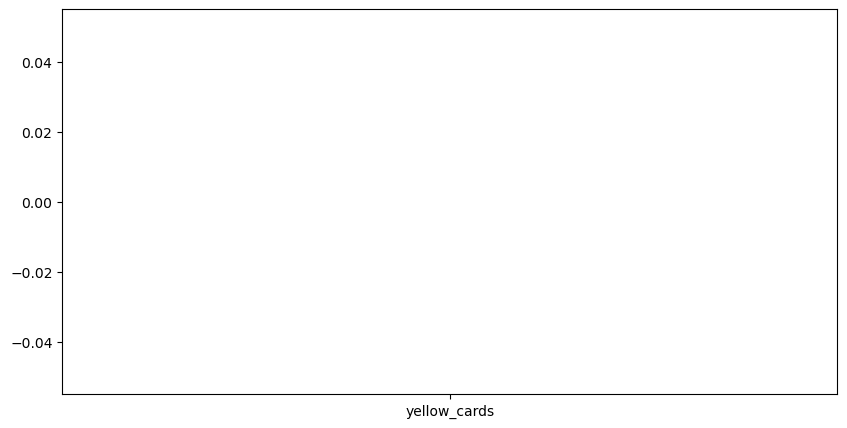

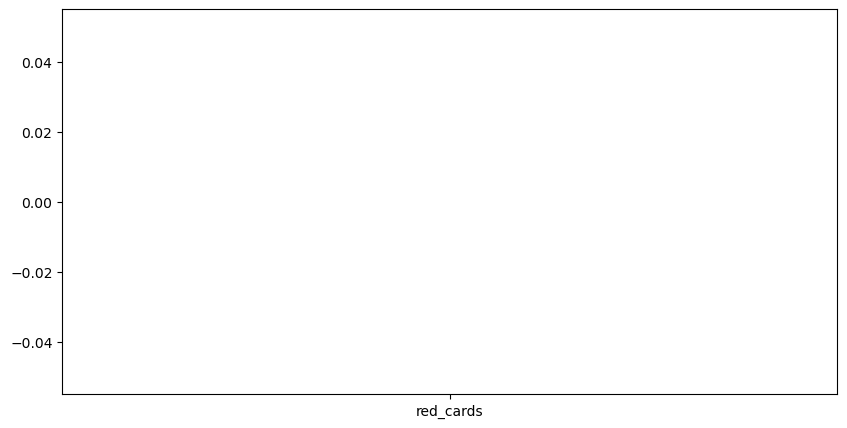

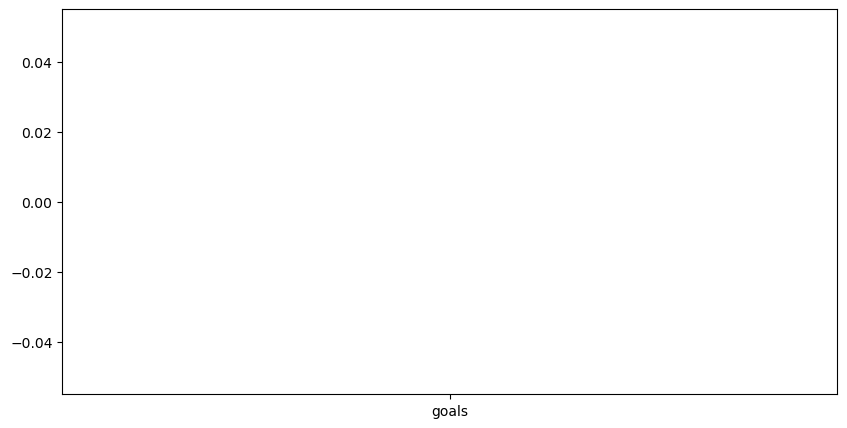

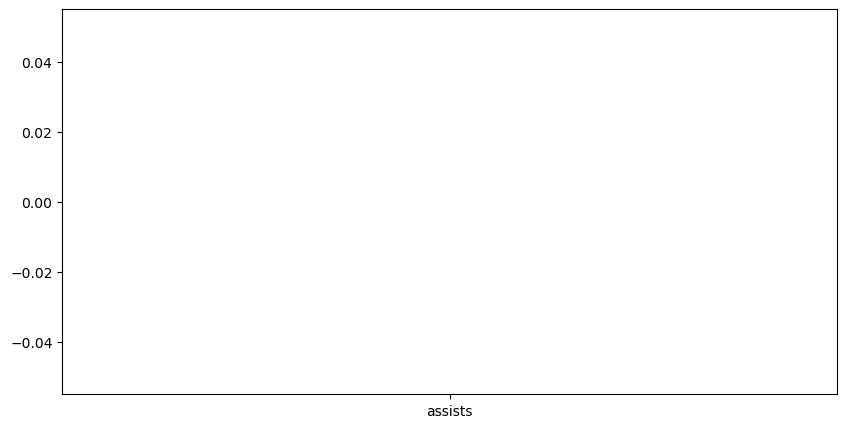

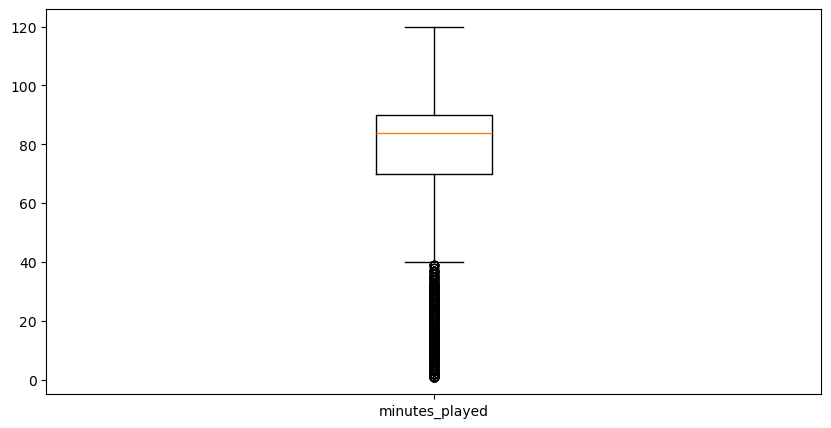

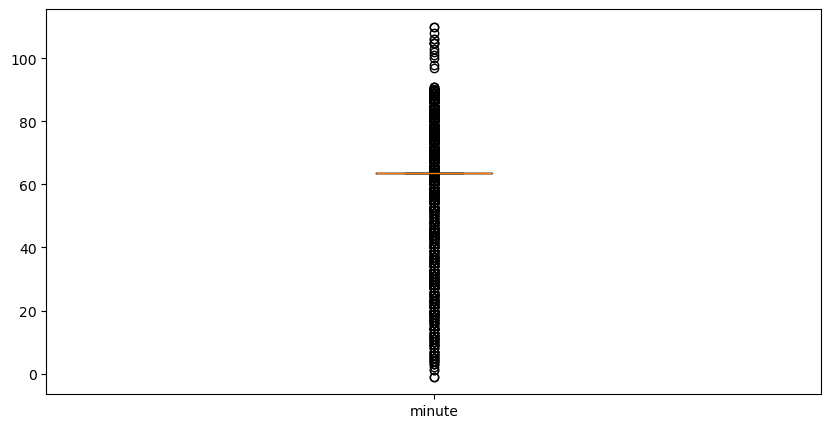

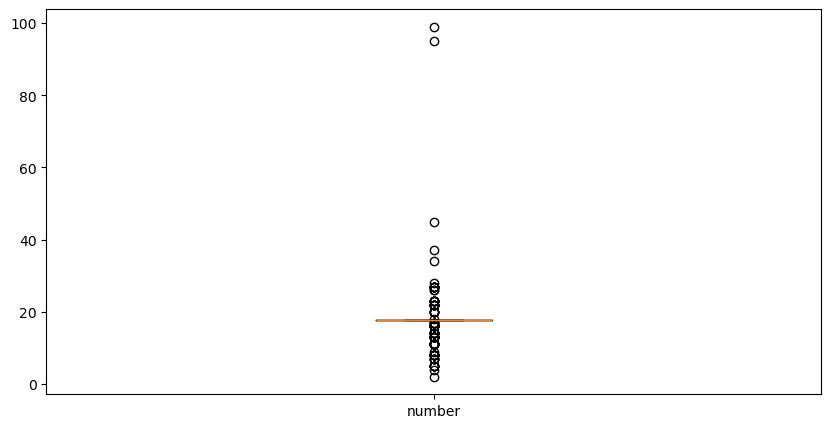

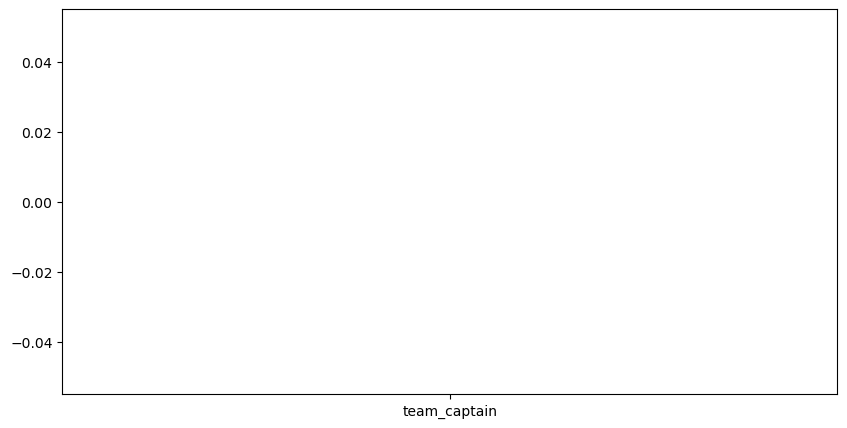

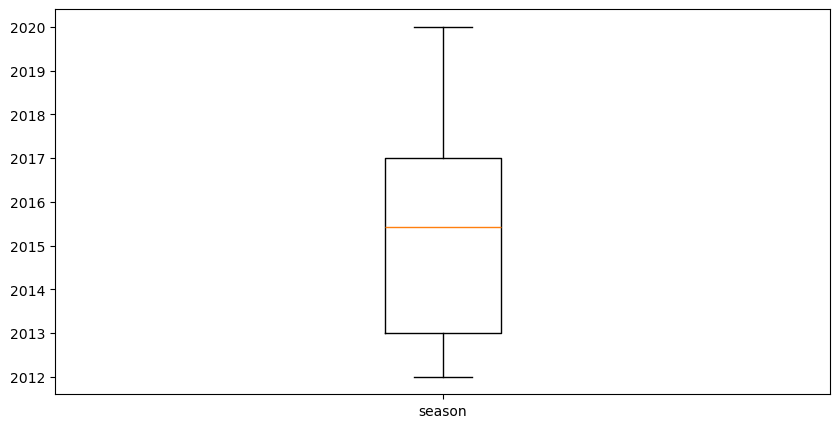

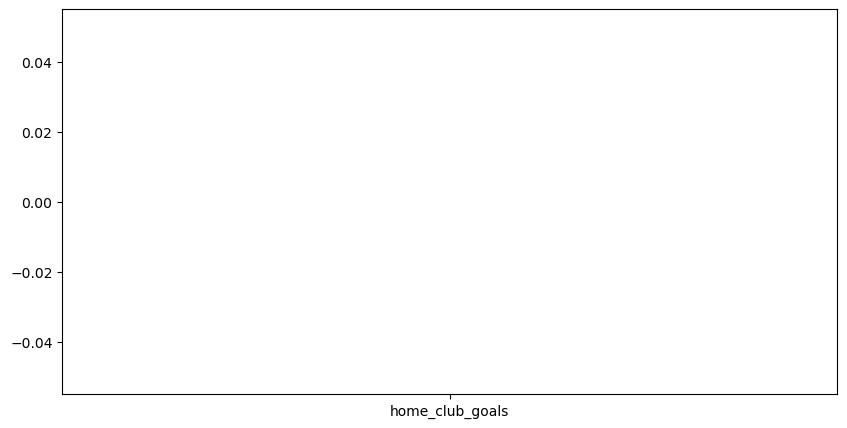

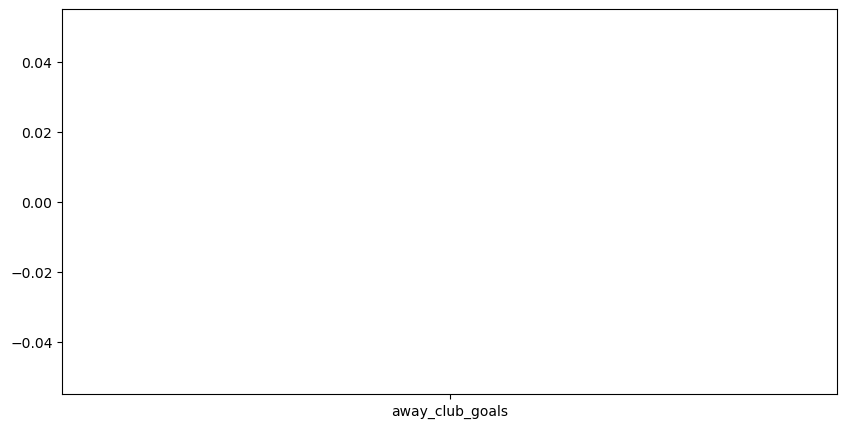

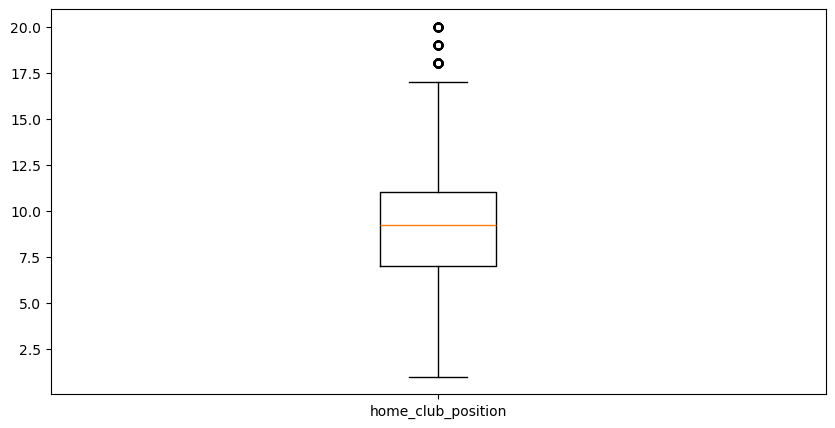

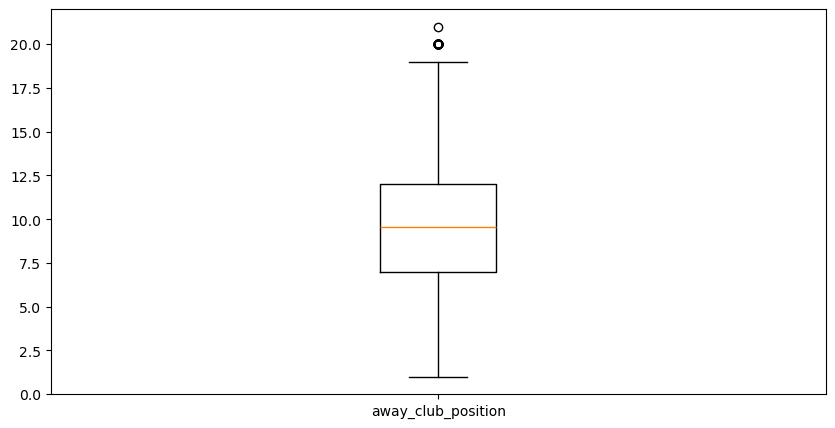

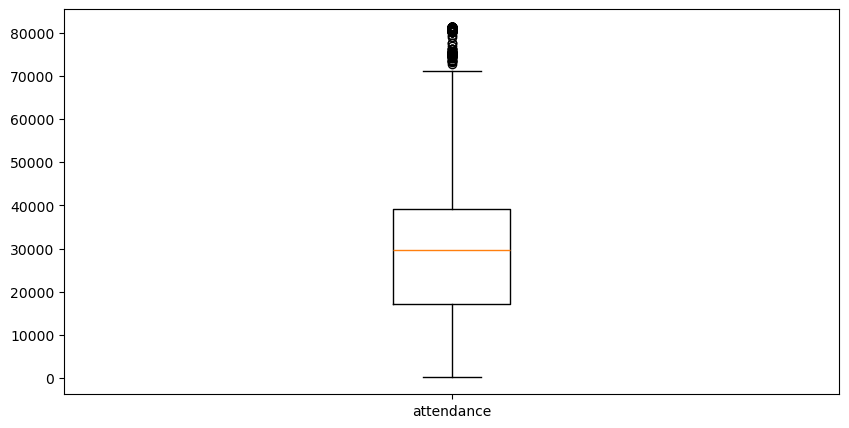

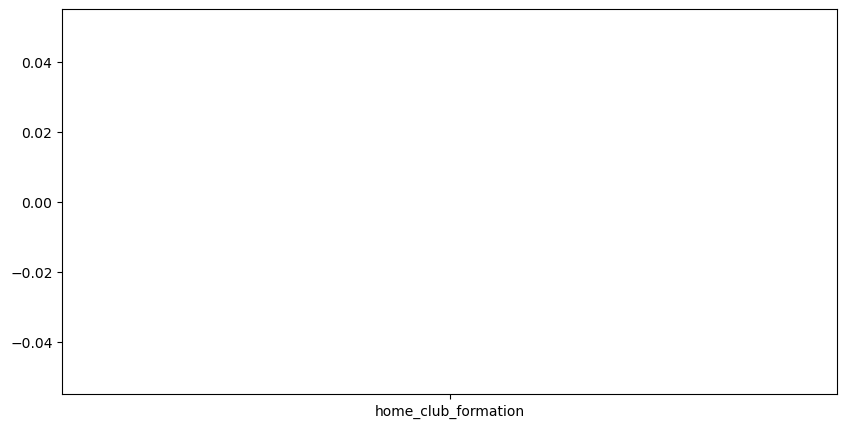

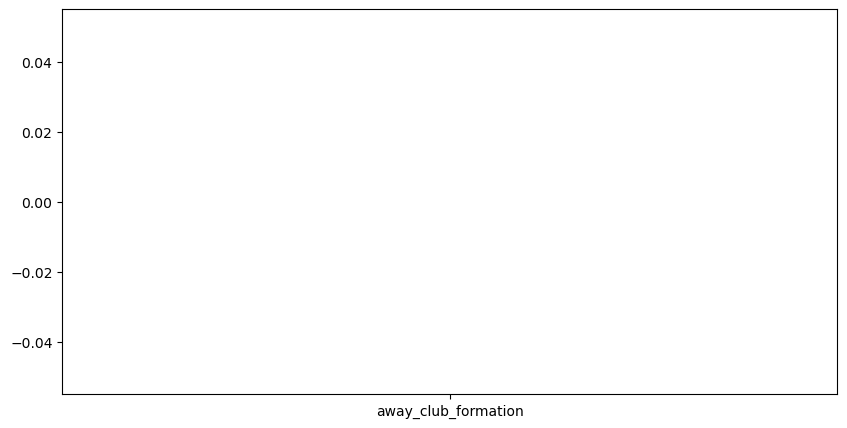

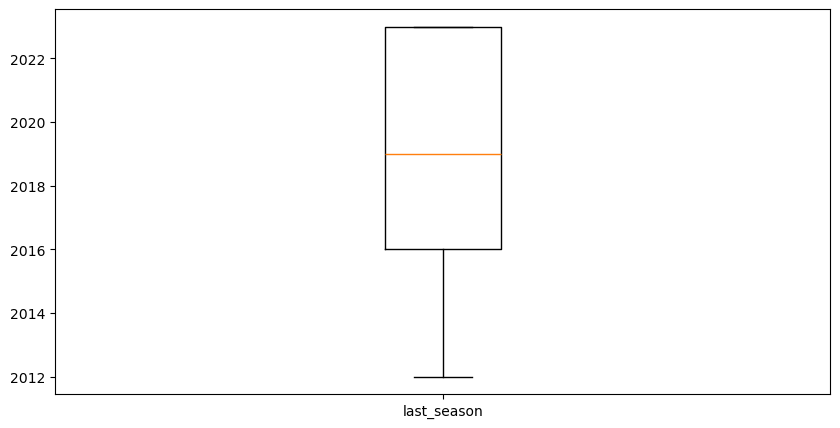

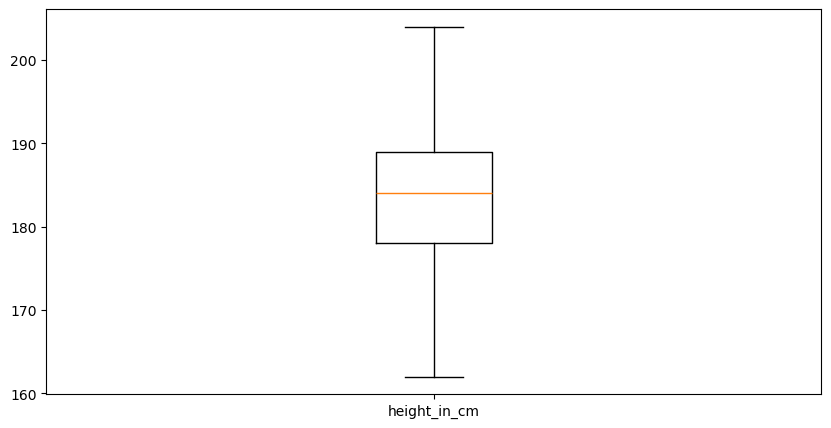

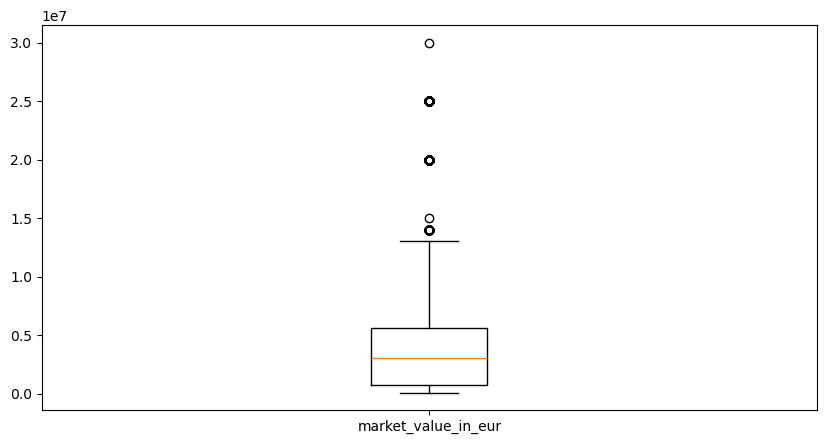

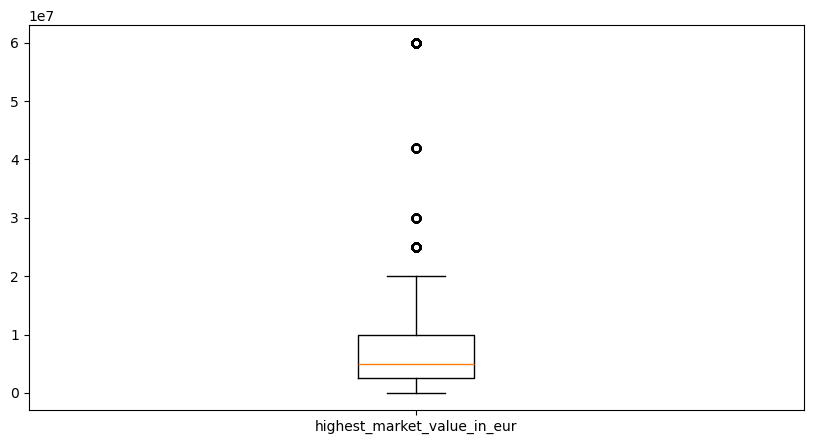

In [35]:
for col in new_df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(new_df[col],labels=[col])
    plt.show()

# Outlier Treatment:

In [25]:
def replace_outlier(new_df):
    for col in new_df.select_dtypes(include=['int64','float64']).columns:
        Q1=new_df[col].quantile(0.25)
        Q3=new_df[col].quantile(0.75)
        IQR=Q3-Q1
        LF=Q1-1.5*IQR
        UF=Q3+1.5*IQR
        median=new_df[col].median()
        new_df[col]=new_df[col].where((new_df[col]>=LF)&(new_df[col]<=UF),median)
    return new_df


# call
result1=replace_outlier(new_df)
new_df=result1 
new_df

date_x   player_name_x competition_id_x  yellow_cards  red_cards  \
0    2012-08-26  Jermaine Jones               L1      1.000000   0.003224   
1    2012-09-01  Jermaine Jones               L1      0.134068   0.003224   
2    2012-09-01  Jermaine Jones               L1      0.134068   0.003224   
3    2012-09-28  Jermaine Jones               L1      1.000000   0.003224   
4    2012-09-28  Jermaine Jones               L1      1.000000   0.003224   
...         ...             ...              ...           ...        ...   
4649 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4650 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4651 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4652 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   
4653 2012-11-03  Fabian Johnson               L1      0.134068   0.003224   

         goals   assists  minutes_played                     game_event_id  \
0     0.145352  0.076303       90.000000  02d605a5c2dc4f9a6721daa583fa5405   
1     1.000000  0.076303       90.000000  4ea9fd2a80b5c0cf02905cccfa87f98b   
2     1.000000  0.076303       90.000000  7d0199bfc8a6e132d032816b61d5a632   
3     0.145352  0.076303       73.000000  139b5be2ca5c02d0c31aaa6fa661e27d   
4     0.145352  0.076303       73.000000  14860fdaded917126773fc5174e3fd6f   
...        ...       ...             ...                               ...   
4649  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4650  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4651  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4652  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   
4653  0.145352  0.076303       70.705803  0010a0fa5d07cb56507dafd5b6c9b9ca   

         date_y  ...  country_of_birth date_of_birth        sub_position  \
0    2012-08-26  ...           Germany    1981-11-03  Defensive Midfield   
1    2012-09-01  ...           Germany    1981-11-03  Defensive Midfield   
2    2012-09-01  ...           Germany    1981-11-03  Defensive Midfield   
3    2012-09-28  ...           Germany    1981-11-03  Defensive Midfield   
4    2012-09-28  ...           Germany    1981-11-03  Defensive Midfield   
...         ...  ...               ...           ...                 ...   
4649 2021-04-10  ...     United States    2003-08-26  Attacking Midfield   
4650 2021-04-10  ...     United States    2003-11-18          Right-Back   
4651 2021-04-10  ...     United States    2002-04-22         Left Winger   
4652 2021-04-10  ...     United States    2000-06-21  Defensive Midfield   
4653 2021-04-10  ...     United States    2002-06-13      Centre-Forward   

     position_y   foot height_in_cm  market_value_in_eur  \
0      Midfield   both        184.0         5.634921e+06   
1      Midfield   both        184.0         5.634921e+06   
2      Midfield   both        184.0         5.634921e+06   
3      Midfield   both        184.0         5.634921e+06   
4      Midfield   both        184.0         5.634921e+06   
...         ...    ...          ...                  ...   
4649   Midfield  right        175.0         4.500000e+06   
4650   Defender  right        185.0         1.500000e+06   
4651     Attack  right        182.0         3.500000e+05   
4652   Midfield  right        193.0         1.500000e+05   
4653     Attack  right        193.0         5.634921e+06   

     highest_market_value_in_eur contract_expiration_date   agent_name  
0                   8.000000e+06               2024-06-30    Wasserman  
1                   8.000000e+06               2024-06-30    Wasserman  
2                   8.000000e+06               2024-06-30    Wasserman  
3                   8.000000e+06               2024-06-30    Wasserman  
4                   8.000000e+06               2024-06-30    Wasserman  
...                          ...                      ...          ...  
46

# Verified outlier are replaced with median using boxplot:

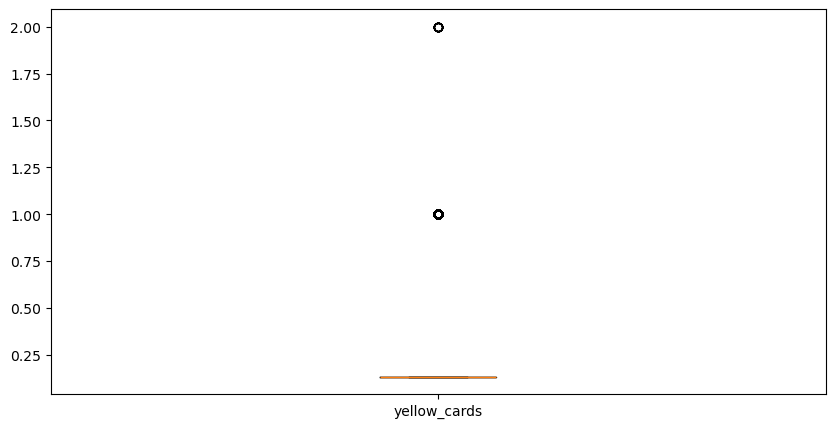

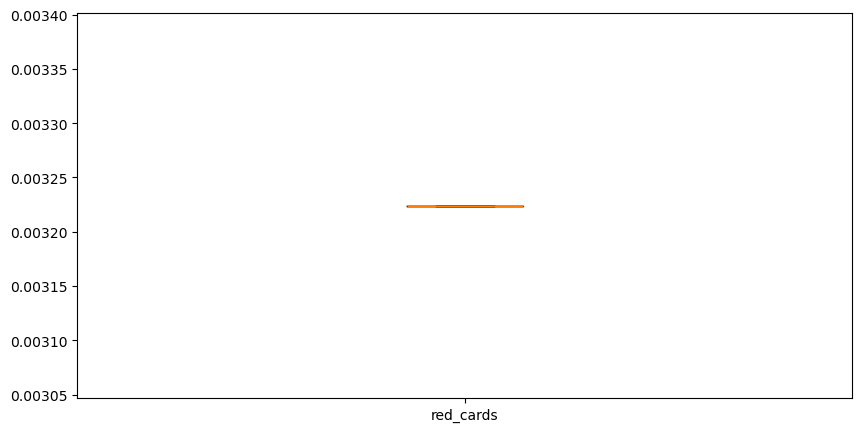

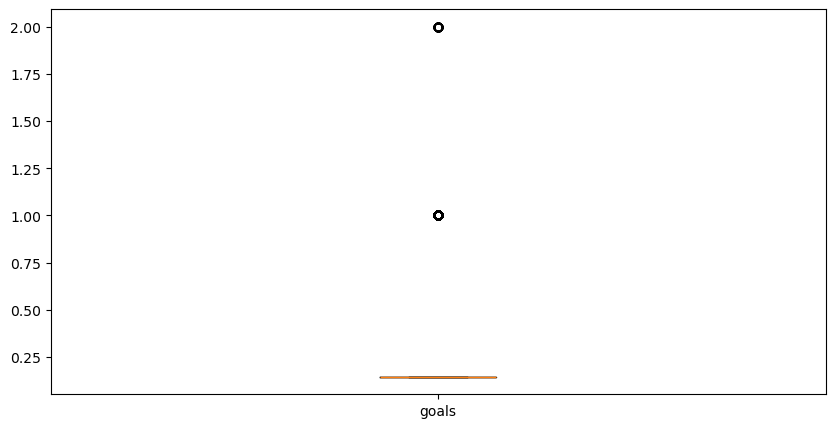

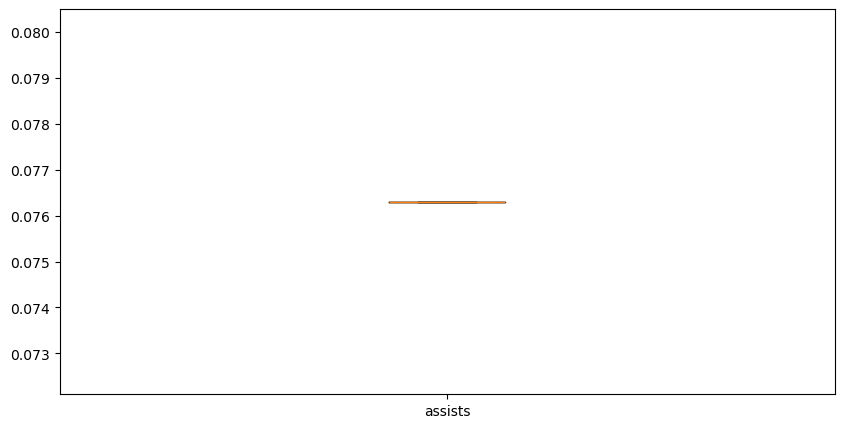

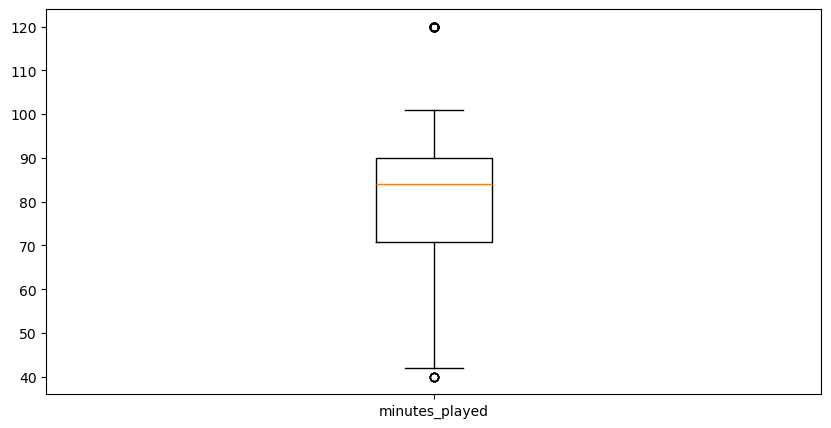

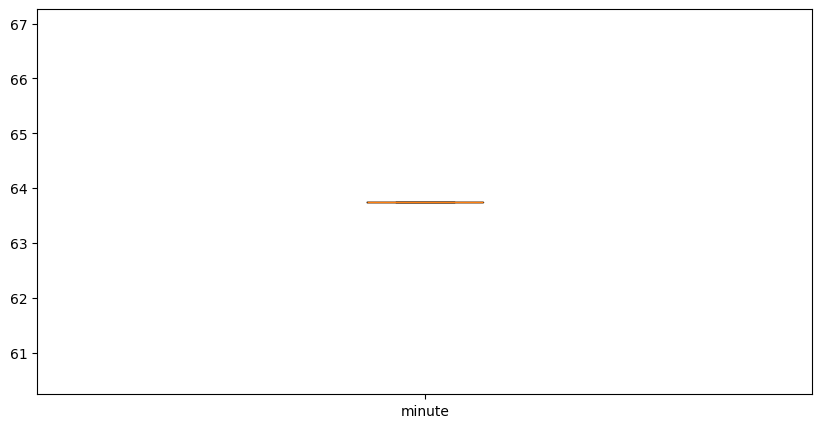

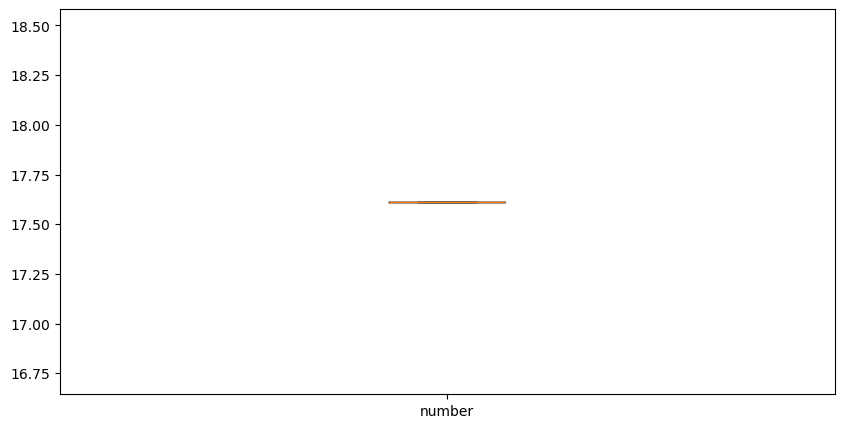

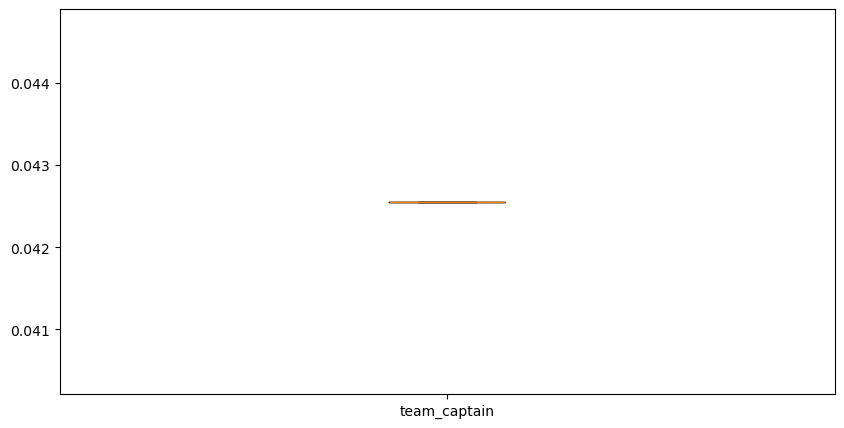

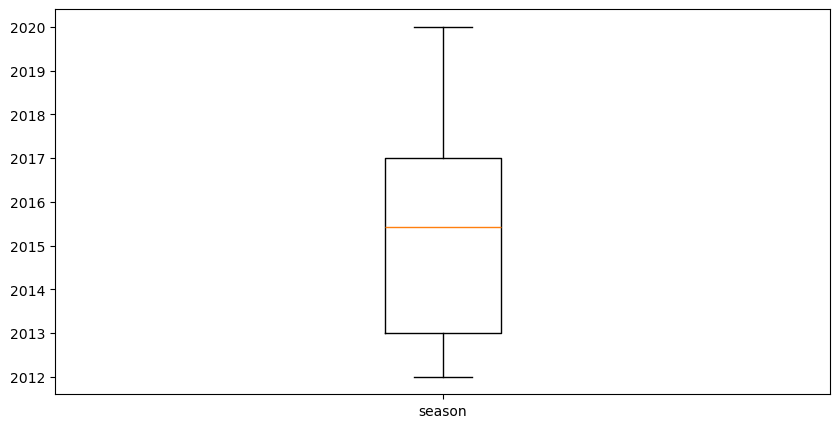

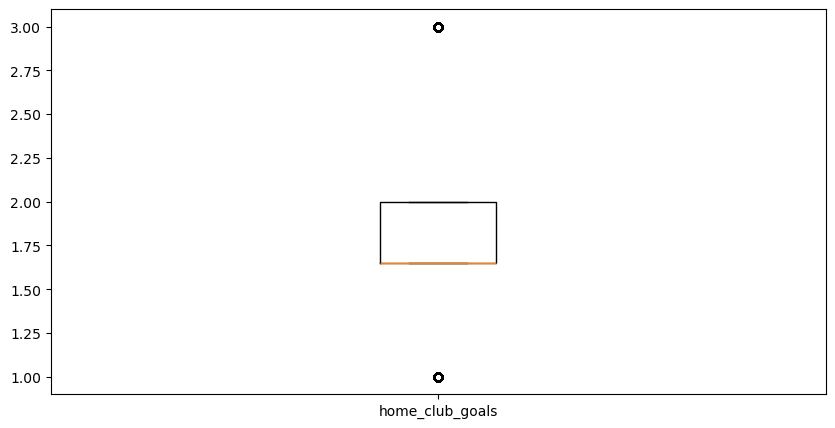

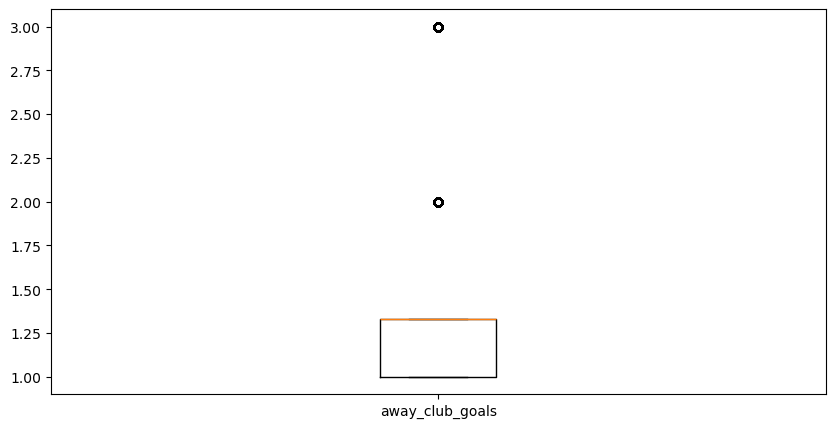

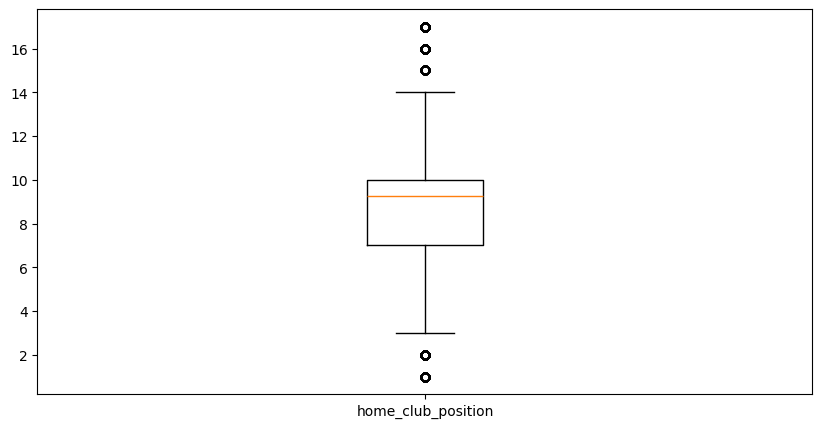

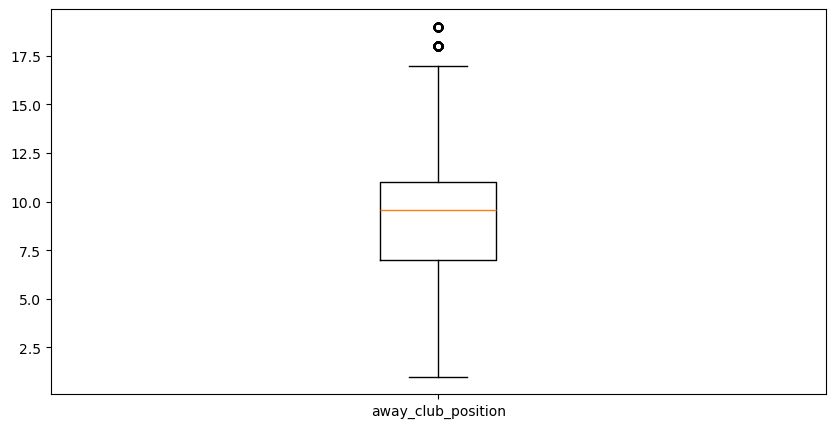

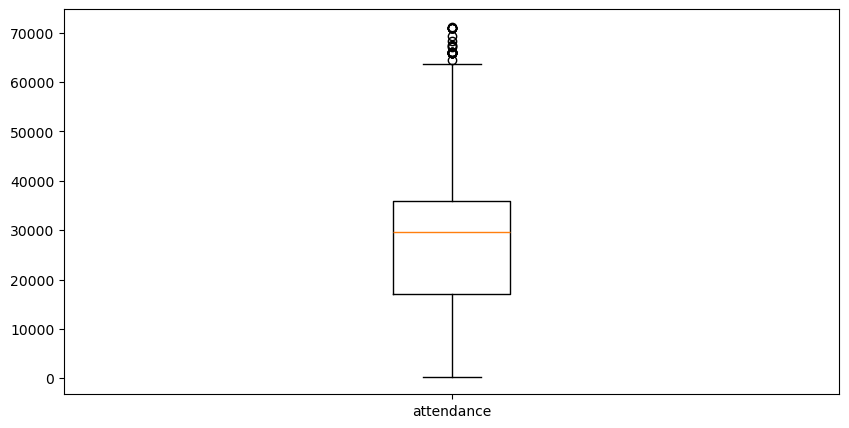

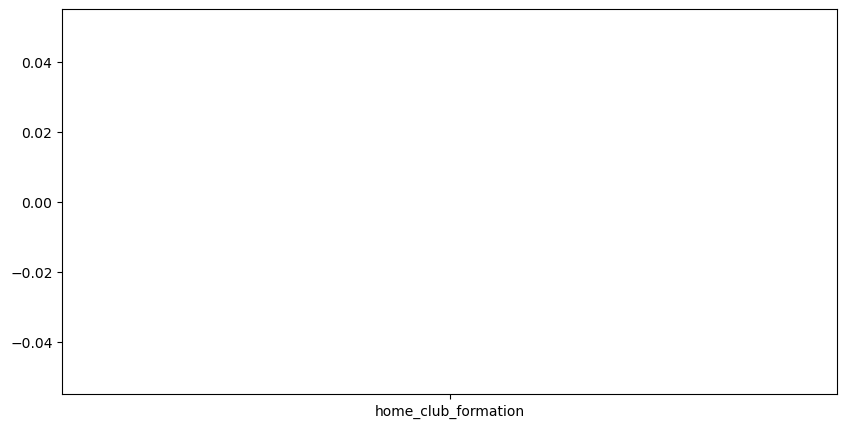

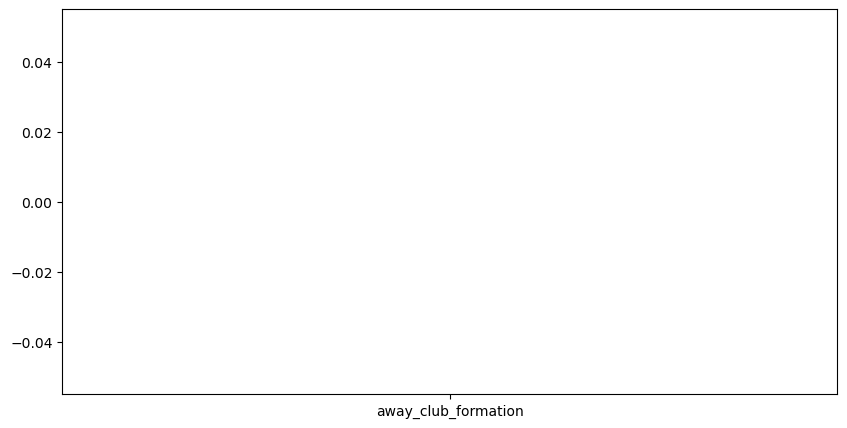

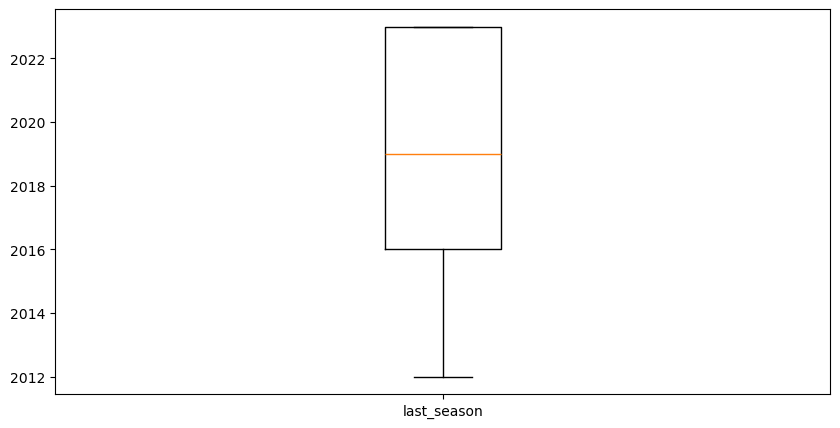

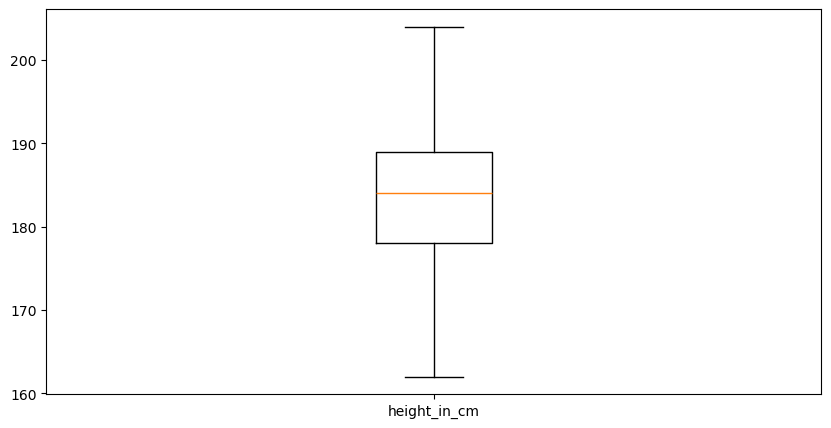

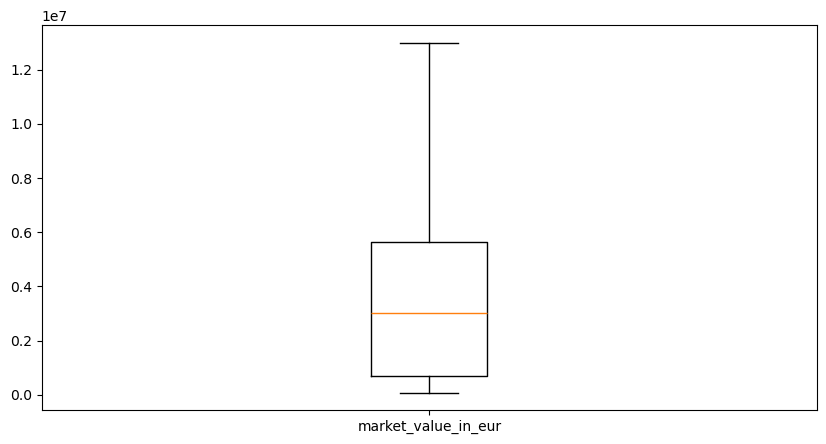

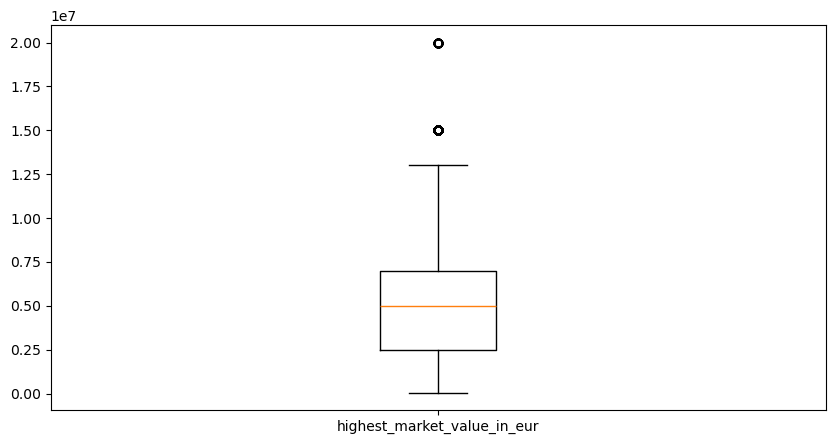

In [39]:
for col in new_df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(new_df[col],labels=[col])
    plt.show()

# Understanding the dataset:

In [40]:
print('=======================================Information about dataset=======================================')
print(new_df.info())
print('=======================================Statistical Values of dataset=======================================')
print(new_df.describe().T)
print('=======================================Value counts of dataset=======================================')
print(new_df.value_counts())
print('=======================================Number of unique values in the dataset=======================================')
print(new_df.nunique())
print('=======================================First 5 record of dataset =======================================')
print(new_df.head())
print('=======================================Last 5 record of dataset=======================================')
print(new_df.tail())
print('=======================================Structure of dataset=======================================')
print(new_df.shape)
print('=======================================Size of dataset=======================================')
print(new_df.size)
print('=======================================Dimension of dataset=======================================')
print(new_df.ndim)

=======================================Information about dataset=======================================
<class 'pandas.core.frame.DataFrame'>
Index: 4554 entries, 0 to 4653
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date_x                       4554 non-null   datetime64[ns]
 1   player_name_x                4554 non-null   object        
 2   competition_id_x             4554 non-null   object        
 3   yellow_cards                 4554 non-null   float64       
 4   red_cards                    4554 non-null   float64       
 5   goals                        4554 non-null   float64       
 6   assists                      4554 non-null   float64       
 7   minutes_played               4554 non-null   float64       
 8   game_event_id                4554 non-null   object        
 9   date_y                       4554 non-null   datetime64[ns]
 10  minute   

# Visualization Understanding Part:

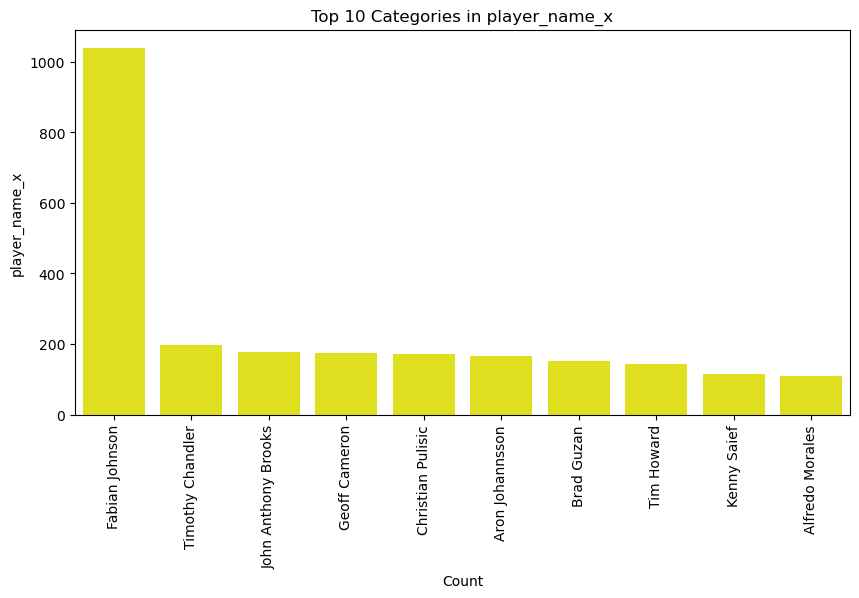

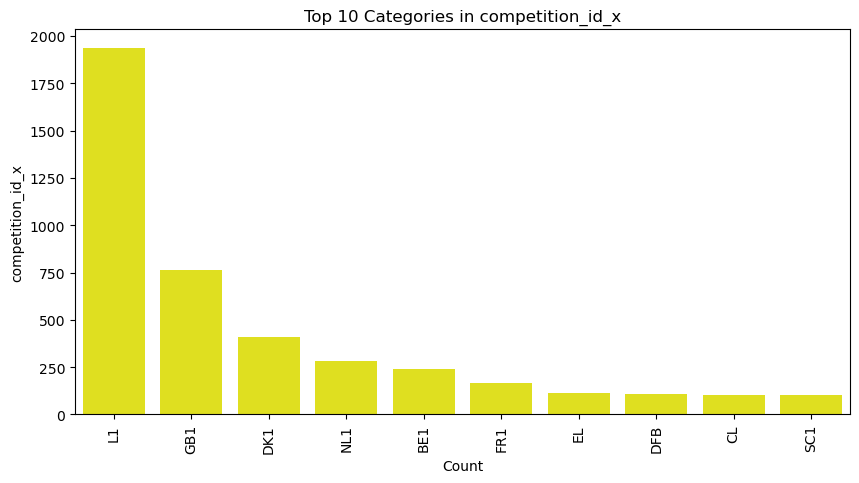

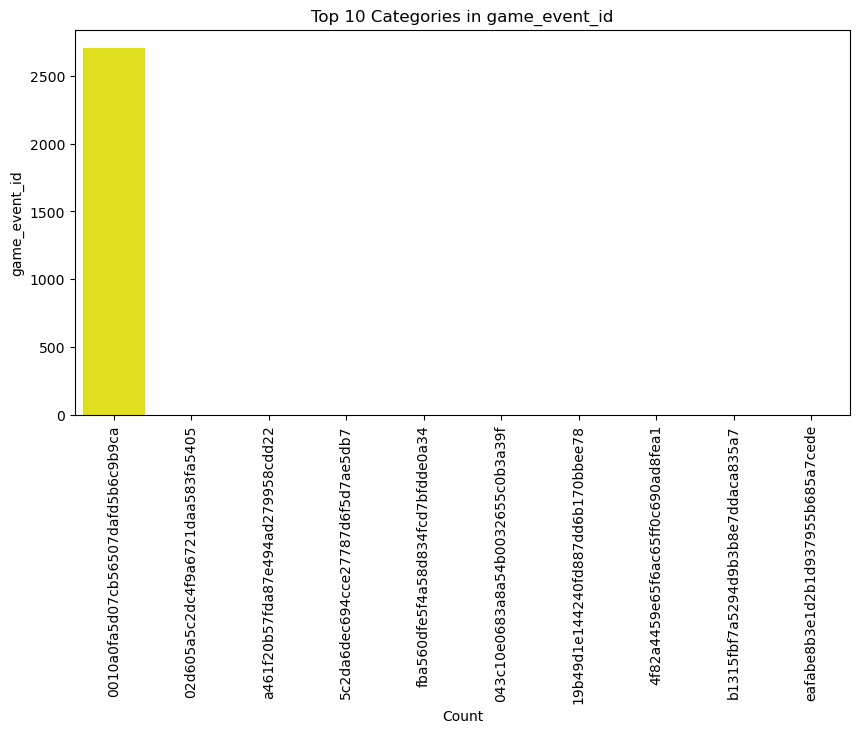

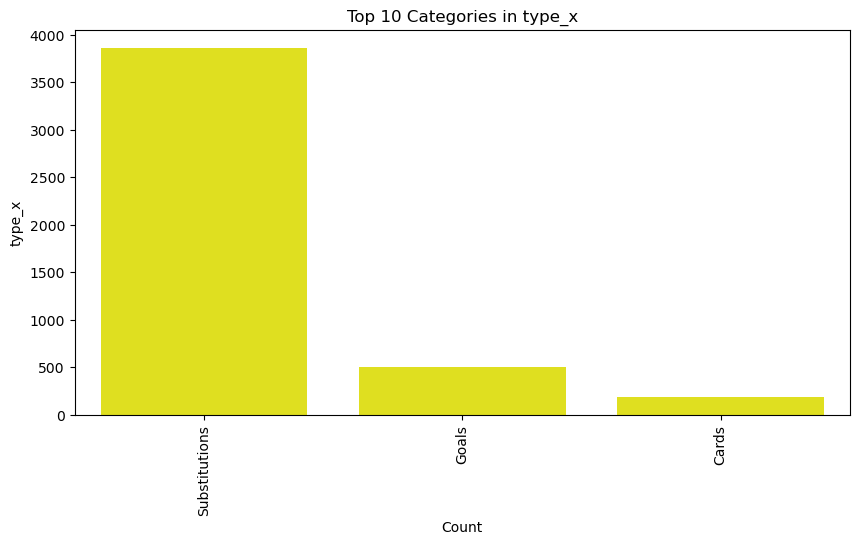

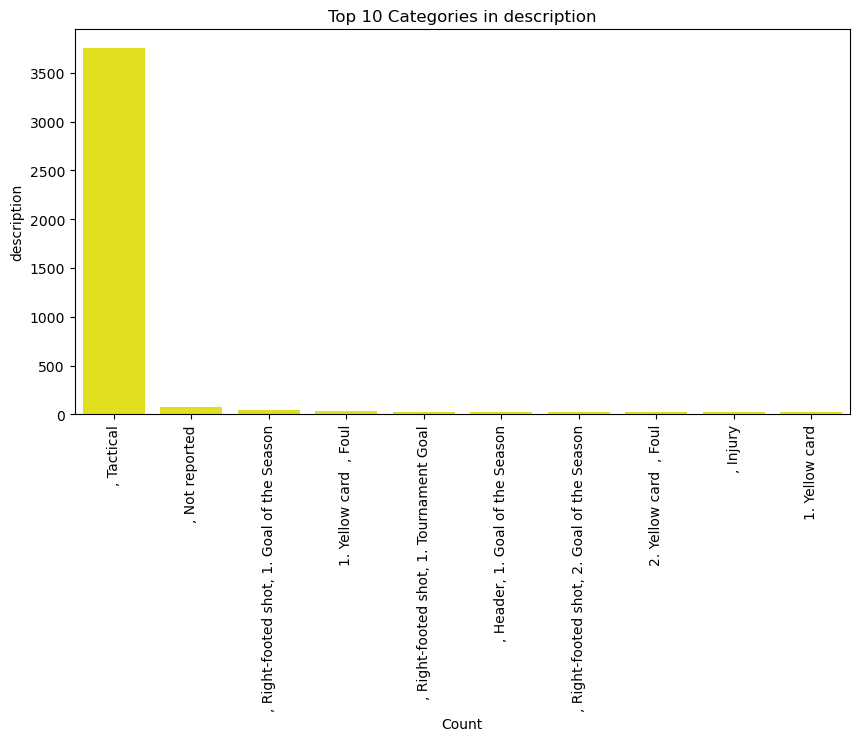

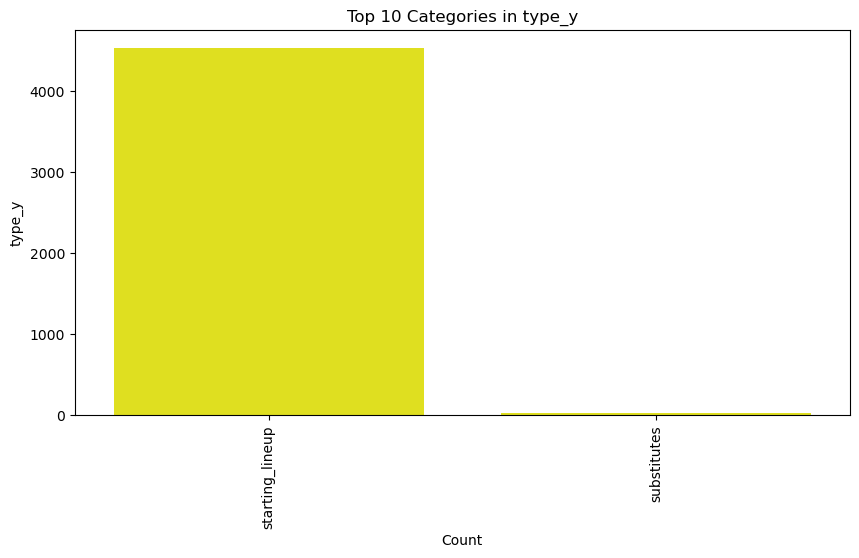

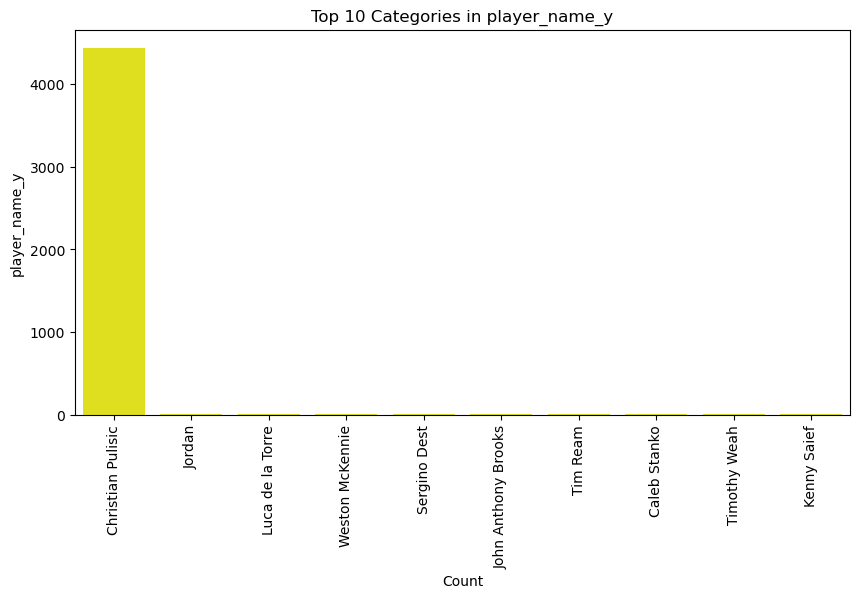

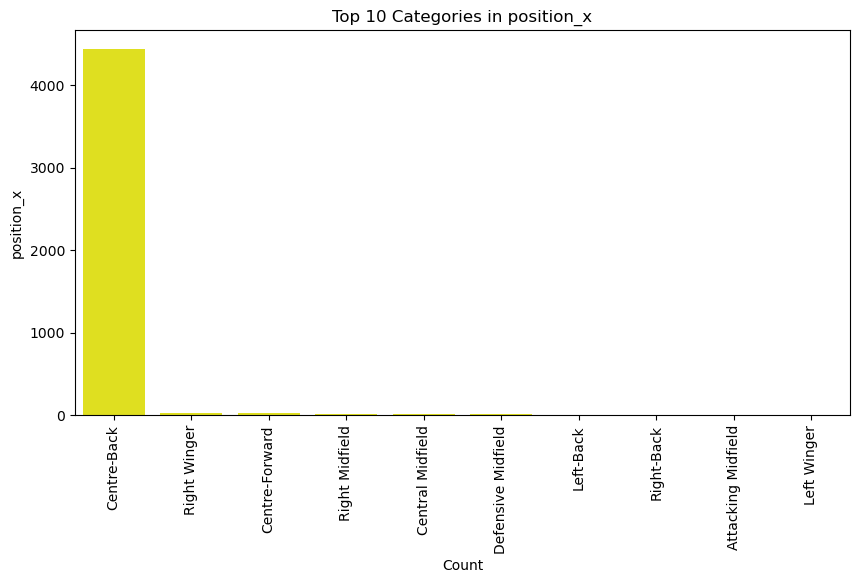

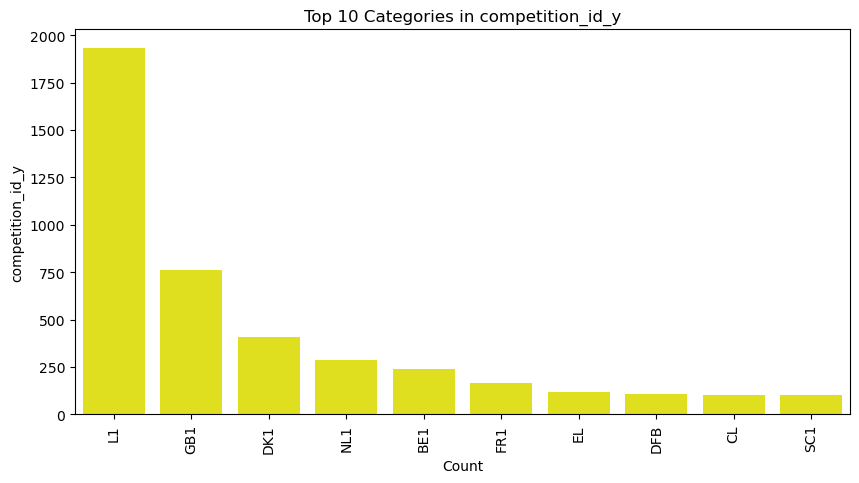

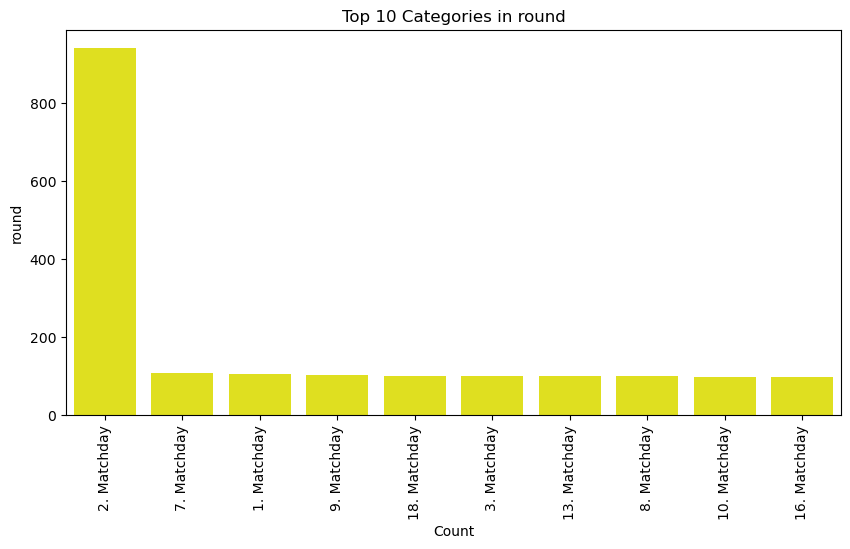

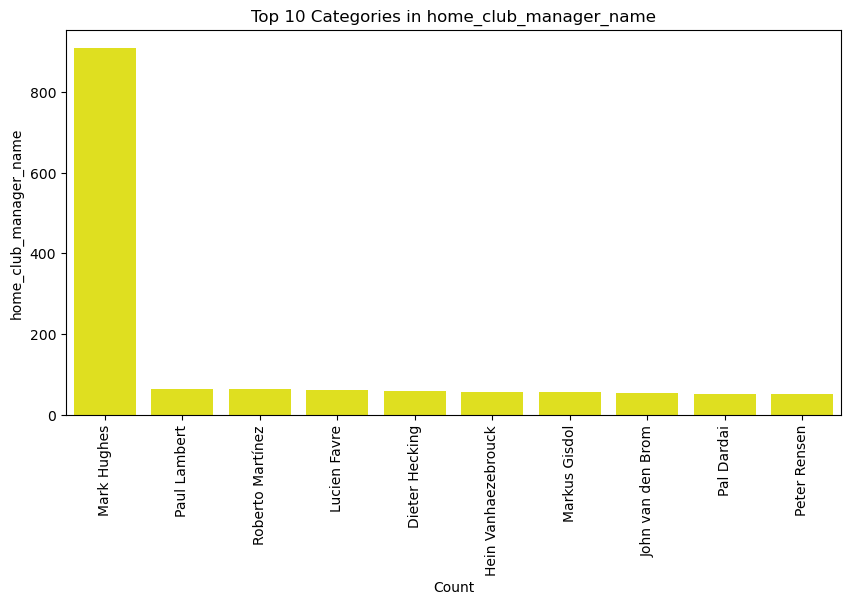

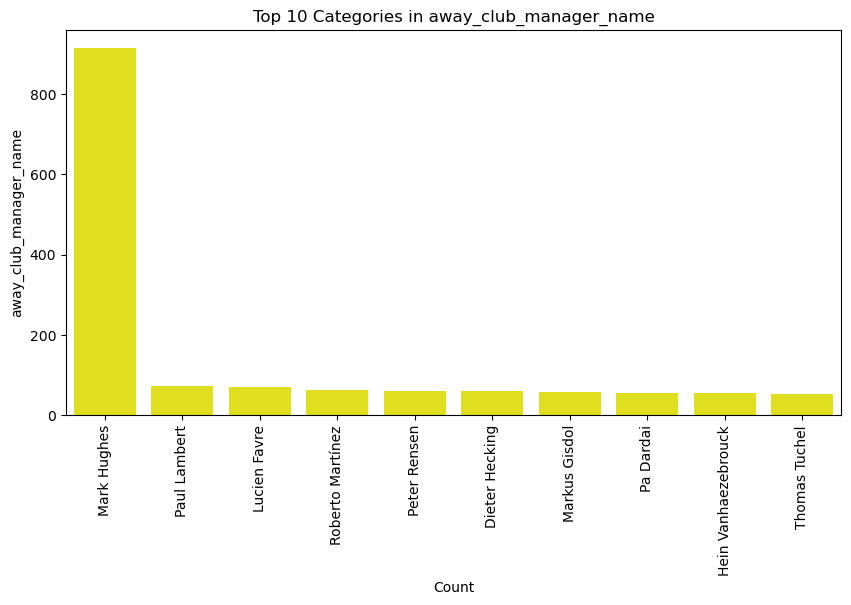

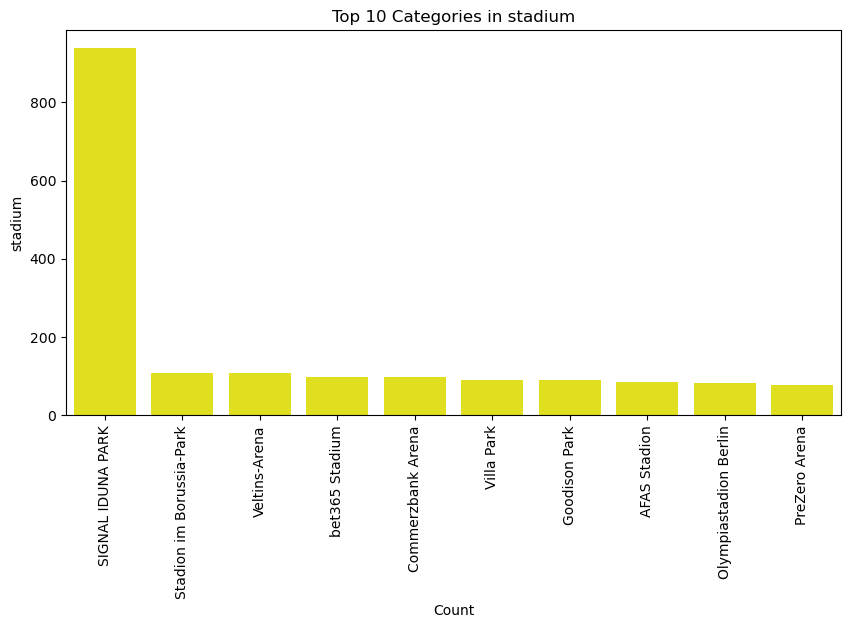

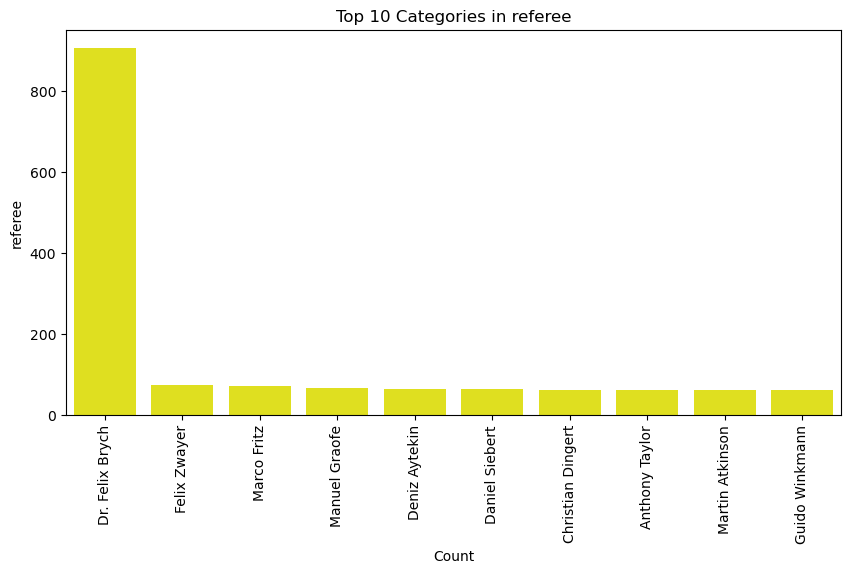

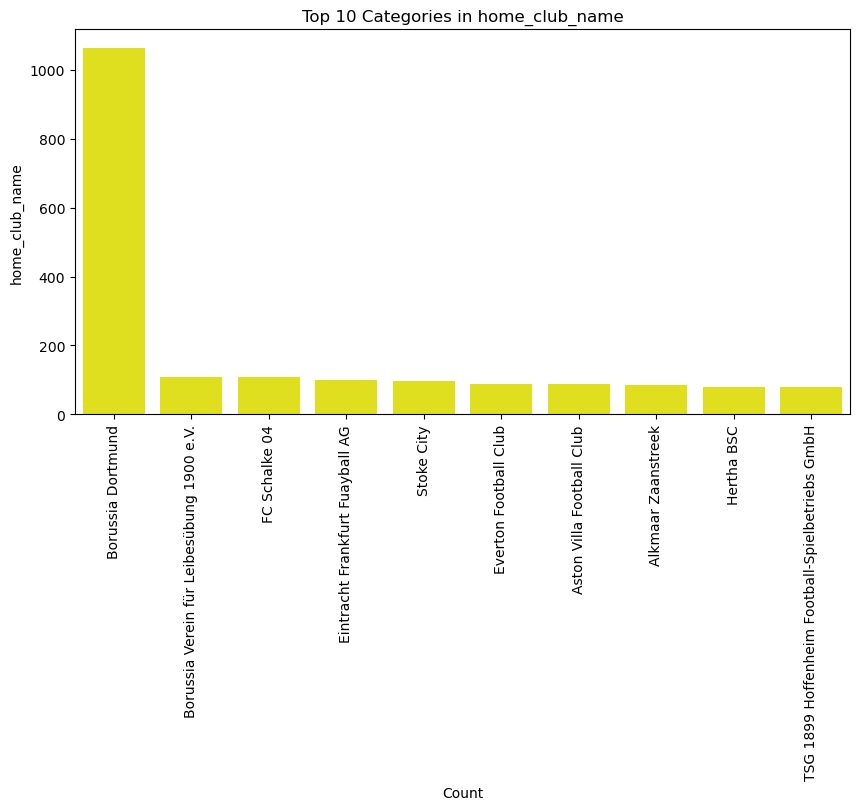

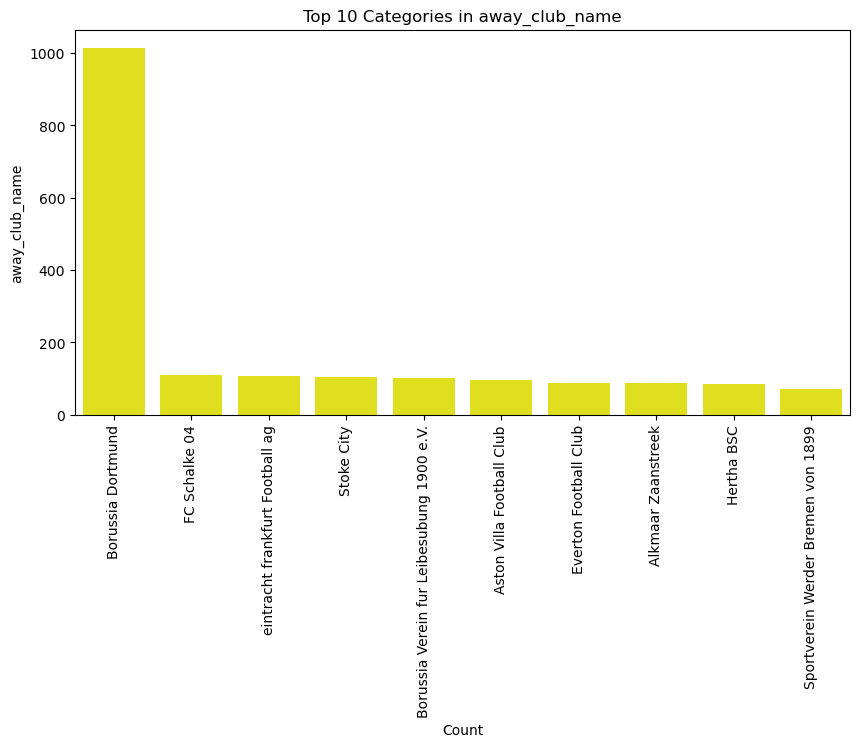

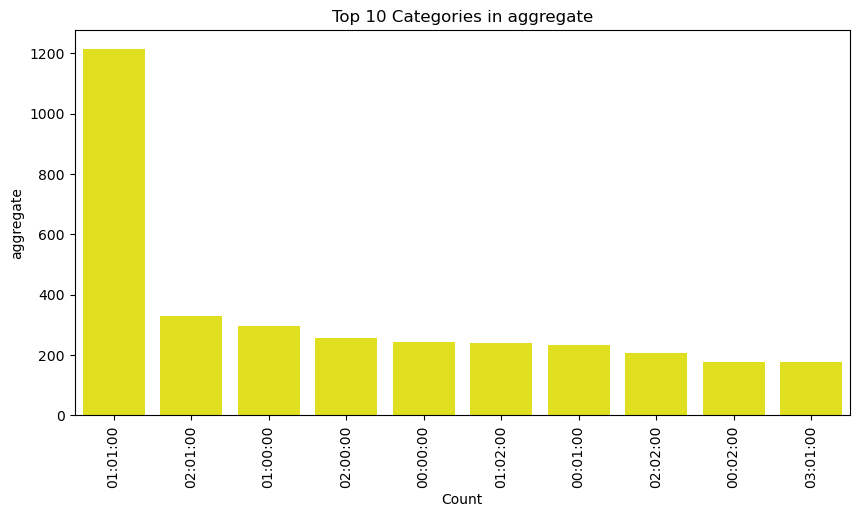

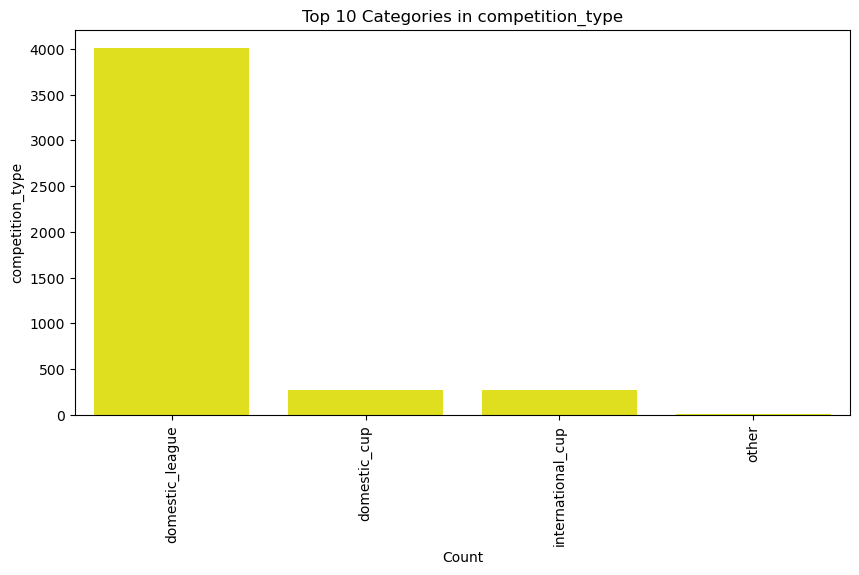

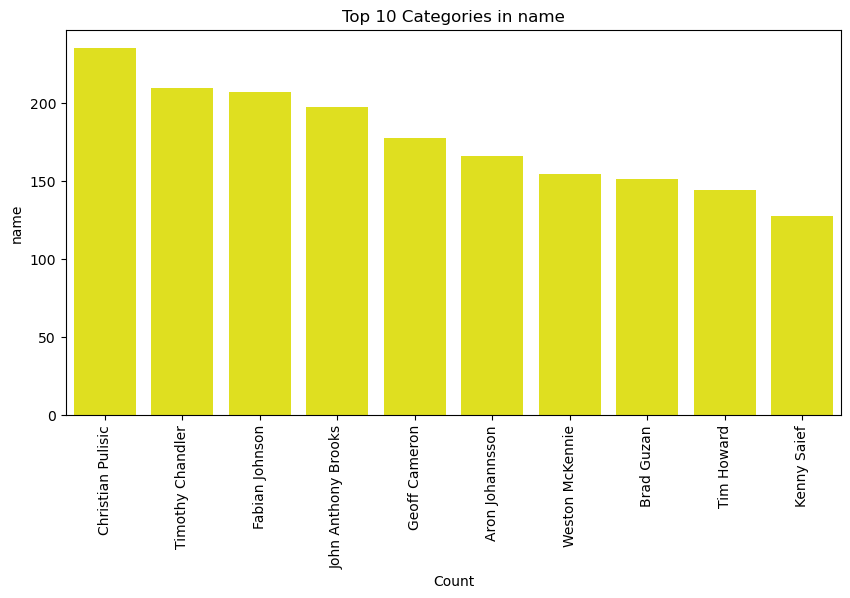

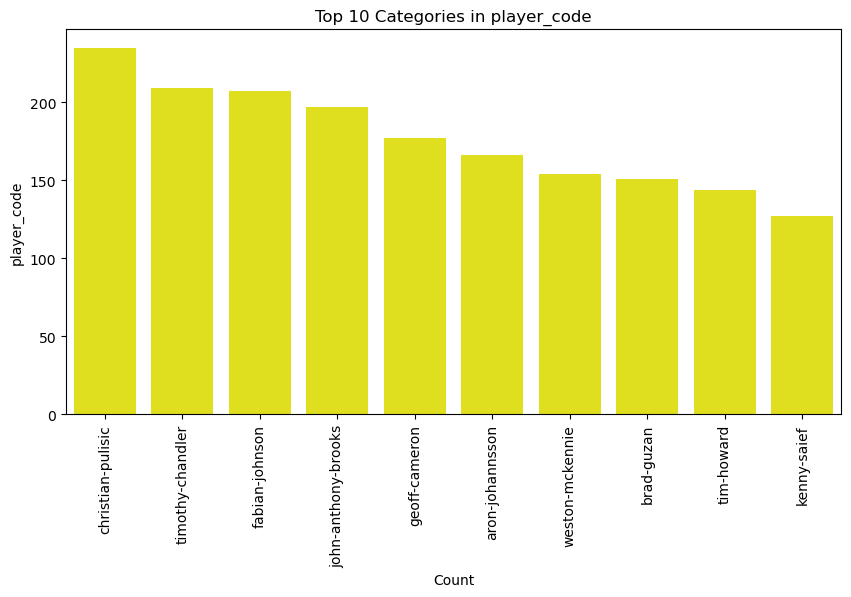

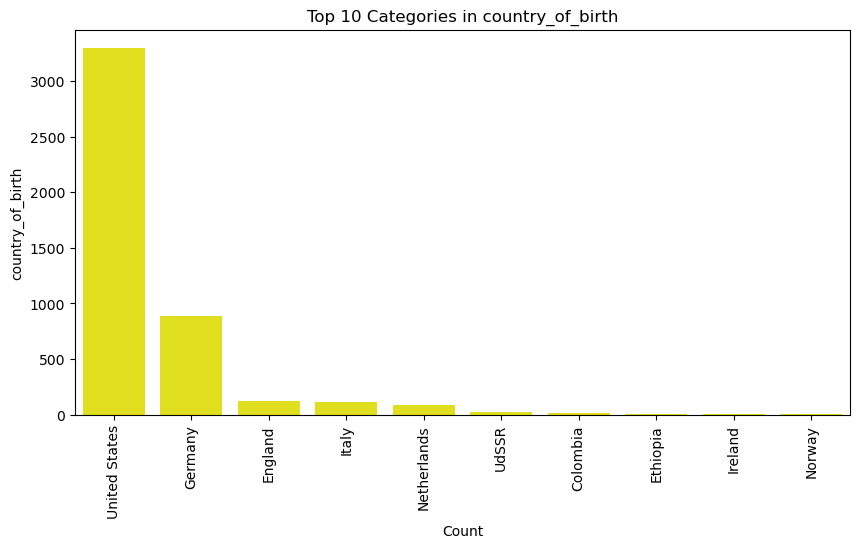

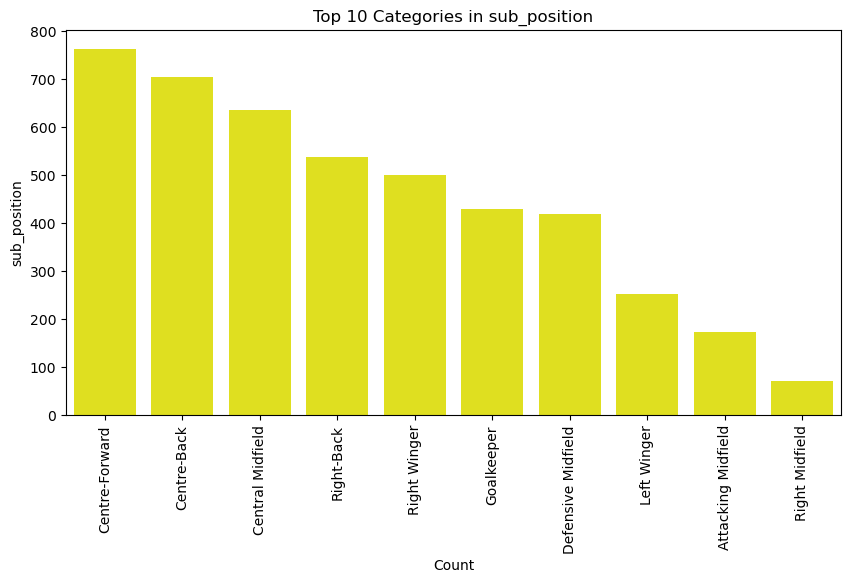

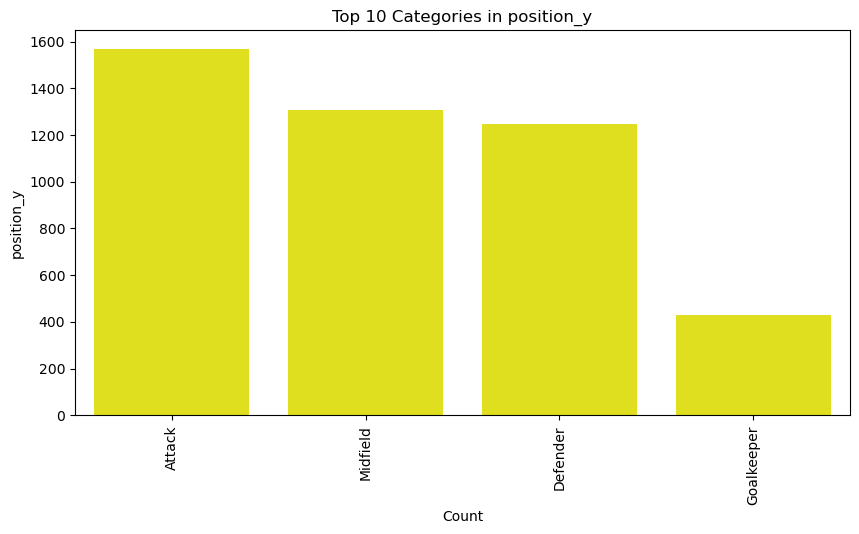

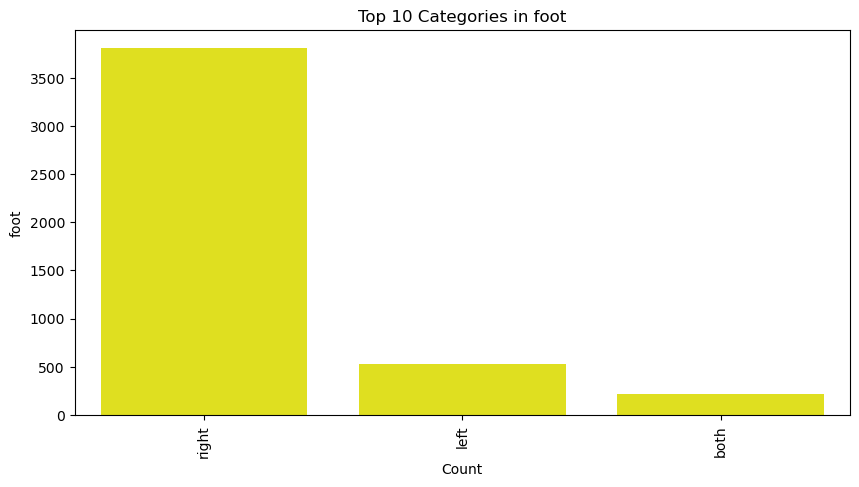

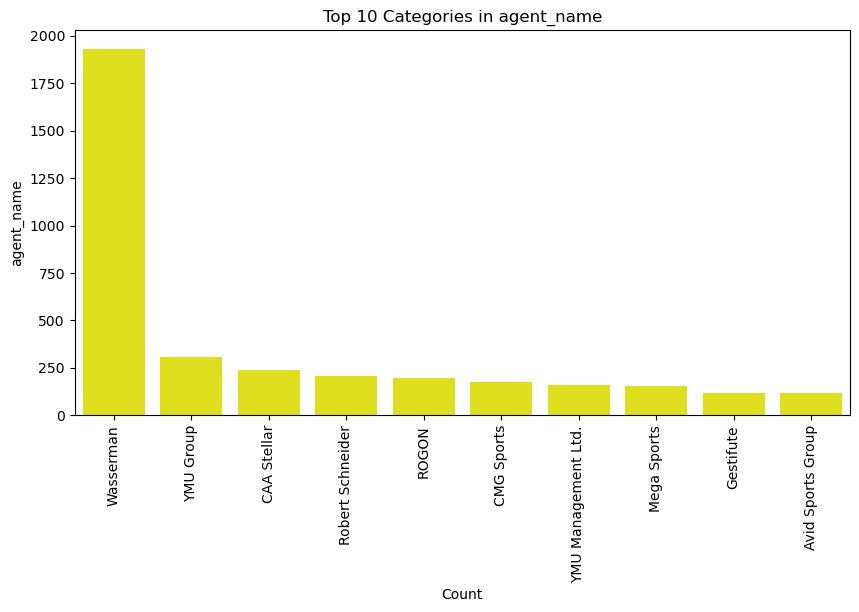

In [98]:
for col in new_df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x=new_df[col].value_counts().index[:10],y=new_df[col].value_counts().values[:10],color='yellow')
    plt.xticks(rotation=90)
    plt.title(f'Top 10 Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

Columns:player_name_x


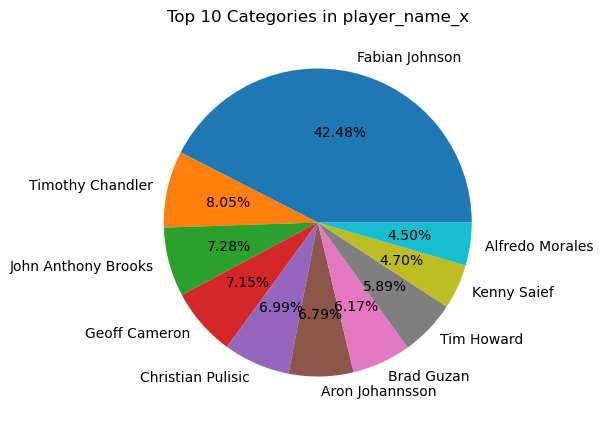

Columns:competition_id_x


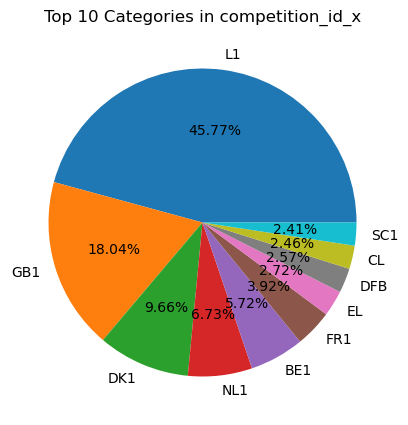

Columns:game_event_id


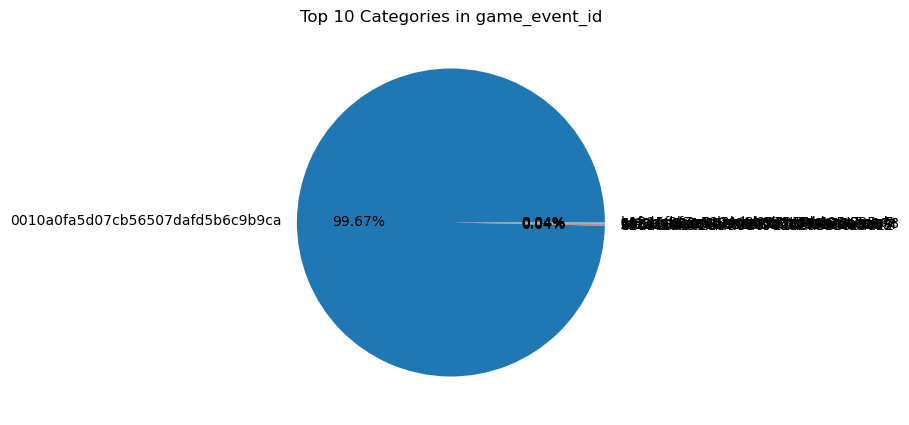

Columns:type_x


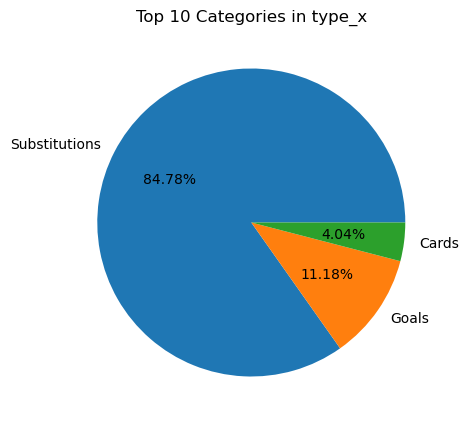

Columns:description


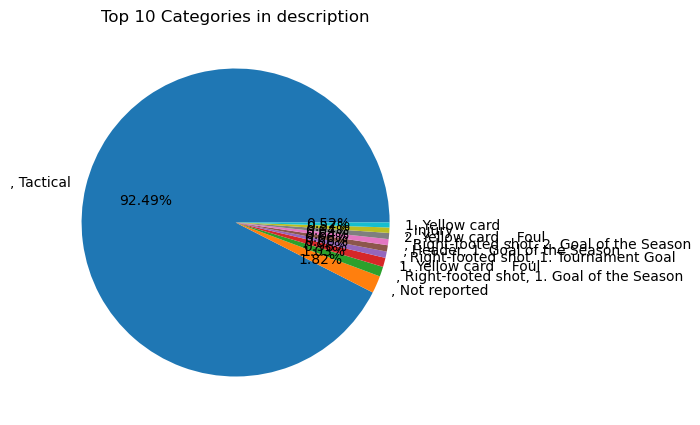

Columns:type_y


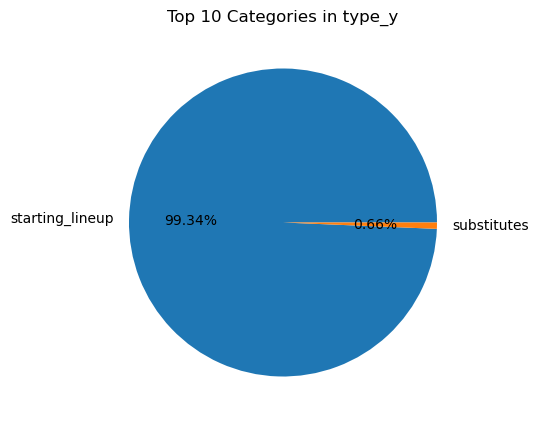

Columns:player_name_y


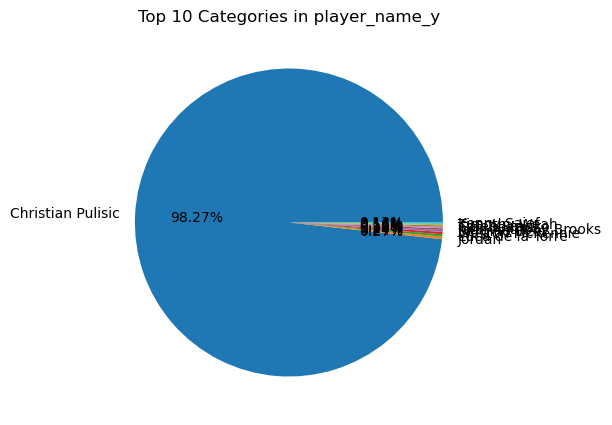

Columns:position_x


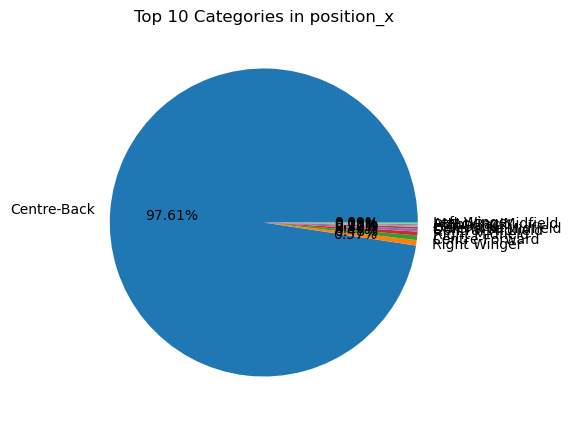

Columns:competition_id_y


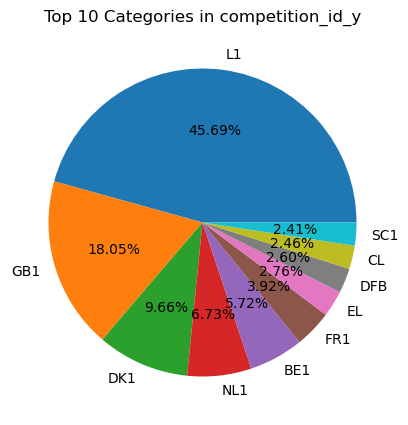

Columns:round


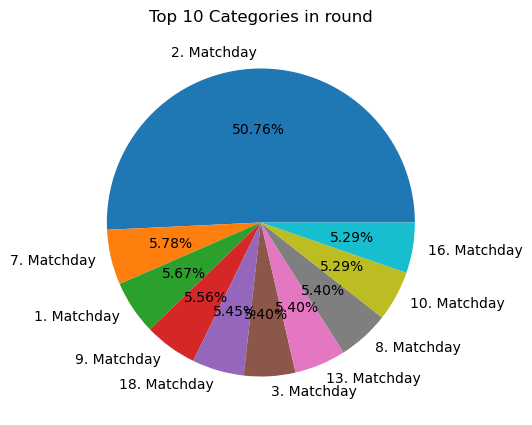

Columns:home_club_manager_name


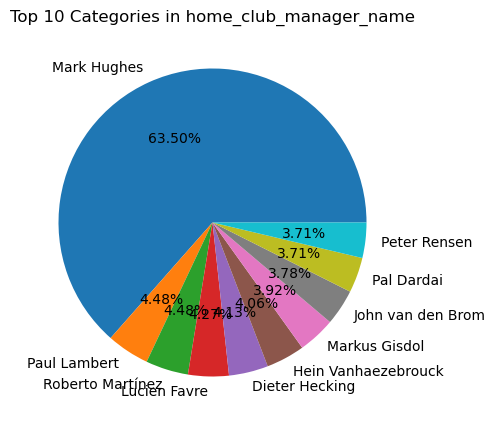

Columns:away_club_manager_name


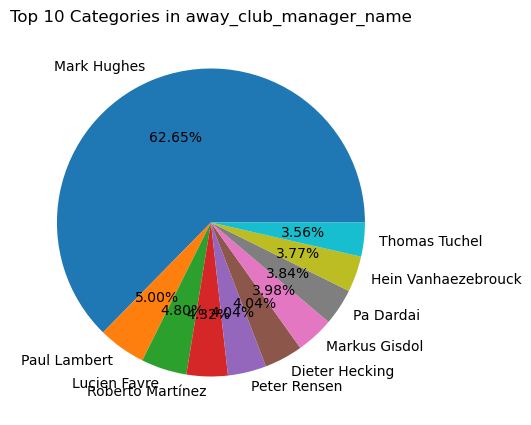

Columns:stadium


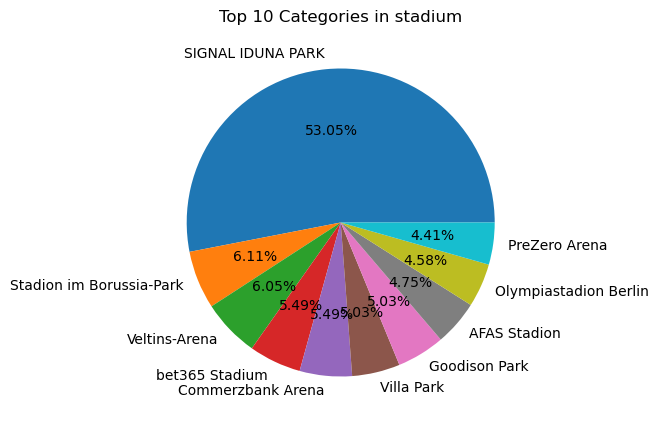

Columns:referee


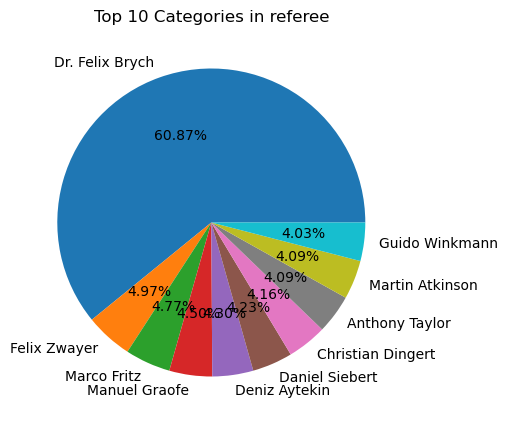

Columns:home_club_name


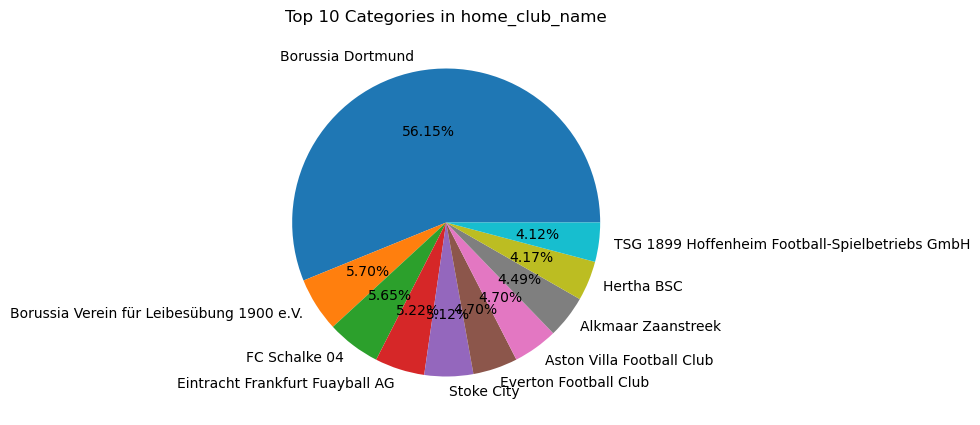

Columns:away_club_name


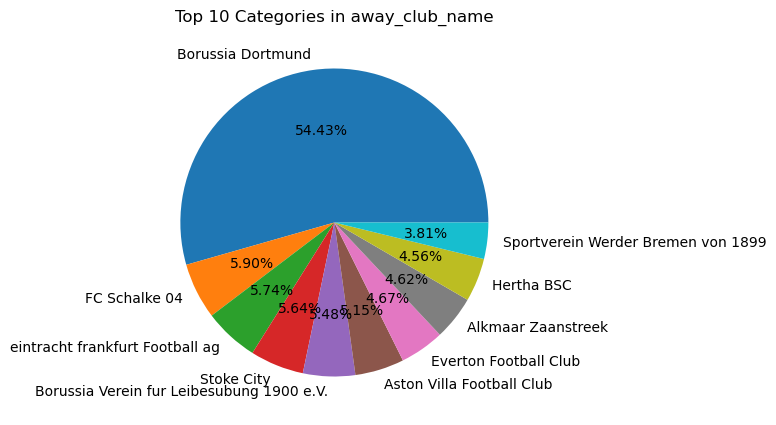

Columns:aggregate


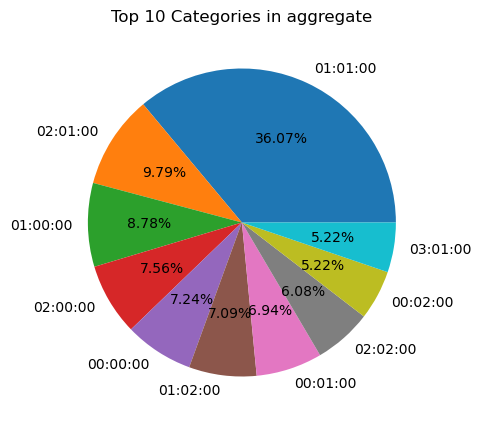

Columns:competition_type


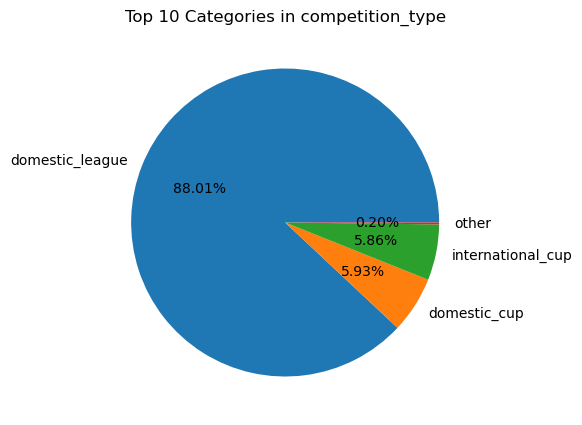

Columns:name


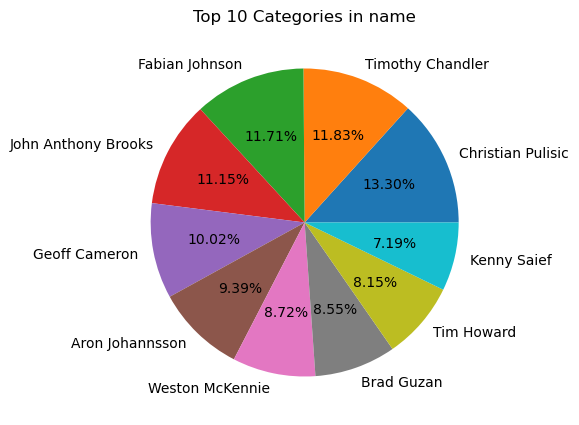

Columns:player_code


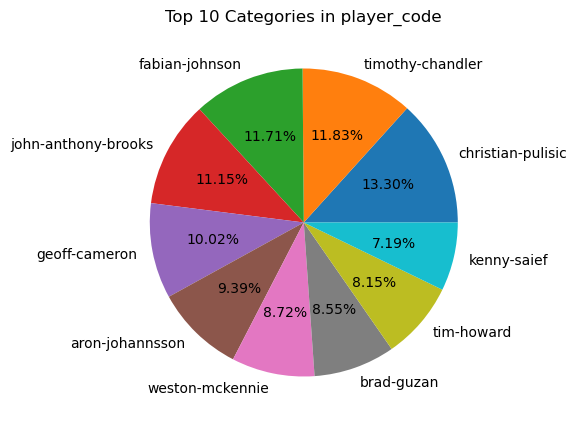

Columns:country_of_birth


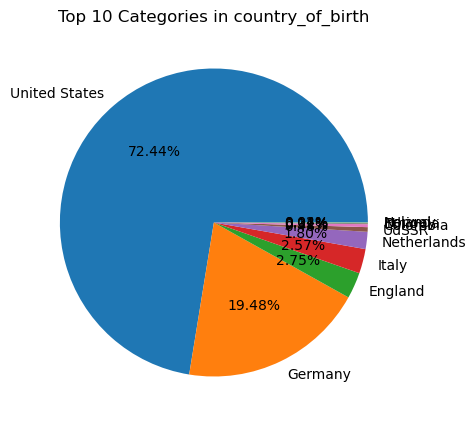

Columns:sub_position


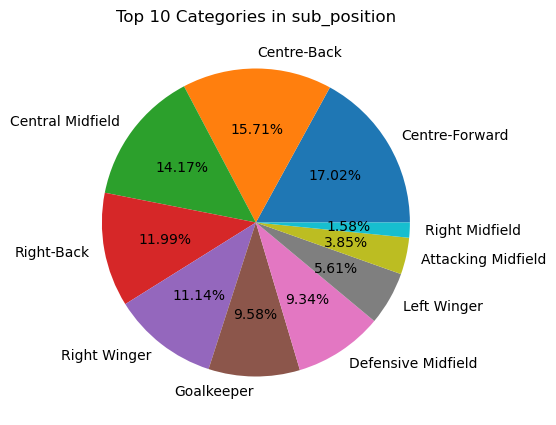

Columns:position_y


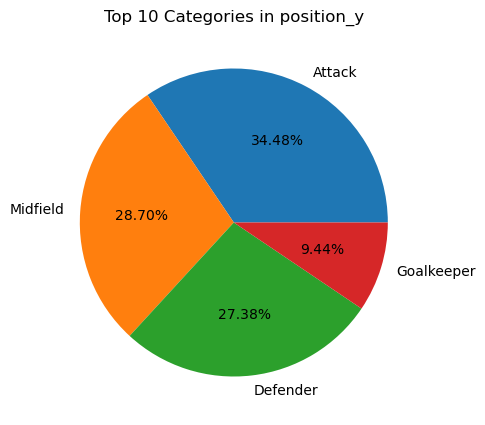

Columns:foot


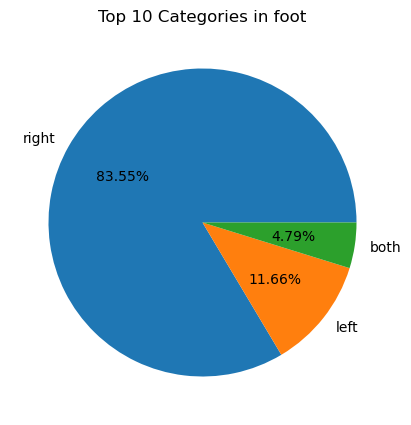

Columns:agent_name


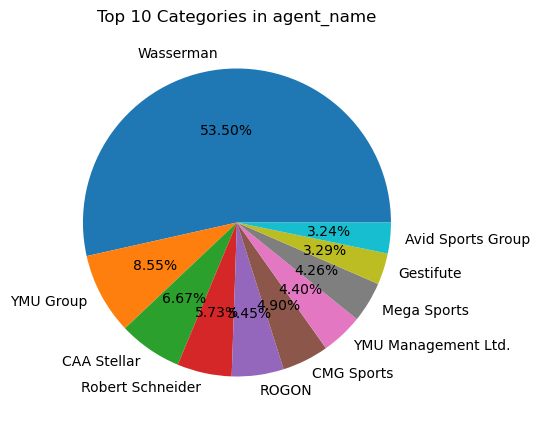

In [80]:
for col in new_df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,5))
    print(f'Columns:{col}')
    plt.title(f"Top 10 Categories in {col}")
    plt.pie(labels=new_df[col].value_counts().index[:10],x=new_df[col].value_counts().values[:10],autopct='%.2f%%')
    plt.show()

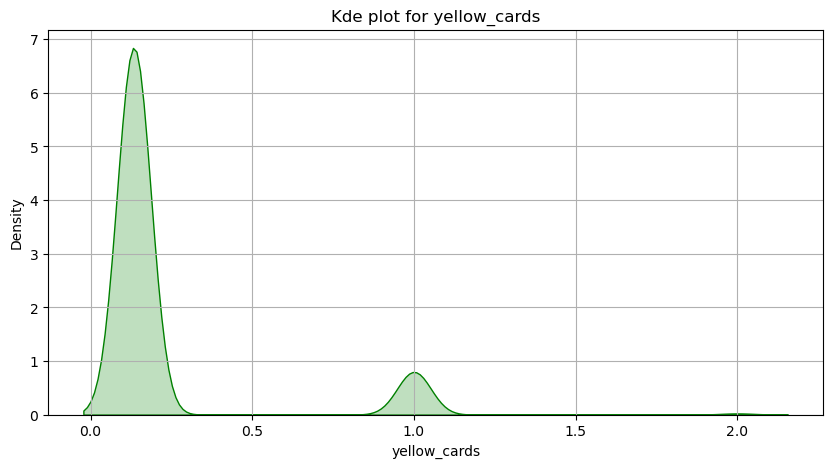

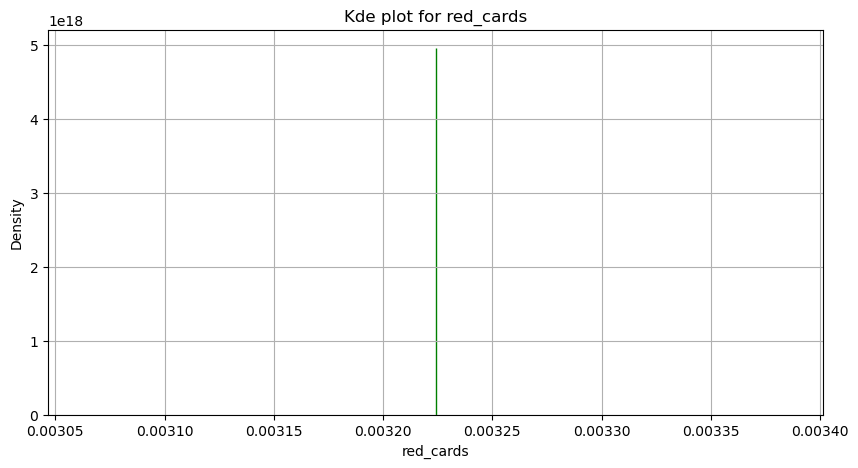

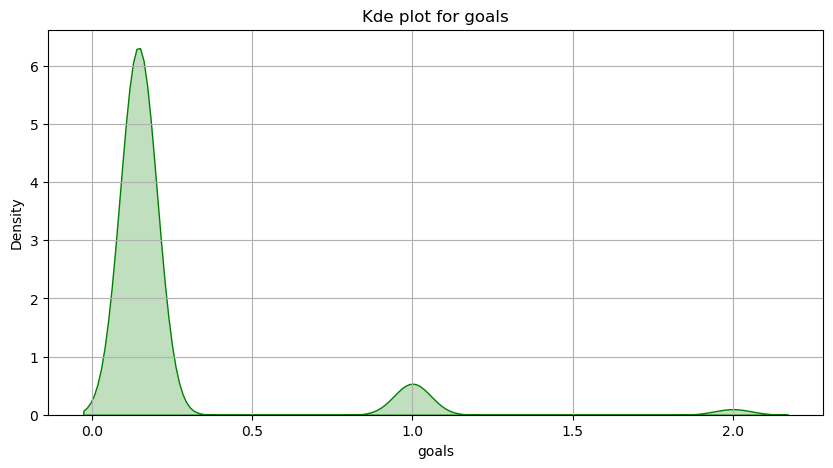

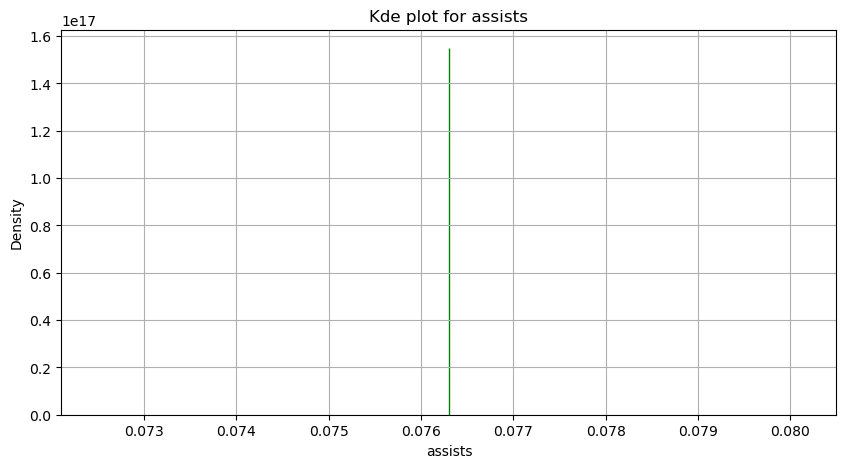

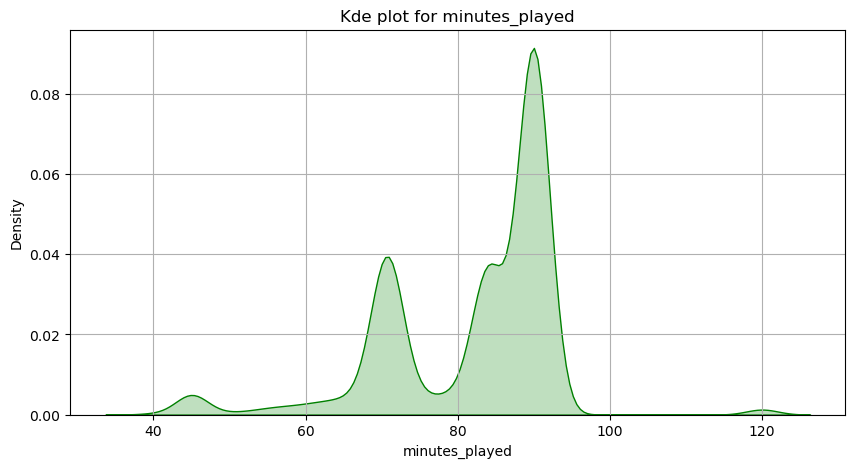

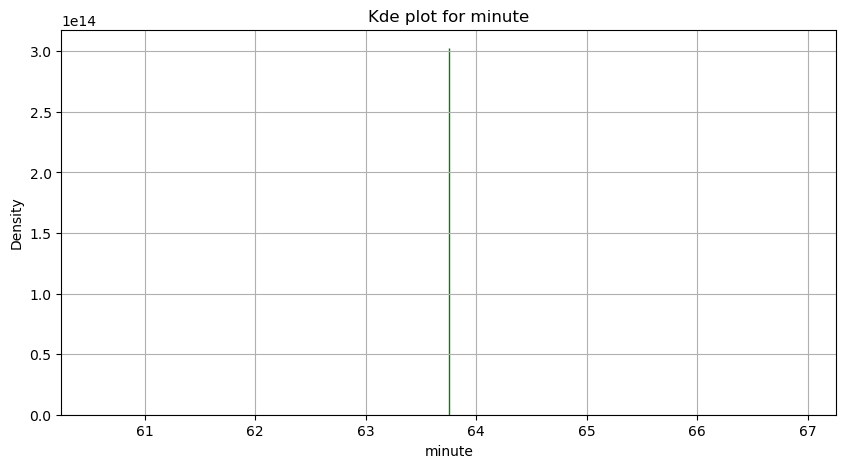

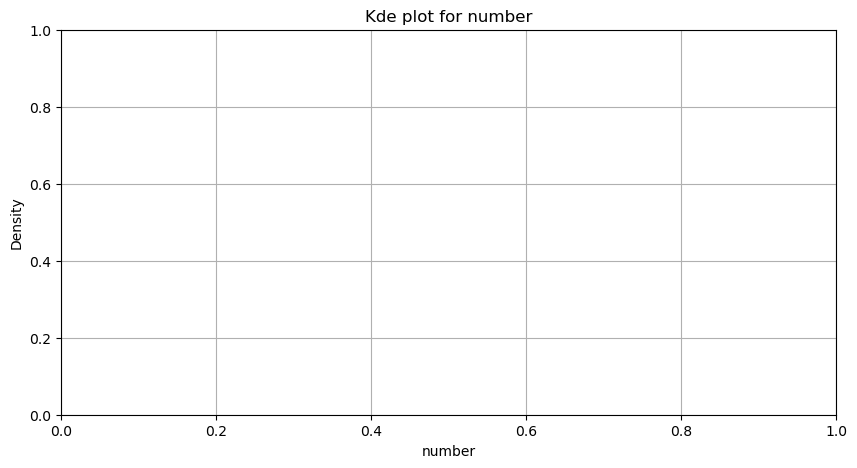

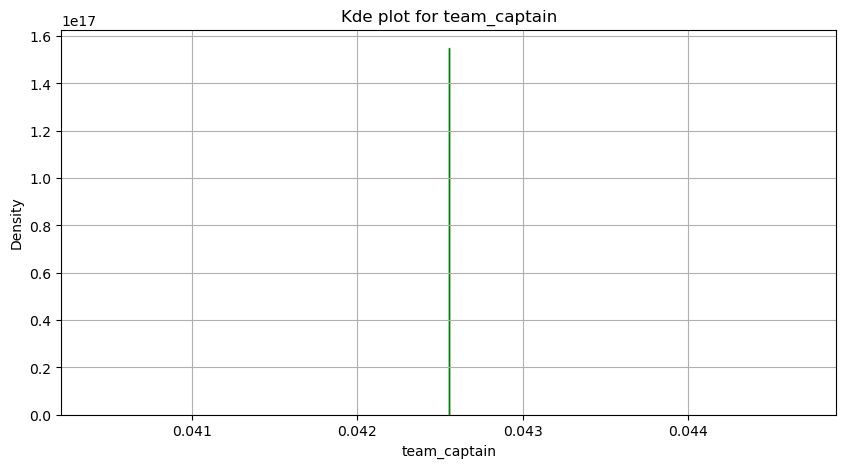

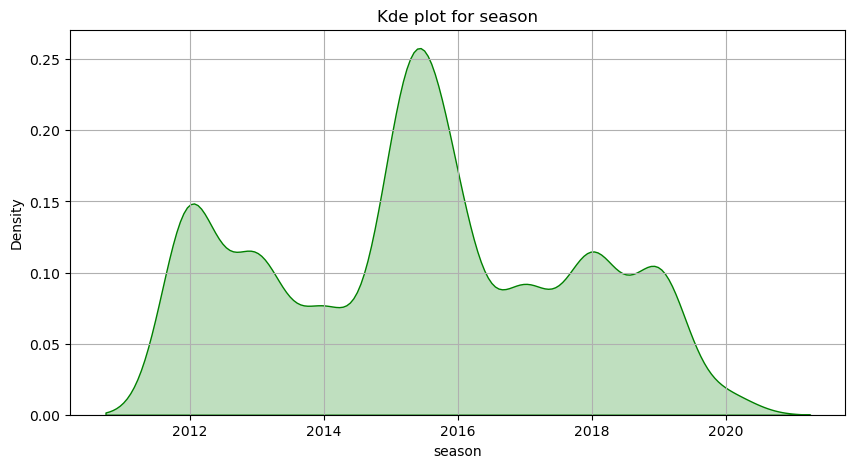

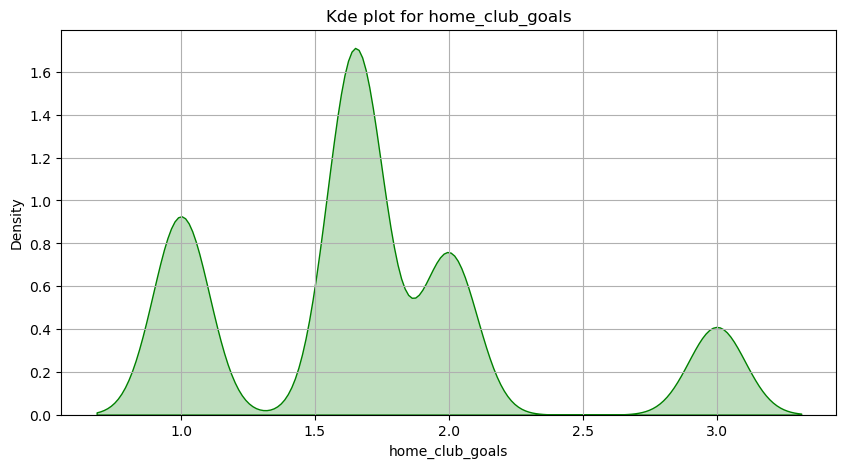

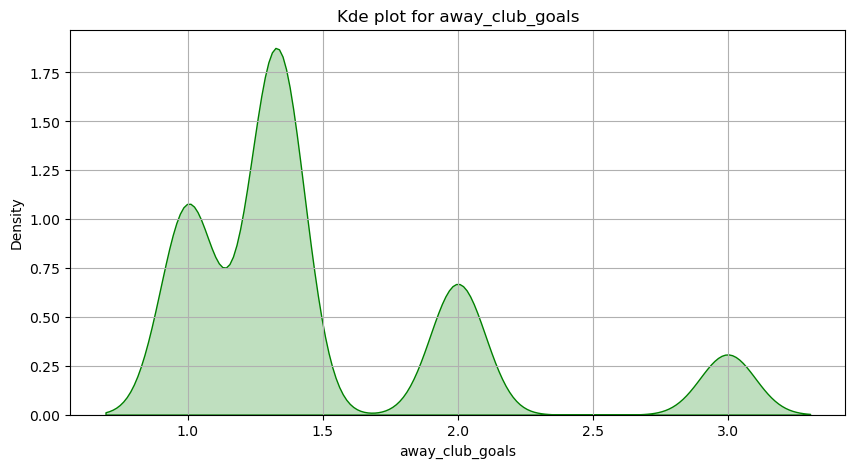

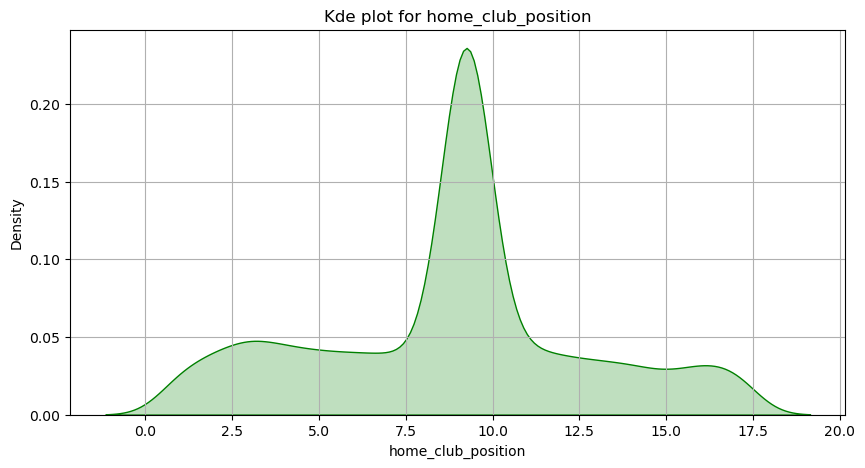

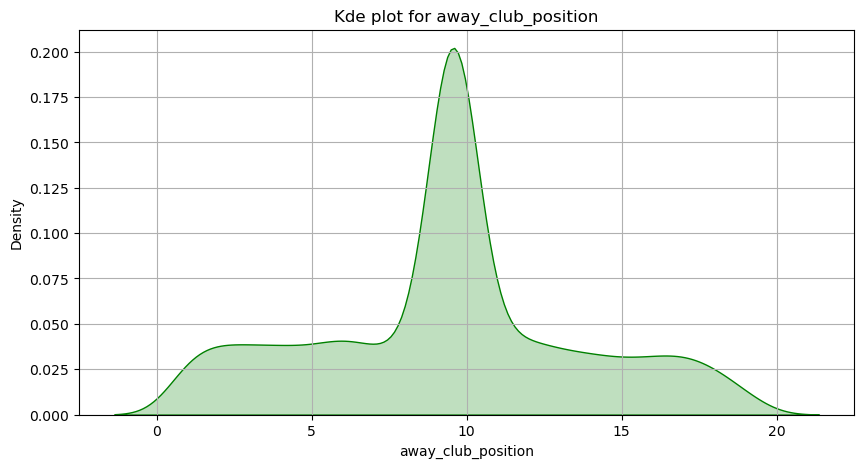

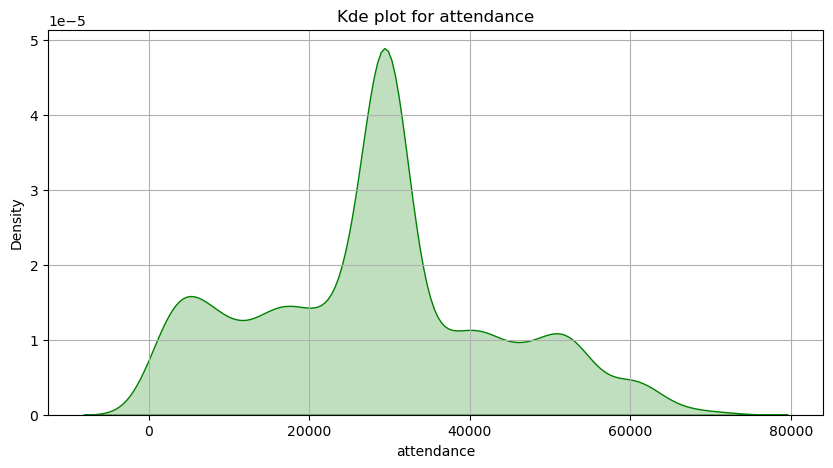

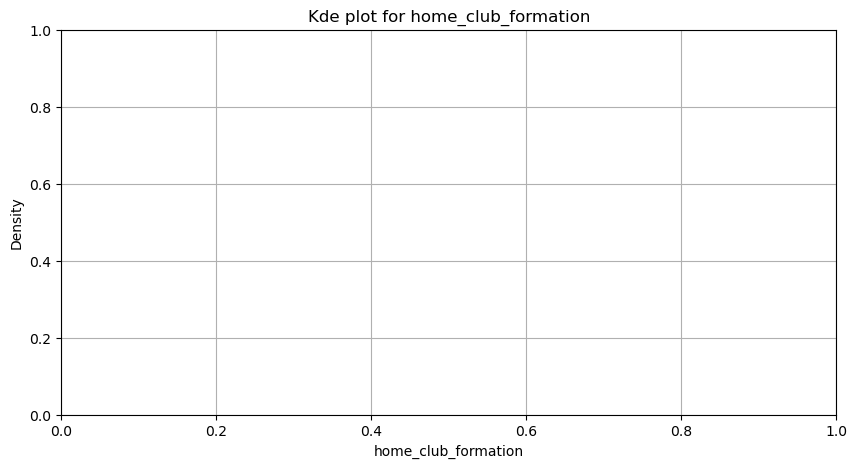

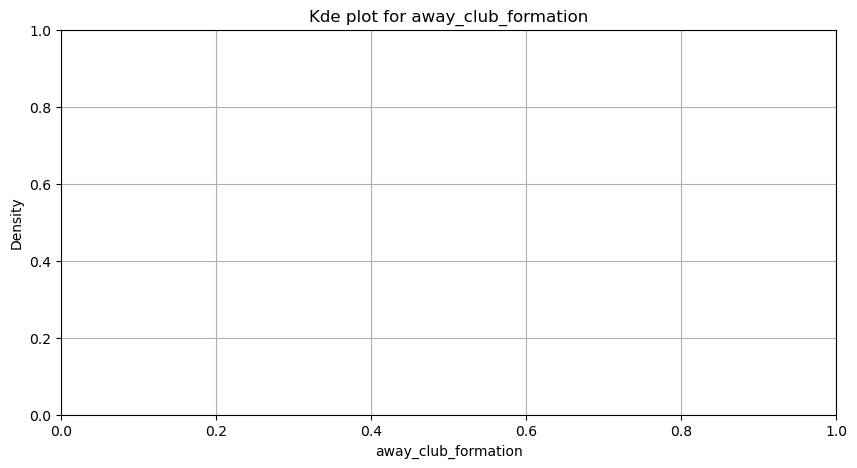

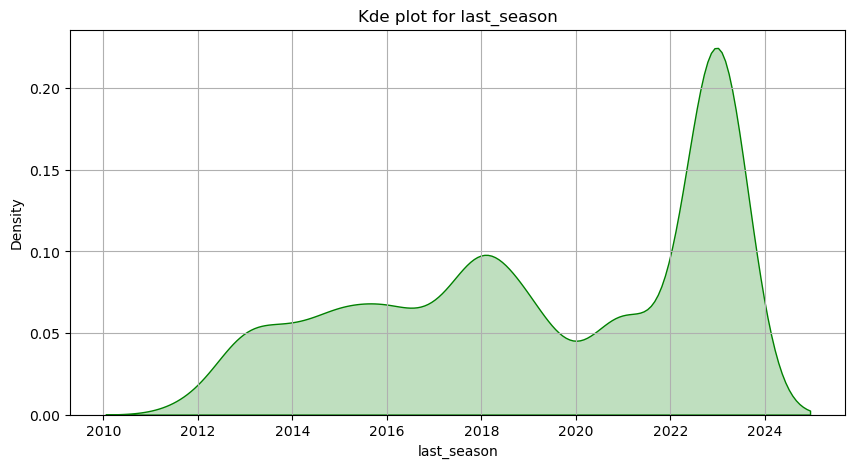

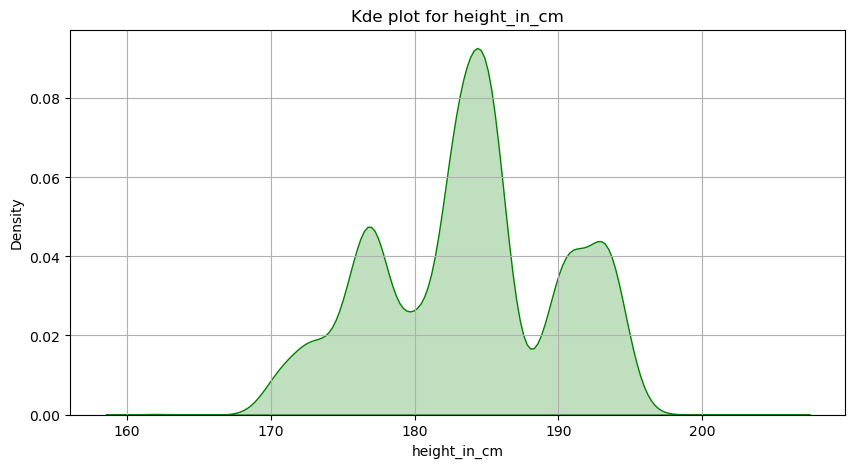

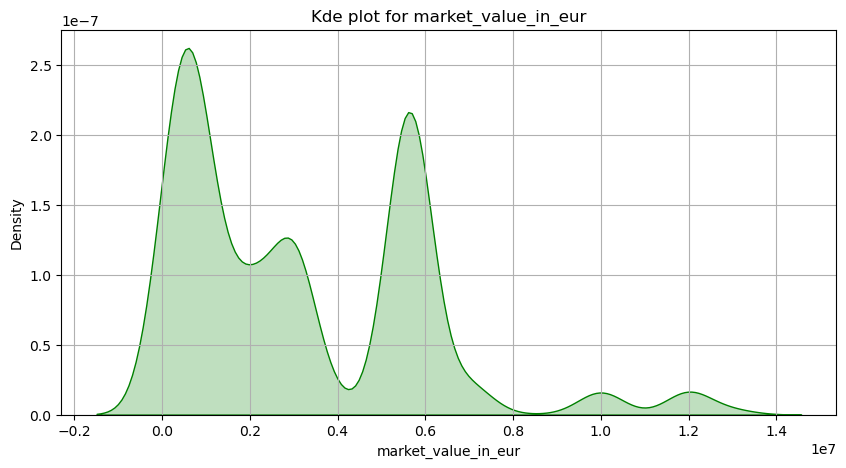

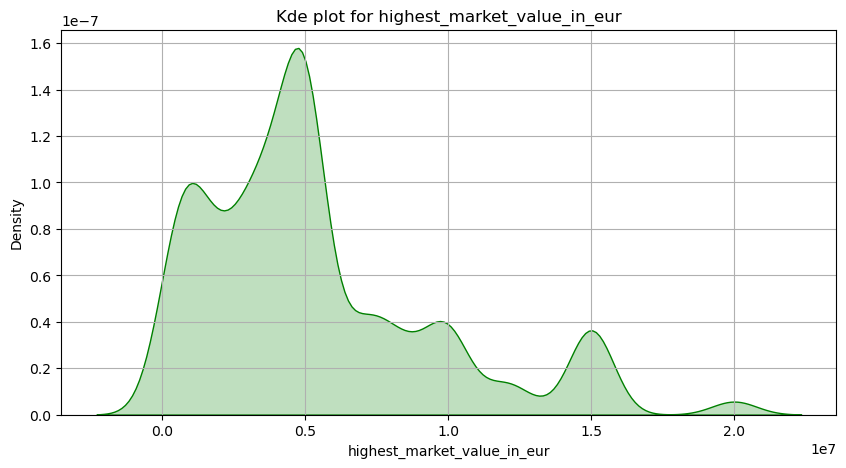

In [95]:
for col in new_df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(new_df[col],fill=True,color='green')
    plt.title(f'Kde plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid()
    plt.show()

# Correlationship:

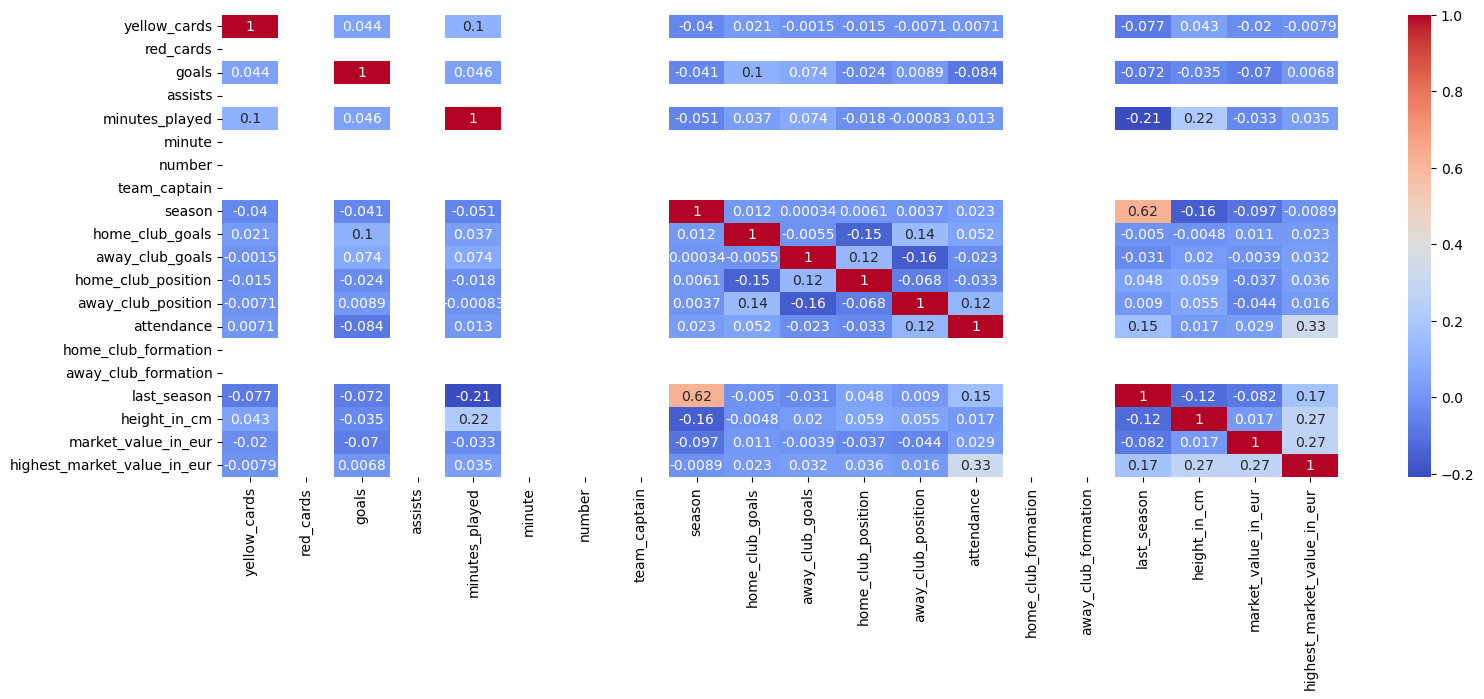

In [54]:
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(18,6))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.show()

# Interpretation:

In [ ]:
# In this project I merged various dataset using "merge" function in pandas with the common columns of "game_id and player_id".
# Under this task I has understood the dataset using various functions like info,describe,value_counts,nunique,shape,size,ndim,head,tail.
# In null value treatment I has replaced with mean for numerical columns and mode for categorical columns.
# In outlier treatment I has used median to replace the outlier(extremely high value of extremely low value).
# In duplicate identification I has removed unique columns and then dropped the duplicate by making the first record as a fresh record and remaining record as a duplicate records.
# In Data Visualization part I has used heatmap for better understanding and for clarification.
# In these particular columns 'home_club_formation','away_club_formation' I just dropped null values.Because all the 4654 rows are null.

# Saving the cleaned file:

In [58]:
new_df.to_csv('Football_data_merged_cleaned.csv')

In [60]:
pwd

'C:\\Users\\Baskar'

In [65]:
new_df.shape

(4554, 50)

# Data Dictionary for cleaned data:

In [ ]:
Column Name        	Data Type	         Description
Unnamed: 0	         int64	             Index column, not directly relevant to analysis.
date_x	             object	             Date of the match (source 1).
player_name_x	     object	             Name of the player (event source 1).
competition_id_x	 object          	 Unique competition ID for dataset source 1.
yellow_cards	     float64	         Number of yellow cards received in the game.
red_cards	         float64	         Number of red cards received in the game.
goals	             float64	         Total goals scored by the player in the match.
assists	             float64	         Total assists provided by the player in the match.
minutes_played	     float64	         Total minutes played by the player in the game.
game_event_id	     object	             Unique ID associated with specific game events.
date_y	             object	             Date of the event (source 2).
minute	             float64	         Minute of the game when the event occurred.
type_x	             object	             Type of game event (e.g., goal, foul, substitution).
description	         object	             Description of the event or game activity.
type_y	             object	             Category/type of additional event details.
number	             float64	         Numerical information related to the event.
player_name_y	     object	             Player name from dataset source 2.
team_captain	     float64	         Indicator if the player was a team captain (0/1).
position_x	         object	             Primary playing position of the player (source 1).
competition_id_y	 object	             Competition ID from dataset source 2.
season	             float64	         Season during which the match occurred.
round	             object	             Game round (e.g., quarterfinal, final).
date	             object	             Match date for events analysis.
home_club_goals	     float64	         Goals scored by the home club in the match.
away_club_goals	     float64	         Goals scored by the away club in the match.
home_club_position	 float64	         Rank/position of the home team.
away_club_position	 float64	         Rank/position of the away team.
home_club_manager_name	object	         Name of the home team manager.
away_club_manager_name	object	         Name of the away team manager.
stadium	                object	         Name of the stadium where the match was held.
attendance	            float64	         Attendance count for the game.
referee	                object	         Name of the referee officiating the game.
home_club_formation	    float64	         Home team's formation, often unavailable (all NaN).
away_club_formation	    float64	         Away team's formation, often unavailable (all NaN).
home_club_name	        object	         Name of the home team.
away_club_name	        object	         Name of the away team.
aggregate	            object	         Aggregated match information (e.g., scoreline).
competition_type	    object	         Competition type (e.g., league, cup).
name	                object	         Player's full name.
last_season	            int64	         Player's data from the last season.
player_code	            object	         Unique player code for identification.
country_of_birth	    object	         Player's country of birth.
date_of_birth	        object	         Player's date of birth.
sub_position	        object	         Player's specific position in the match.
position_y	            object	         Player's general position category.
foot	                object	         Preferred foot (e.g., left, right).
height_in_cm	        float64	         Player's height in centimeters.
market_value_in_eur	    float64	         Market value of the player in EUR.
highest_market_valu     float64	         Highest recorded market value in EUR.
_in_eur	
contract_expiration     object	         Contract expiration date for the player.
_date	
agent_name	            object	         Agent/representative of the player.

# Sprint=2

# Business Objective =1
# Performance Analysis:

# a) Evaluate and analyze player performance based on various metrics such as goals,assists, yellow card,red card and minutes played.

In [28]:
# Statistical summary for metrics 'goals','assists','yellow_cards','red_cards','minutes_played':
metric=new_df[['goals','assists','yellow_cards','red_cards','minutes_played']]
metric.describe().T

# Displayed descriptive statistics for all those metrics using describe function.

count       mean           std        min        25%  \
goals           4554.0   0.236694  3.088685e-01   0.145352   0.145352   
assists         4554.0   0.076303  1.276897e-15   0.076303   0.076303   
yellow_cards    4554.0   0.229334  2.806464e-01   0.134068   0.134068   
red_cards       4554.0   0.003224  2.554661e-16   0.003224   0.003224   
minutes_played  4554.0  81.908482  1.133443e+01  40.000000  70.705803   

                      50%        75%         max  
goals            0.145352   0.145352    2.000000  
assists          0.076303   0.076303    0.076303  
yellow_cards     0.134068   0.134068    2.000000  
red_cards        0.003224   0.003224    0.003224  
minutes_played  84.000000  90.000000  120.000000

In [ ]:
player_perf=new_df.groupby('player_name_x')[['goals','assists','yellow_cards','red_cards','minutes_played']].agg(['mean','sum','max'])
print(player_perf)
sort=player_perf.sort_values(by=('assists','mean'),ascending=False)[:10]
print(sort)

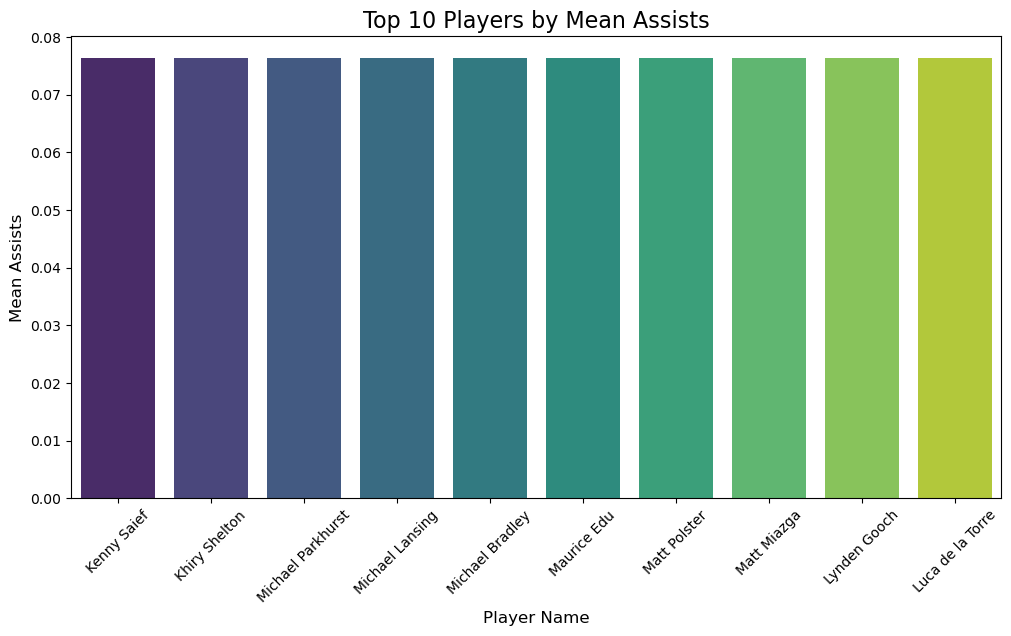

In [30]:
# Plot:
plt.figure(figsize=(12, 6))
sns.barplot(x=sort.index, y=sort[('assists', 'mean')], palette='viridis')
plt.title('Top 10 Players by Mean Assists', fontsize=16)
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Mean Assists', fontsize=12)
plt.xticks(rotation=45)
plt.show()

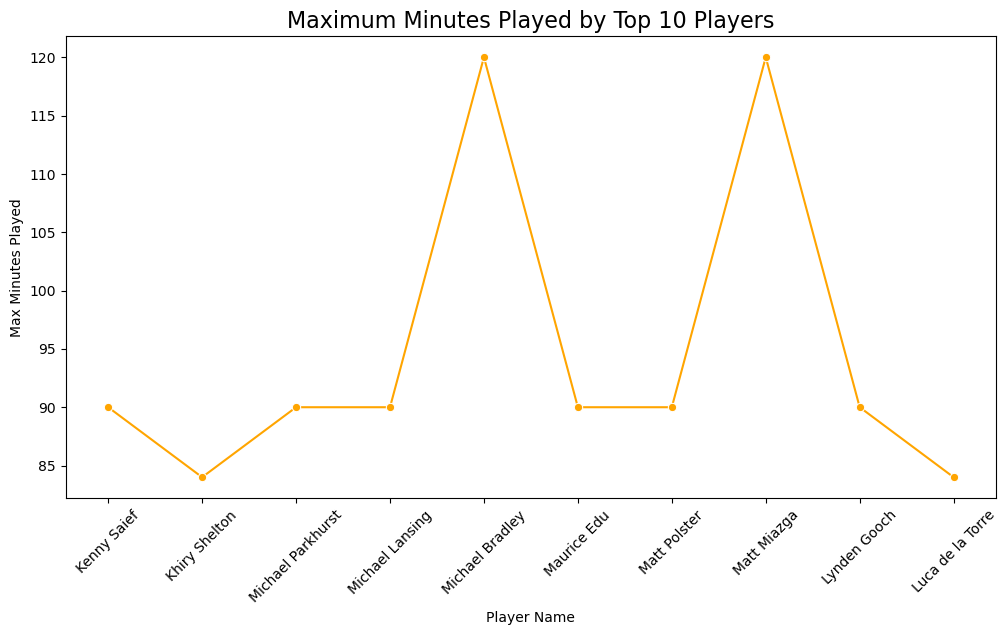

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=sort.index, y=sort[('minutes_played', 'max')], marker='o', color='orange')
plt.title('Maximum Minutes Played by Top 10 Players', fontsize=16)
plt.xlabel('Player Name')
plt.ylabel('Max Minutes Played')
plt.xticks(rotation=45)
plt.show()

# Interpretation:
#The plot shows the top 10 players based on maximum minutes played, with notable spikes 
#for Michael Bradley and Matt Miazga exceeding 110 minutes. Other players like Kenny Saief
#and Lynden Gooch remain consistent around 85-90 minutes.

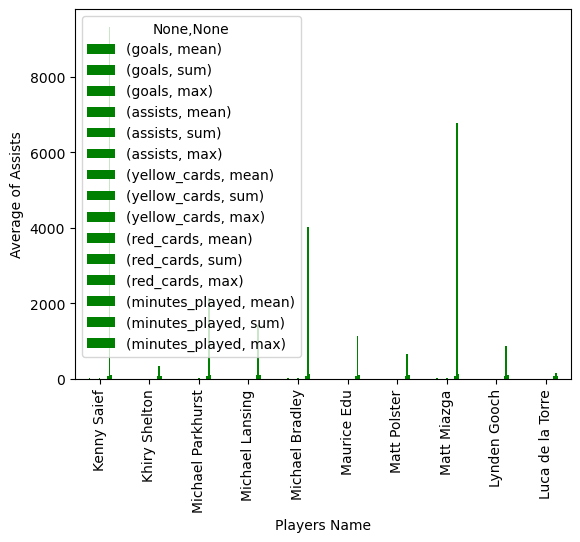

In [149]:
sort.plot(kind='bar',xlabel='Players Name',ylabel='Average of Assists',stacked=False,color='g')
plt.show()

# b) Assess team performance in terms of home and away goals,club positions,and manager influence:

In [43]:
team_performance=new_df.groupby(['home_club_name','home_club_manager_name'])[['home_club_goals', 'away_club_goals','home_club_position', 'away_club_position']].agg({'home_club_goals':'sum', 'away_club_goals':'sum','home_club_position':'mean','away_club_position':'mean'}).reset_index()

team_performance['total_goals']=team_performance['home_club_goals']+team_performance['away_club_goals']
team_performance['home_away_goal_ratio']=team_performance['home_club_goals'] / team_performance['away_club_goals']

print(team_performance)

                     home_club_name home_club_manager_name  home_club_goals  \
0     Lille Olympique Sporting Club     Christophe Galtier         7.651100   
1     Lille Olympique Sporting Club     Frédéric Antonetti         2.000000   
2     Lille Olympique Sporting Club           Herve Renard         1.651100   
3     Lille Olympique Sporting Club            Rene Girard         3.651100   
4             1. FC Heidenheim 1846          Frank Schmidt         2.000000   
..                              ...                    ...              ...   
770        verein fur leibesubungen         Martin Schmidt        12.000000   
771        verein fur leibesubungen         Oliver Glasner        31.557703   
772        verein fur leibesubungen        Valerien Ismael         3.000000   
773         İstanbul Başakşehir F.K          Abdullah Avci         2.000000   
774         İstanbul Başakşehir F.K         Bülent Korkmaz         1.651100   

     away_club_goals  home_club_position  away_club

In [45]:
manager_influence=team_performance.groupby('home_club_manager_name')[['total_goals','home_away_goal_ratio']].sum()
print(manager_influence)

                        total_goals  home_away_goal_ratio
home_club_manager_name                                   
Abdullah Avci              3.328771              1.505150
Achim Beierlorzer          9.959742              1.723070
Adi Hutter                99.516640              1.506194
Adnan Custovic            18.657542              1.862353
Adolfo Sormani             4.000000              3.000000
...                             ...                   ...
juan ignacio martinez      4.000000              1.000000
nuno espirito santo       13.959742              2.937192
sami hyypia                9.328771              1.155062
sta le solbakken          20.953301              1.328145
Élie Baup                  5.302201              1.651100

[580 rows x 2 columns]


<Axes: xlabel='home_club_position', ylabel='away_club_position'>

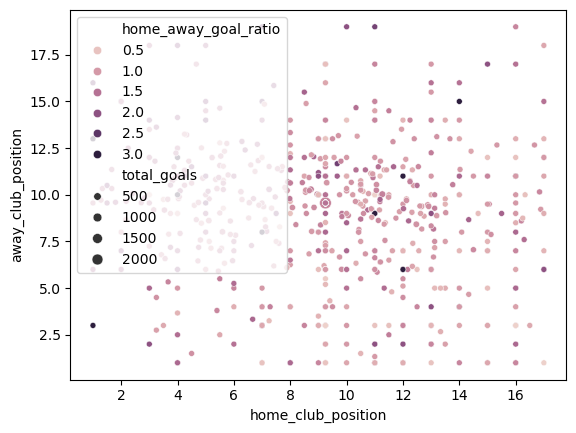

In [47]:
sns.scatterplot(data=team_performance,x='home_club_position',y='away_club_position',size='total_goals',hue='home_away_goal_ratio')

# Interpretation:

In [ ]:
# It shows positive relationship between home_club_position and away_club_position.So the total goal score is increasing.
# The data reveals that "Adi Hutter" leads with the highest total goals scored (99.52) among managers, indicating consistent offensive success. 
# Additionally, managers like Adolfo Sormani exhibit high home-away goal ratios (3.0), suggesting their teams dominate in home matches.

#The graph indicates a positive correlation between home_club_position and 
#away_club_position, with total goals increasing as the positions rise. 
#Managers like Adi Hutter excel with the highest total goals, and higher home_away_goal_ratios reflect dominance in home matches.

# Sprint=3

# Performance Analysis:

# Business question-1
# Goal Contributions of Players:
# Which players contribute the most to their teams in terms of goals and assists?
# Visualize using a line chart showcasing total goals and assists per player.

In [100]:
team_performance=new_df.groupby(['home_club_name','home_club_manager_name'])[['home_club_goals', 'away_club_goals','home_club_position', 'away_club_position']].agg({'home_club_goals':'sum', 'away_club_goals':'sum','home_club_position':'mean','away_club_position':'mean'}).reset_index()

team_performance['total_goals']=team_performance['home_club_goals']+team_performance['away_club_goals']


contribution=new_df.groupby('player_name_x')[['goals', 'assists']].agg(['mean','count','sum','max','min','var','std']).sort_values(by=('goals','mean'),ascending=False)[::5].reset_index()
print(contribution)

         player_name_x      mean  count         sum       max       min  \
0      Aron Johannsson  0.625352    166  103.808436  2.000000  0.145352   
1        Jozy Altidore  0.514731    105   54.046749  2.000000  0.145352   
2        Joseph Efford  0.511630      7    3.581408  1.000000  0.145352   
3   Andrija Novakovich  0.501637     32   16.052391  2.000000  0.145352   
4        Clint Dempsey  0.491174     54   26.523375  2.000000  0.145352   
..                 ...       ...    ...         ...       ...       ...   
87        Keaton Parks  0.145352      5    0.726760  0.145352  0.145352   
88       Khiry Shelton  0.145352      4    0.581408  0.145352  0.145352   
89          Kyle Scott  0.145352      1    0.145352  0.145352  0.145352   
90        Lynden Gooch  0.145352     11    1.598872  0.145352  0.145352   
91        Zack Steffen  0.145352     18    2.616335  0.145352  0.145352   

         var       std  
0   0.394486  0.628082  
1   0.430636  0.656229  
2   0.208692  0.456829  

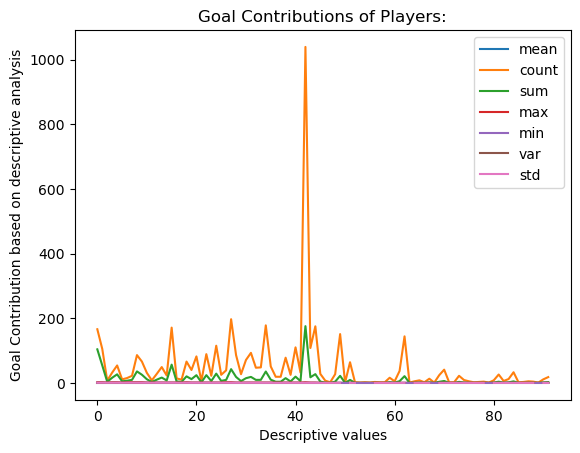

In [53]:
contribution.plot(kind='line')
plt.title('Goal Contributions of Players:')
plt.xlabel('Descriptive values')
plt.ylabel('Goal Contribution based on descriptive analysis')
plt.show()

# Interpretation:

In [ ]:
#The line plot visualizes goal contributions of players based on descriptive statistics such as mean, count, sum, and others. 
#Peaks indicate players with significant contributions in terms of goals and did high performance. 
#Regular fluctuations represent varying contributions across players.

In [ ]:
# Under this task with descriptive statistics and visualization maximum peak values are showed while counting.
#so that there is less variance /distibution.

# Business question-2
# Home vs. Away Performance by Teams:
# How do teams perform differently in home games versus away games regarding goals scored?
# Visualize with a scatter plot showing home and away goals for each team.

Line plot to find the relationship between home club name and their goals


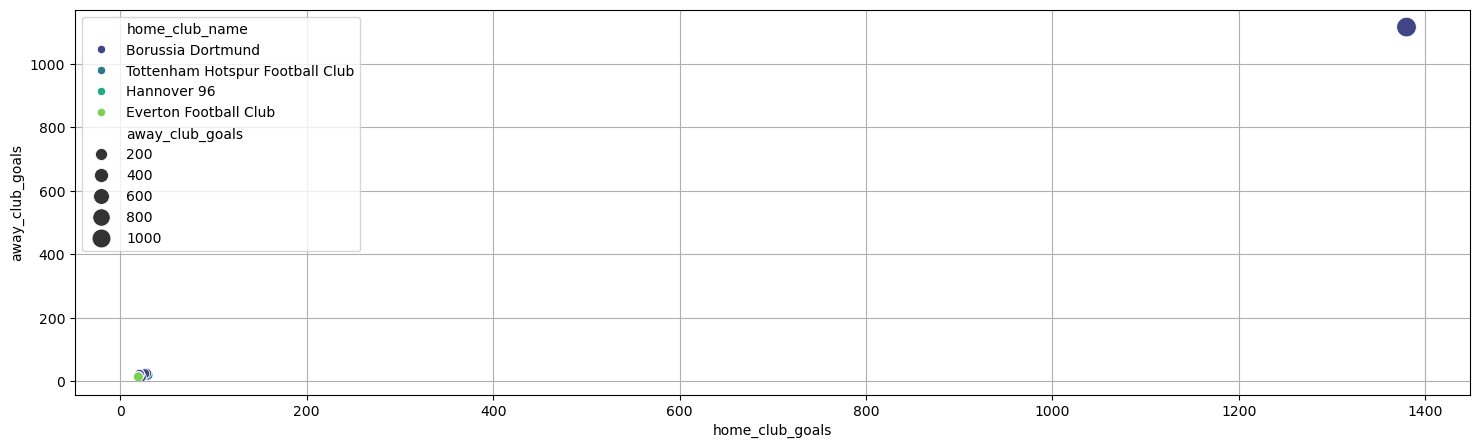

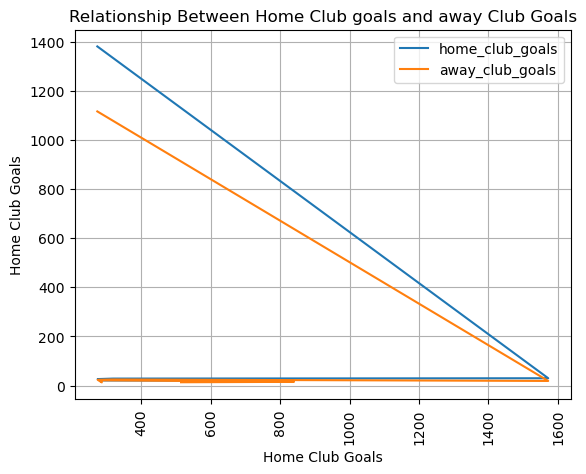

In [135]:
goal=new_df.groupby(['home_club_name','away_club_name'])[['home_club_goals','away_club_goals']].sum().reset_index()
goal=goal.sort_values(by='home_club_goals',ascending=False)[:10]


print('Line plot to find the relationship between home club name and their goals')
plt.figure(figsize=(18,5))
sns.scatterplot(data=goal, x='home_club_goals', y='away_club_goals', hue='home_club_name', size='away_club_goals', palette='viridis', sizes=(50, 200))
plt.grid()
goal.plot(kind='line')
plt.title('Relationship Between Home Club goals and away Club Goals')
plt.xticks(rotation=90)  
plt.xlabel('Home Club Goals')
plt.ylabel('Home Club Goals')
plt.grid()
plt.show()

# Interpretation:

In [ ]:
# Interpretation:
#The scatter plot shows Borussia Dortmund has higher home and away goals.
#The bubble sizes represent away goals, highlighting variations in scoring performance.

#The plot compares home and away club goals relative to club names. It shows a declining trend for both, indicating fewer goals scored as we move across clubs.

In [ ]:
#In Home vs. Away Performance by Teams it shows negative relationship based on home club and away club goals total values.
#It shows no clear positive/negative relationship.Its weak relationship.

In [206]:
print(plt.style.available)
print(plt.style.use('seaborn-v0_8-notebook'))

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
None


# Business question-3
# Performance Analysis:
# Managerial Impact on Team Performance:
# Which managers lead the most successful teams (measured by goal ratio and positional ranking)?
# Use box plots or grouped bar charts to analyze manager performance metrics.

In [148]:
pvt=pd.pivot_table(new_df,index=['home_club_manager_name','away_club_manager_name'],values=['home_club_position', 'away_club_position','home_club_goals', 'away_club_goals'],aggfunc=['mean','sum'])
pvt.sort_values(by=('mean', 'away_club_goals'), ascending=False, inplace=True)
print(pvt)

                                                         mean  \
                                              away_club_goals   
home_club_manager_name away_club_manager_name                   
Slavisa Jokanovic      Eddie Howe                         3.0   
Marco Rose             Julian Nagelsmann                  3.0   
Robbie Neilson         Ronny Deila                        3.0   
Glen Riddersholm       Lars Sondergaard                   3.0   
Troels Bech            Ove Pedersen                       3.0   
...                                                       ...   
Kasper Hjulmand        Ove Christensen                    1.0   
                       Morten Wieghorst                   1.0   
                       Lars Sondergaard                   1.0   
                       Kent Nielsen                       1.0   
Élie Baup              Michel Der Zakarian                1.0   

                                                                  \
                     

In [144]:
ratio=pvt['goal_ratio']=new_df['home_club_goals']/new_df['away_club_goals']
print(ratio)

0       1.000000
1       3.000000
2       3.000000
3       1.000000
4       1.000000
          ...   
4649    1.242577
4650    1.242577
4651    1.242577
4652    1.242577
4653    1.242577
Length: 4554, dtype: float64


# Boxplot by Goal Ratio:

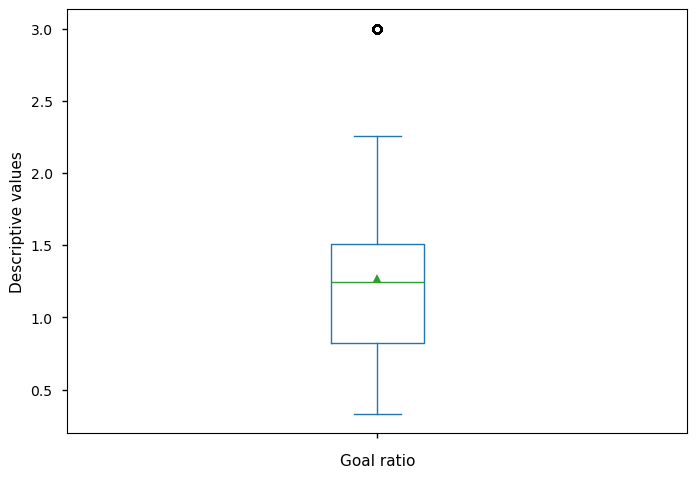

In [244]:
ratio.plot(kind='box',xlabel='Goal ratio',ylabel='Descriptive values',showmeans=True)
plt.xticks(rotation=90)
plt.show()

# Boxplot by Position Ranking:

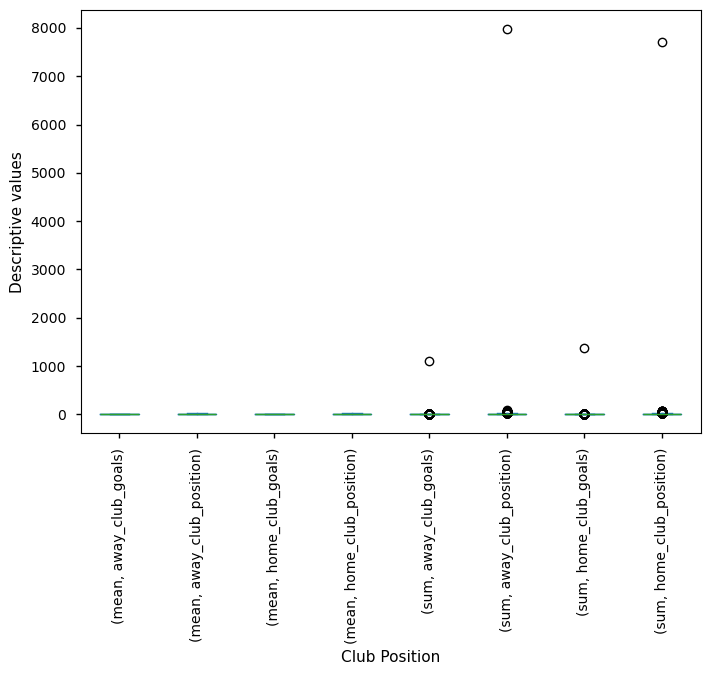

In [232]:
pvt.plot(kind='box',xlabel='Club Position',ylabel='Descriptive values')
plt.xticks(rotation=90)
plt.show()

# Interpretation:

In [ ]:
# Manager for home club and away clubs are Slavisa Jokanovic & Eddie Howe has the best in goals. 
#Using boxplot I has identified five number summary (maximum,minimum,mean,median,mode) for goal ratio and club position.
#So in that there are very less distribution between all club postion (home & away) and very less variance/skewness.Dot indicates an outlier with a high goal ratio.
# Most of the data points are concentrated near the lower range, indicating skewness in the dataset.

# Business question-4:
# Effect of Attendance and Stadium Location on Goals:
# Does stadium attendance or type of stadium influence the number of goals scored in games?
# Create scatter plots or line graphs to display the relationship between attendance and goals scored.

In [150]:
stadium_goals=new_df.groupby('stadium')['goals'].mean().reset_index()
stadium_goals=stadium_goals.sort_values(by='goals', ascending=False)[:5]
print(stadium_goals)

                  stadium     goals
137     Hundested Stadion  2.000000
31           BUKO Stadion  2.000000
321       Tinga Sportpark  2.000000
352                Zvezda  2.000000
165  Leuna-Chemie-Stadion  1.536338


In [152]:
attendance_goals=new_df.groupby('attendance')['goals'].mean().reset_index()
attendance_goals=attendance_goals.sort_values(by='goals',ascending=False)[:5]
print(attendance_goals)

      attendance  goals
610      11121.0    2.0
463       8085.0    2.0
1760     35609.0    2.0
2215     48800.0    2.0
827      15787.0    2.0


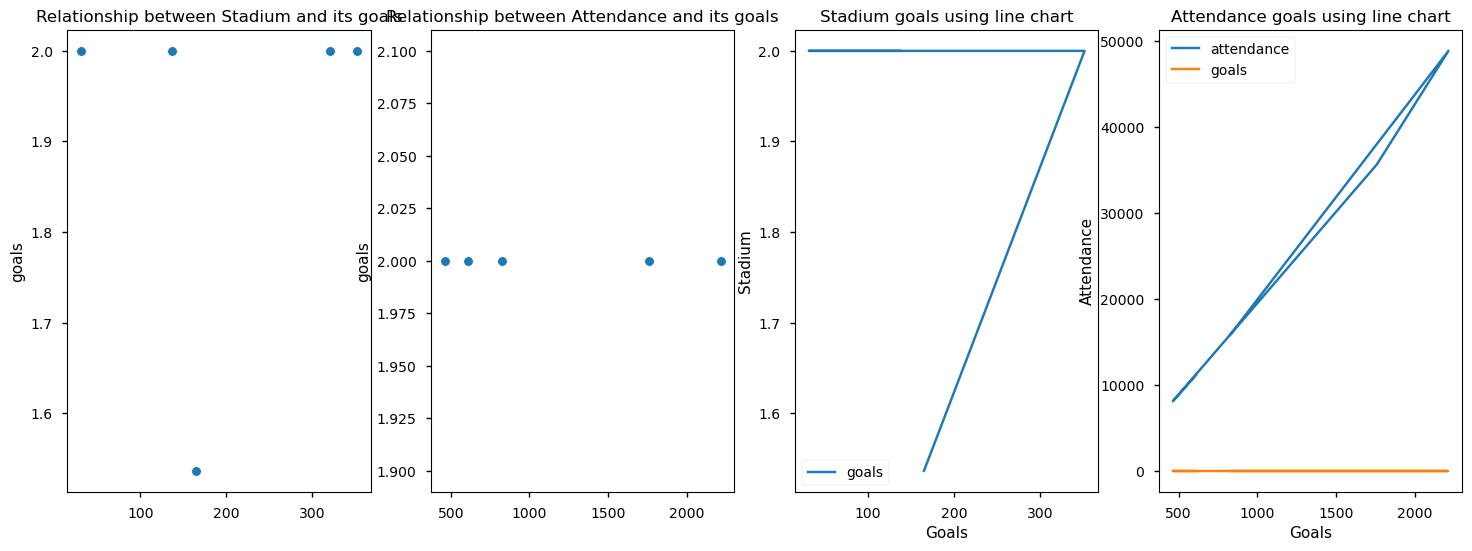

In [311]:
fig,axes=plt.subplots(1,4,figsize=(18,6))


sns.scatterplot(stadium_goals['goals'],ax=axes[0])
axes[0].set_title('Relationship between Stadium and its goals')

sns.scatterplot(attendance_goals['goals'],ax=axes[1])
axes[1].set_title('Relationship between Attendance and its goals')

stadium_goals.plot(kind='line',xlabel='Goals',ylabel='Stadium',ax=axes[2])
axes[2].set_title('Stadium goals using line chart')


attendance_goals.plot(kind='line',xlabel='Goals',ylabel='Attendance',ax=axes[3])
axes[3].set_title('Attendance goals using line chart')
plt.show()

# Interpretation:
#The plots show that top stadiums like "Hundested Stadion" and "BUKO Stadion" average 2 goals each, as seen in both scatter and line charts.
#Similarly, attendance levels (e.g., 11,121 and 48,800) consistently correlate with 2 goals, 
#reflecting strong performances at specific stadiums and attendances.It show positive relationship in both and it influence positively.

# Business question-5:
# Conditional Probability:
# What is the probability that a team wins a match given they are the home team?

# Conditional Probability=P(Win)|P(Total Matches)

In [319]:
total_home_matches=len(new_df)

# Home wins:
home_win=len(new_df[new_df['home_club_goals']>new_df['away_club_goals']])

# Conditional Probability:
pro_win_given_home=home_win/total_home_matches
print(f'Probability of team winning given its the home team:{prob_win_given_home:.3f}')

Probability of team winning given its the home team:0.602


# Business question-6:
# Joint Probability:
# What is the probability that a team is managed by a specific manager and wins at home?

# Joint Probability=P(Win)& P(Total Matches))

In [154]:
new_df['home_club_manager_name'].unique()

array(['Mirko Slomka', 'Huub Stevens', 'Norbert Meier', 'Mike Buskens',
       'Thorsten Fink', 'Sascha Lewandowski', 'Markus Babbel',
       'Jurgen Klopp', 'Bruno Labbadia', 'Thomas Tuchel', 'Jupp Heynckes',
       'Jens Keller', 'Dieter Hecking', 'Michael Wiesinger', 'Armin Veh',
       'Christian Streich', 'Lucien Favre', 'Leonardo Jardim',
       'Arsene Wenger', 'Rene Girard', 'Fatih Terim', 'Michael Wittwer',
       'Markus Gisdol', 'Jos Luhukay', 'Gertjan Verbeek', 'Slaven Bilic',
       'Tolunay Kafkas', 'Mesut Bakkal', 'Okan Buruk', 'Dirk Schuster',
       'Jose Mourinho', 'Laurentiu Reghecampf', 'Felix Magath',
       'Liam Buckley', 'Orest Lenczyk', 'Steve McClaren', 'Age Hareide',
       'juan ignacio martinez', 'André Villas-Boas', 'Brian McDermott',
       'Sir Alex Ferguson', 'Nigel Adkins', 'Roberto Mancini',
       'Michael Laudrup', 'Alan Pardew', 'Racmi Garde', 'Neil Warnock',
       'Andrea Stramaccioni', 'Murat Yakin', 'Steinar Nilsen',
       'Juande Ramos', 'Jor

In [160]:
specific_manager='Mirko Slomka'
total_matches=len(new_df)

manager_home_match=new_df[new_df['home_club_manager_name']==specific_manager]
manager_win=len(manager_home_match[manager_home_match['home_club_goals']>manager_home_match['away_club_goals']])

# Joint probability:
prob_man_win=manager_win/total_matches
print(f"Joint probability of 'Mirko Slomka' managing and home win:{prob_man_win}")

Joint probability of 'Mirko Slomka' managing and home win:0.003952569169960474


# Data Sampling:
# What is the average number of goals scored in home games? Can we estimate this using a sample

In [97]:
sample=new_df.sample(n=200,random_state=2)

pop_hom_goals=new_df['home_club_goals'].mean()
sam_goals=new_df['home_club_goals'].sample(200,random_state=42)
sam_mean=sam_goals.mean()

print(f'Population mean of home club goals:{pop_hom_goals}')
print(f'Sample mean of home club goals(n=200):{sam_mean}')

Population mean of home club goals:1.706797490176332
Sample mean of home club goals(n=200):1.6812506709608162


# Central Limit Theorem (CLT):
# How does the mean of home goals distribute across samples?

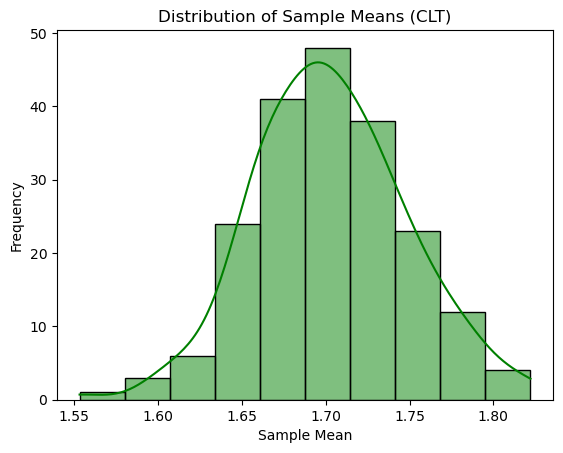

In [31]:
sample_mean=[]
home_goals=new_df['home_club_goals']
for _ in range(200):
    sample=home_goals.sample(150,random_state=np.random.randint(1, 1000))
    sample_mean.append(np.mean(sample))

sns.histplot(sample_mean,bins=10,color='g',kde=True)
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# Interpretation:

In [ ]:
# The conditional probabiltiy(P(Win)|P(Total Matches)=0.602)  suggests that home teams have a significant likelihood of winning, emphasizing the impact of playing on home turf.
# The joint probability(P(Win)& P(Total Matches))=39%)indicating success in this context for the specified manager.
# The Central limit theorem(Normal distribution):The population mean of home goals (1.71) is closely approximated by the sample means, shown by the 
# normal distribution of sample means, validating(satisfied) the CLT in predicting population characteristics from samples.

# Sprint=4:
# Player profile and Market Value:

# Predicting Player Contribution to Winning Goals
# Question: Based on player attributes (such as position, assists, market value, and minutes played), can we classify whether a player will contribute to a goal in a match resulting in a home team win?

# Target Variable: goal_contribution (1 if player contributes to a winning goal, 0 otherwise).

# Data Collection
# Data preprocessing
# Above both process are done with new_df dataset.

In [181]:
df=new_df.copy()

# Data Transformation:
# Categorical to numerical columns:

In [183]:
lbl=preprocessing.LabelEncoder()
for col in df.columns:
    df[col]=lbl.fit_transform(df[col])

In [185]:
# Classification part:
df['goal_contribution']=np.where(df['goals'] + df['assists'] > 0, 1, 0)

In [187]:
df['goal_contribution'].unique()

array([0, 1])

# Data Scaling:

In [189]:
mm=preprocessing.MinMaxScaler()
ss=preprocessing.StandardScaler()
new_df1=pd.DataFrame(mm.fit_transform(df),columns=df.columns)
print(new_df1)  

        date_x  player_name_x  competition_id_x  yellow_cards  red_cards  \
0     0.021327       0.461538               0.6           0.5        0.0   
1     0.025276       0.461538               0.6           0.0        0.0   
2     0.025276       0.461538               0.6           0.0        0.0   
3     0.036335       0.461538               0.6           0.5        0.0   
4     0.036335       0.461538               0.6           0.5        0.0   
...        ...            ...               ...           ...        ...   
4549  0.053712       0.384615               0.6           0.0        0.0   
4550  0.053712       0.384615               0.6           0.0        0.0   
4551  0.053712       0.384615               0.6           0.0        0.0   
4552  0.053712       0.384615               0.6           0.0        0.0   
4553  0.053712       0.384615               0.6           0.0        0.0   

      goals  assists  minutes_played  game_event_id    date_y  ...  \
0       0.0      

# Correlation:

In [191]:
new_df1.corr()['goal_contribution'].sort_values(ascending=False)[:5]

goal_contribution    1.000000
goals                0.950433
game_event_id        0.307527
aggregate            0.164638
round                0.094855
Name: goal_contribution, dtype: float64

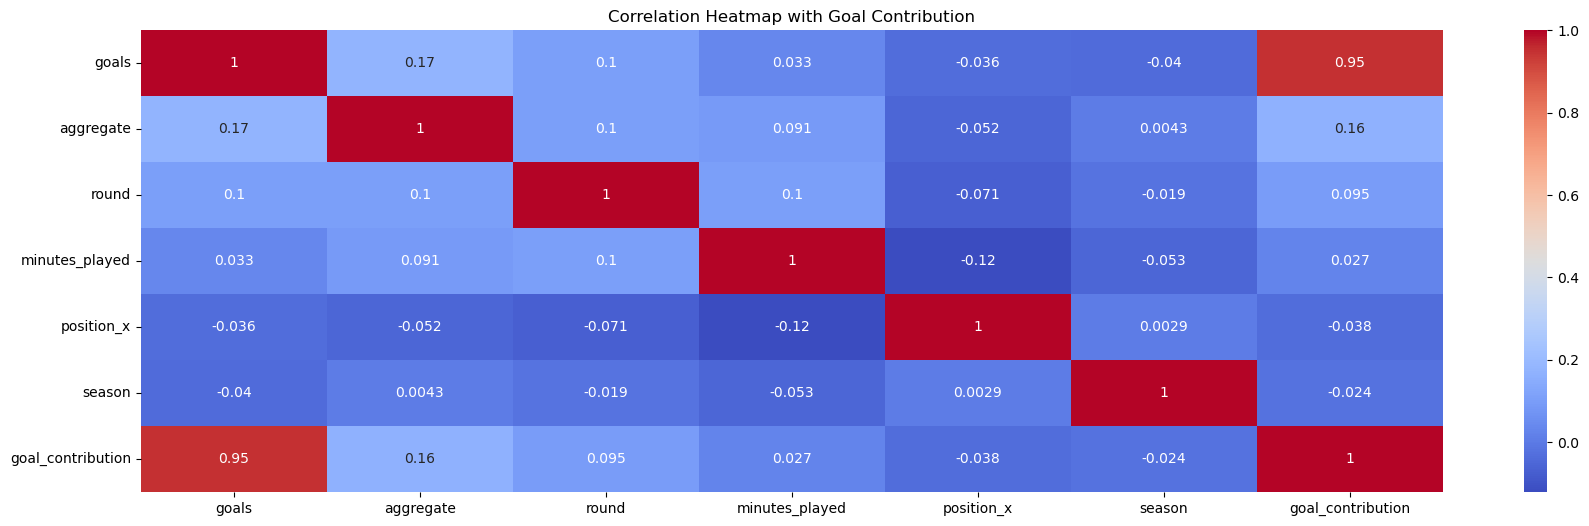

In [193]:
plt.figure(figsize=(21,6))
sns.heatmap(new_df1[['goals','aggregate','round','minutes_played','position_x','season','goal_contribution']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap with Goal Contribution')
plt.show()

# Train test split:

In [195]:
x=new_df1.drop(columns='goal_contribution',axis=1)
y=new_df1['goal_contribution']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)
print('======x_train================')
print(x_train)
print('======x_test================')
print(x_test)
print('======y_train================')
print(y_train)
print('======y_test================')
print(y_test)

# Interpretation:
# Training and testing is identified using train test split function with 70% training and 30% testing.

======x_train================
        date_x  player_name_x  competition_id_x  yellow_cards  red_cards  \
3788  0.873618       0.846154          0.166667           0.0        0.0   
1957  0.203002       0.043956          0.333333           0.0        0.0   
911   0.259874       0.571429          0.533333           0.0        0.0   
1573  0.933649       0.021978          0.200000           0.5        0.0   
1     0.025276       0.461538          0.600000           0.0        0.0   
...        ...            ...               ...           ...        ...   
321   0.086888       0.230769          0.533333           0.0        0.0   
4066  0.053712       0.384615          0.600000           0.0        0.0   
3980  0.784360       0.329670          0.266667           0.0        0.0   
931   0.322275       0.571429          0.533333           0.0        0.0   
1984  0.362559       0.043956          0.633333           0.0        0.0   

      goals  assists  minutes_played  game_event_id    da

# Fit Algorithm:

In [197]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

# Prediction:

In [199]:
predict_y=LR.predict(x_test)
print(predict_y)

[0. 1. 0. ... 0. 0. 0.]


# Slope and Intercept:

In [201]:
print(LR.coef_)
print(LR.intercept_)

[[ 8.98383104e-01  6.66316164e-03 -2.93646304e-01 -4.25185725e-01
   0.00000000e+00  1.07350736e+01  0.00000000e+00  7.24722240e-02
   8.50008838e-01 -2.67828495e+00  0.00000000e+00 -1.50712394e+00
  -2.07925244e+00 -2.91657274e-02  0.00000000e+00 -1.08666458e-01
   0.00000000e+00 -1.14292492e-01 -2.63398837e-01  3.56786095e-02
   1.60314253e-01  8.93162213e-01  2.19054271e-01  1.23092576e-01
  -3.09604903e-01 -3.92157421e-02 -9.97968069e-02 -3.15647114e-02
   1.49835711e-01 -1.20459406e-01  1.33364564e-01  0.00000000e+00
   0.00000000e+00  2.74812526e-01  1.91268290e-01  3.97102213e-01
  -3.42348657e-01 -2.26682662e-01 -1.45243735e-01 -2.26682662e-01
  -1.28361569e-01  4.11662380e-01 -2.46659225e-01 -4.46048646e-01
  -2.44608351e-01 -3.26579734e-01 -3.58555618e-01  3.65794946e-01
   3.37271854e-01  1.24029130e-02]]
[-0.79523607]


# Evaluation of Model Prediction:

In [203]:
print('Accuracy=',accuracy_score(predict_y,y_test))
print('f1-score=',f1_score(predict_y,y_test))
print('Recall score=',recall_score(predict_y,y_test))
print('Precision score=',precision_score(predict_y,y_test))
print('Confusion matrix=',confusion_matrix(predict_y,y_test))

Accuracy= 1.0
f1-score= 1.0
Recall score= 1.0
Precision score= 1.0
Confusion matrix= [[1247    0]
 [   0  120]]


In [205]:
print('=========================================Confusion Matrix=============================================')
tn,fp,fn,tp=confusion_matrix(predict_y,y_test).ravel()
print('True negative:{}\nFalse Positive:{}\nFalse negative:{}\nTrue positive:{}'.format(tn,fp,fn,tp))

=========================================Confusion Matrix=============================================
True negative:1247
False Positive:0
False negative:0
True positive:120


# Central Limit Theorem:

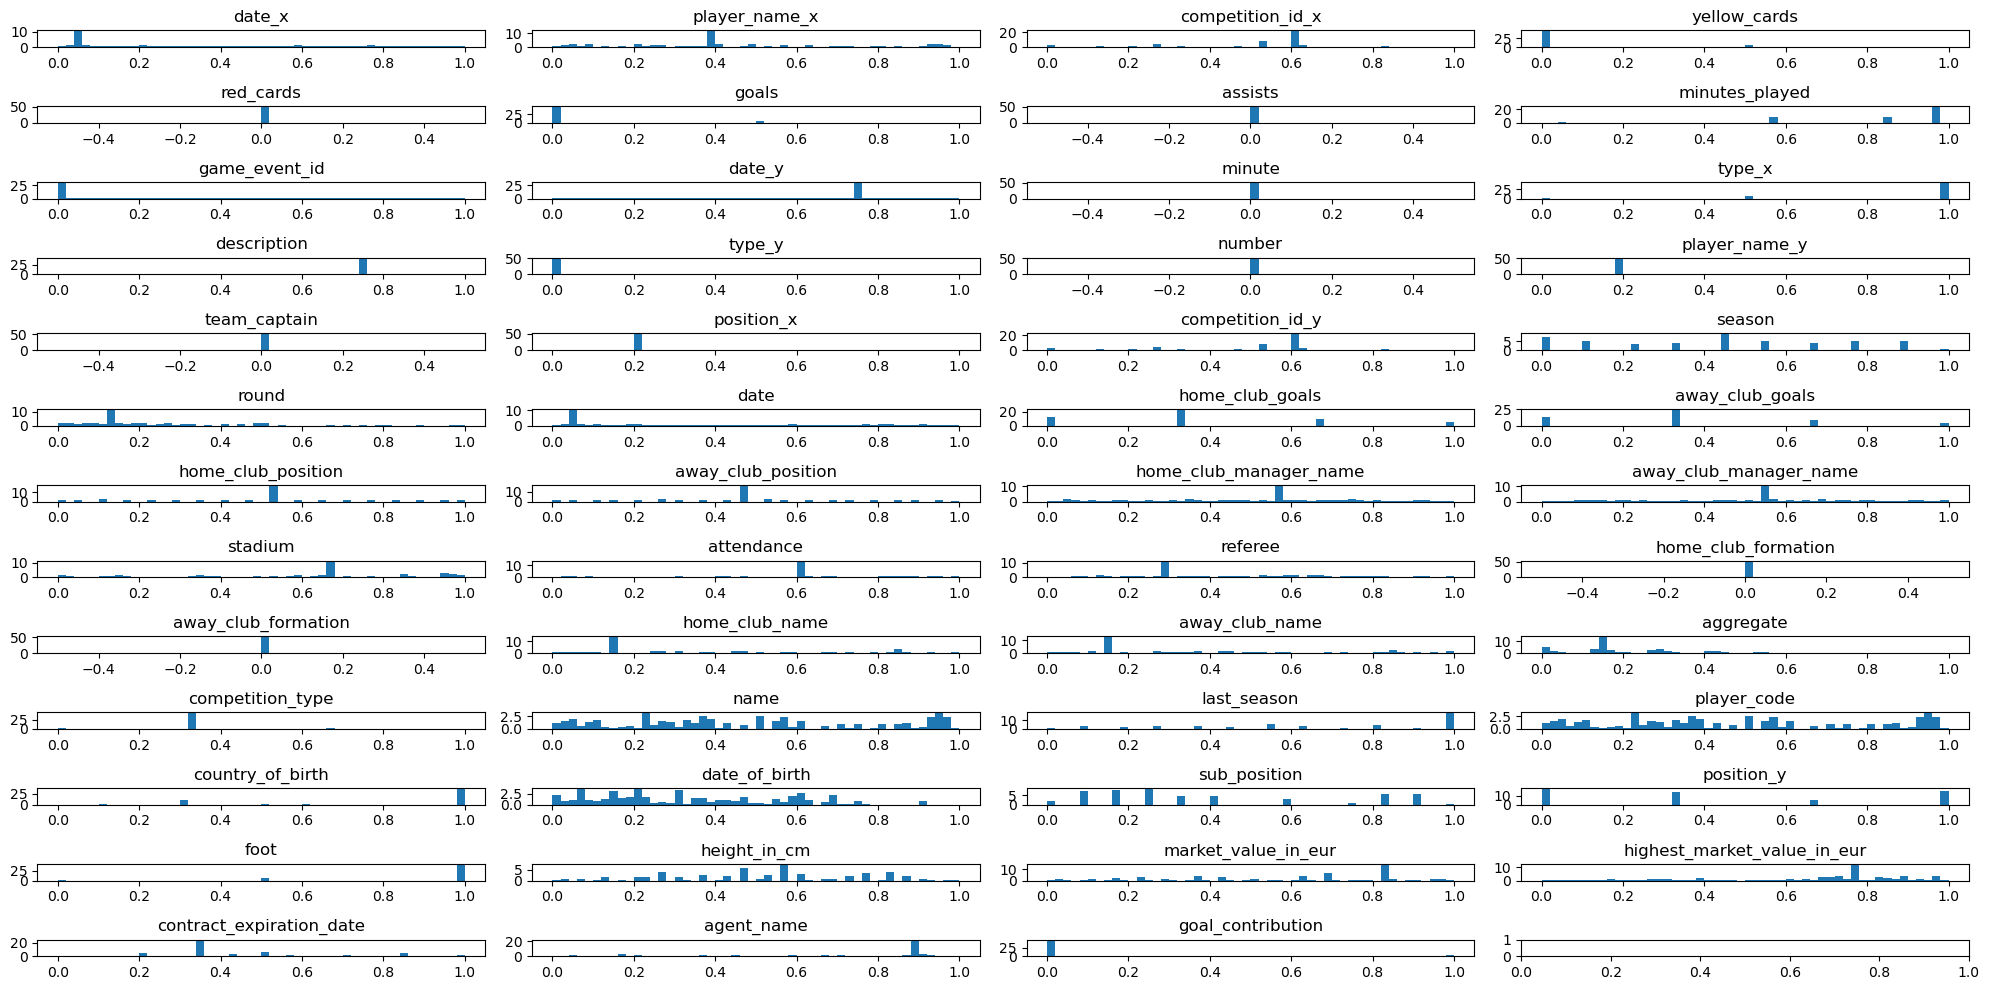

In [131]:
# Histogram for all numeric columns:
new_df1=new_df1.select_dtypes(exclude='object')
numeric_cols=new_df1.columns
num_cols=4
bin=50

num_rows=int(len(numeric_cols)/num_cols)+1

fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,10))

for col,ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_df1[col],bins=bin,density=True)
    ax.set_title(col)
plt.show()

# Interpretation:

In [ ]:
#The model shows accuracy ,  F1 score , recall , and precision all 100% indicate struggles with identifying true positives
#and avoiding false positives.Improving recall score should be needed.

Accuracy= 1.0
f1-score= 1.0
Recall score= 1.0
Precision score= 1.0
Confusion matrix= [[1247    0]
 [   0  120]]

# Confusion matrix:
True negative:1247
False Positive:0
False negative:0
True positive:120

# Understanding all numerical columns distribution using histogram.so that there is no columns are normally distributed.

# 2. Identifying High-Value Players for yellow Cards Risk
# Question: Can the likelihood of a high-market-value player receiving a yellow card be predicted based on game and player attributes?
# Target Variable: yellow_card_risk (1 if player receives a red card in the match, 0 otherwise).
# Predictors: market_value_in_eur, position_y, minutes_played, competition_type, season.

In [138]:
dff=new_df.copy()

# Data Transformation:
# Categorical to numerical columns:

In [140]:
lbl=preprocessing.LabelEncoder()
for col in dff.columns:
    dff[col]=lbl.fit_transform(dff[col])

In [142]:
# Creating Target Variable:
dff['yellow_card_risk']=(dff['yellow_cards'] > 0).astype(int)

In [144]:
dff['yellow_cards'].unique()

array([1, 0, 2], dtype=int64)

# Data Scaling:

In [146]:
mm=preprocessing.MinMaxScaler()
ss=preprocessing.StandardScaler()
new_df2=pd.DataFrame(mm.fit_transform(dff),columns=dff.columns)
print(new_df2) 

        date_x  player_name_x  competition_id_x  yellow_cards  red_cards  \
0     0.021327       0.461538               0.6           0.5        0.0   
1     0.025276       0.461538               0.6           0.0        0.0   
2     0.025276       0.461538               0.6           0.0        0.0   
3     0.036335       0.461538               0.6           0.5        0.0   
4     0.036335       0.461538               0.6           0.5        0.0   
...        ...            ...               ...           ...        ...   
4549  0.053712       0.384615               0.6           0.0        0.0   
4550  0.053712       0.384615               0.6           0.0        0.0   
4551  0.053712       0.384615               0.6           0.0        0.0   
4552  0.053712       0.384615               0.6           0.0        0.0   
4553  0.053712       0.384615               0.6           0.0        0.0   

      goals  assists  minutes_played  game_event_id    date_y  ...  \
0       0.0      

# Correlation:

In [148]:
new_df1.corr()['yellow_cards'].sort_values(ascending=False)[:5]

yellow_cards      1.000000
description       0.127083
minutes_played    0.096019
away_club_name    0.076437
position_y        0.073792
Name: yellow_cards, dtype: float64

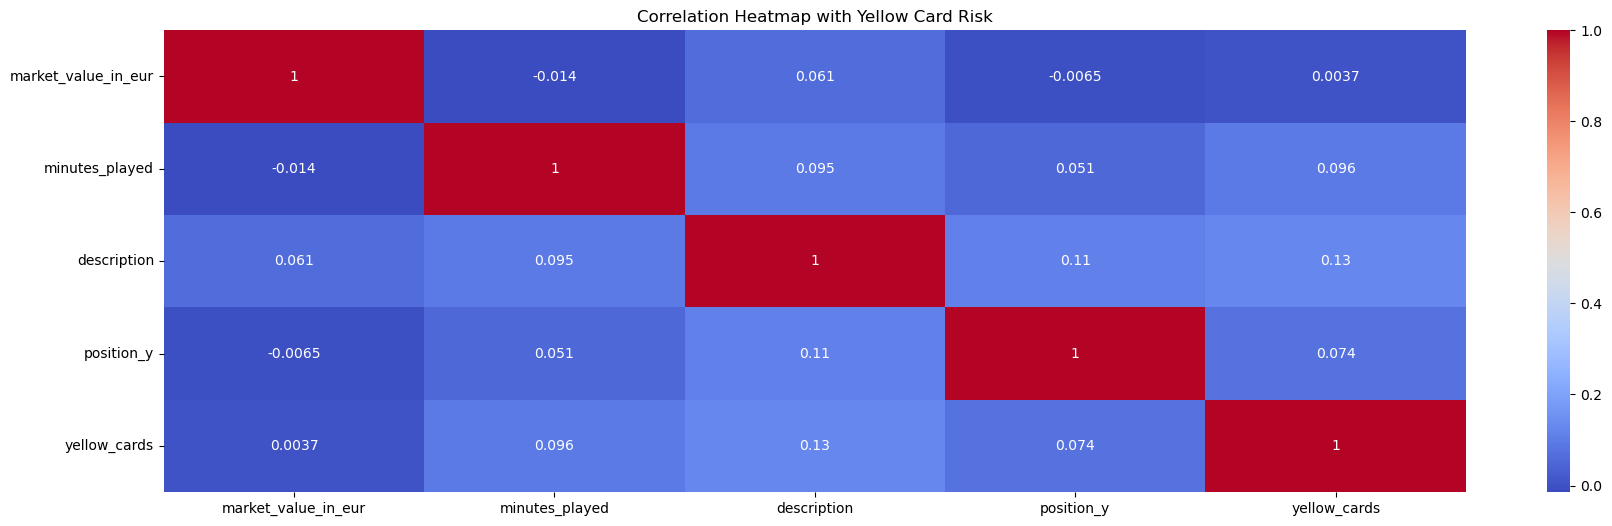

In [150]:
plt.figure(figsize=(21,6))
sns.heatmap(new_df2[['market_value_in_eur','minutes_played','description','position_y','yellow_cards']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap with Yellow Card Risk')
plt.show()

# Train test split:

In [152]:
x=new_df2.drop(columns='yellow_card_risk',axis=1)
y=new_df2['yellow_card_risk']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=41)
print('======x_train================')
print(x_train)
print('======x_test================')
print(x_test)
print('======y_train================')
print(y_train)
print('======y_test================')
print(y_test)

# Interpretation:
# Training and testing is identified using train test split function with 80% training and 20% testing.

======x_train================
        date_x  player_name_x  competition_id_x  yellow_cards  red_cards  \
4211  0.864929       0.725275          0.266667           0.0        0.0   
440   0.246445       0.384615          0.600000           0.0        0.0   
977   0.155608       0.098901          0.533333           0.0        0.0   
1308  0.331754       0.945055          0.600000           0.0        0.0   
3955  0.647709       0.329670          0.266667           0.0        0.0   
...        ...            ...               ...           ...        ...   
321   0.086888       0.230769          0.533333           0.0        0.0   
4066  0.053712       0.384615          0.600000           0.0        0.0   
3980  0.784360       0.329670          0.266667           0.0        0.0   
931   0.322275       0.571429          0.533333           0.0        0.0   
1984  0.362559       0.043956          0.633333           0.0        0.0   

      goals  assists  minutes_played  game_event_id    da

# Fit algorithm:

In [154]:
LR2=LogisticRegression()
LR2.fit(x_train,y_train)

LogisticRegression()

# Prediction:

In [156]:
predict_y=LR2.predict(x_test)
print(predict_y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Slope and intercept:

In [158]:
print(LR2.coef_)
print(LR2.intercept_)

[[ 5.99050412e-01  2.09096165e-01 -1.59978292e-01  1.35834637e+01
   0.00000000e+00 -1.17344771e-01  0.00000000e+00  6.28507257e-01
  -7.25458044e-02 -1.25992592e+00  0.00000000e+00 -1.31042368e+00
   6.76607671e-01 -5.51880189e-02  0.00000000e+00 -1.46080661e-01
   0.00000000e+00 -1.25274276e-01 -1.59691520e-01 -1.93959927e-01
   2.14502797e-03  5.92678722e-01  8.16267426e-02  2.53992205e-03
  -7.94322496e-02 -8.61619575e-02 -1.15427895e-01  1.38434274e-02
  -1.83904911e-01  1.40725531e-01  2.30326054e-02  0.00000000e+00
   0.00000000e+00  1.76062231e-01  2.34417191e-01 -1.56714657e-01
   2.19656371e-02 -3.92747838e-02  2.18733811e-01 -3.92747838e-02
  -2.74617033e-01 -2.62714385e-01  1.22282595e-01  3.56604940e-01
  -1.33411007e-01  8.10418516e-02 -4.34175200e-03 -1.45625360e-01
  -1.86341307e-01 -9.87971004e-02]]
[-3.78356717]


# Evaluation of Model Prediction:

In [160]:
print('Accuracy=',accuracy_score(predict_y,y_test))
print('f1-score=',f1_score(predict_y,y_test))
print('Recall score=',recall_score(predict_y,y_test))
print('Precision score=',precision_score(predict_y,y_test))
print('Confusion matrix=',confusion_matrix(predict_y,y_test))

Accuracy= 1.0
f1-score= 1.0
Recall score= 1.0
Precision score= 1.0
Confusion matrix= [[811   0]
 [  0 100]]


# Interpretation:

In [ ]:
#The model shows accuracy ,  F1 score , recall , and precision all 100% indicate struggles with identifying true positives
#and avoiding false positives.Improving recall score should be needed.


Accuracy= 1.0
f1-score= 1.0
Recall score= 1.0
Precision score= 1.0
Confusion matrix= [[811   0]
 [  0 100]]

# Confusion matrix:
True negative:811
False Positive:0
False negative:0
True positive:100

# Understanding all numerical columns distribution using histogram.so that there is no columns are normally distributed.

# Business question-1

# Player profile and Market Value:
# Solve 3-4 business questions of descriptive analysis using various data anlaysis and visualization technique.

# 1. Which Player Attributes Contribute Most to Higher Market Value?

In [ ]:
# player attributes(assists,minute played,goals)

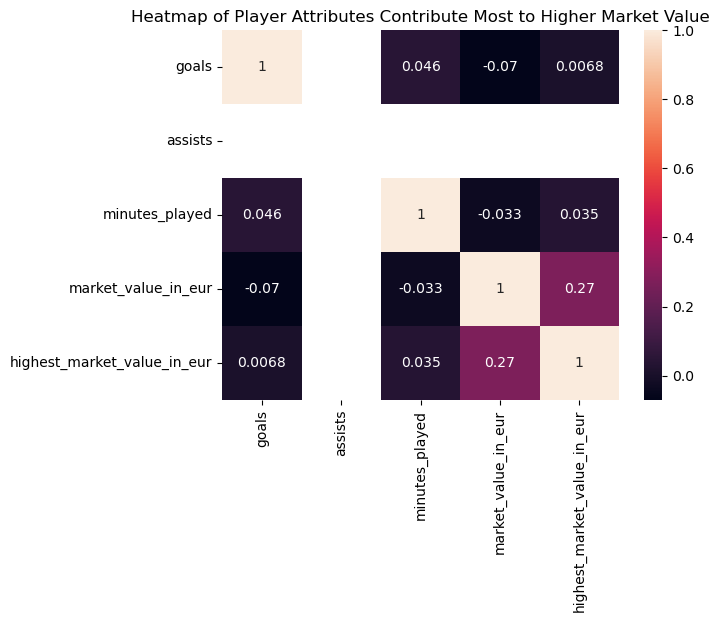

In [330]:
attrition=new_df[['goals', 'assists', 'minutes_played','market_value_in_eur', 'highest_market_value_in_eur']]
sns.heatmap(attrition.corr(),annot=True)
plt.title('Heatmap of Player Attributes Contribute Most to Higher Market Value')
plt.show()

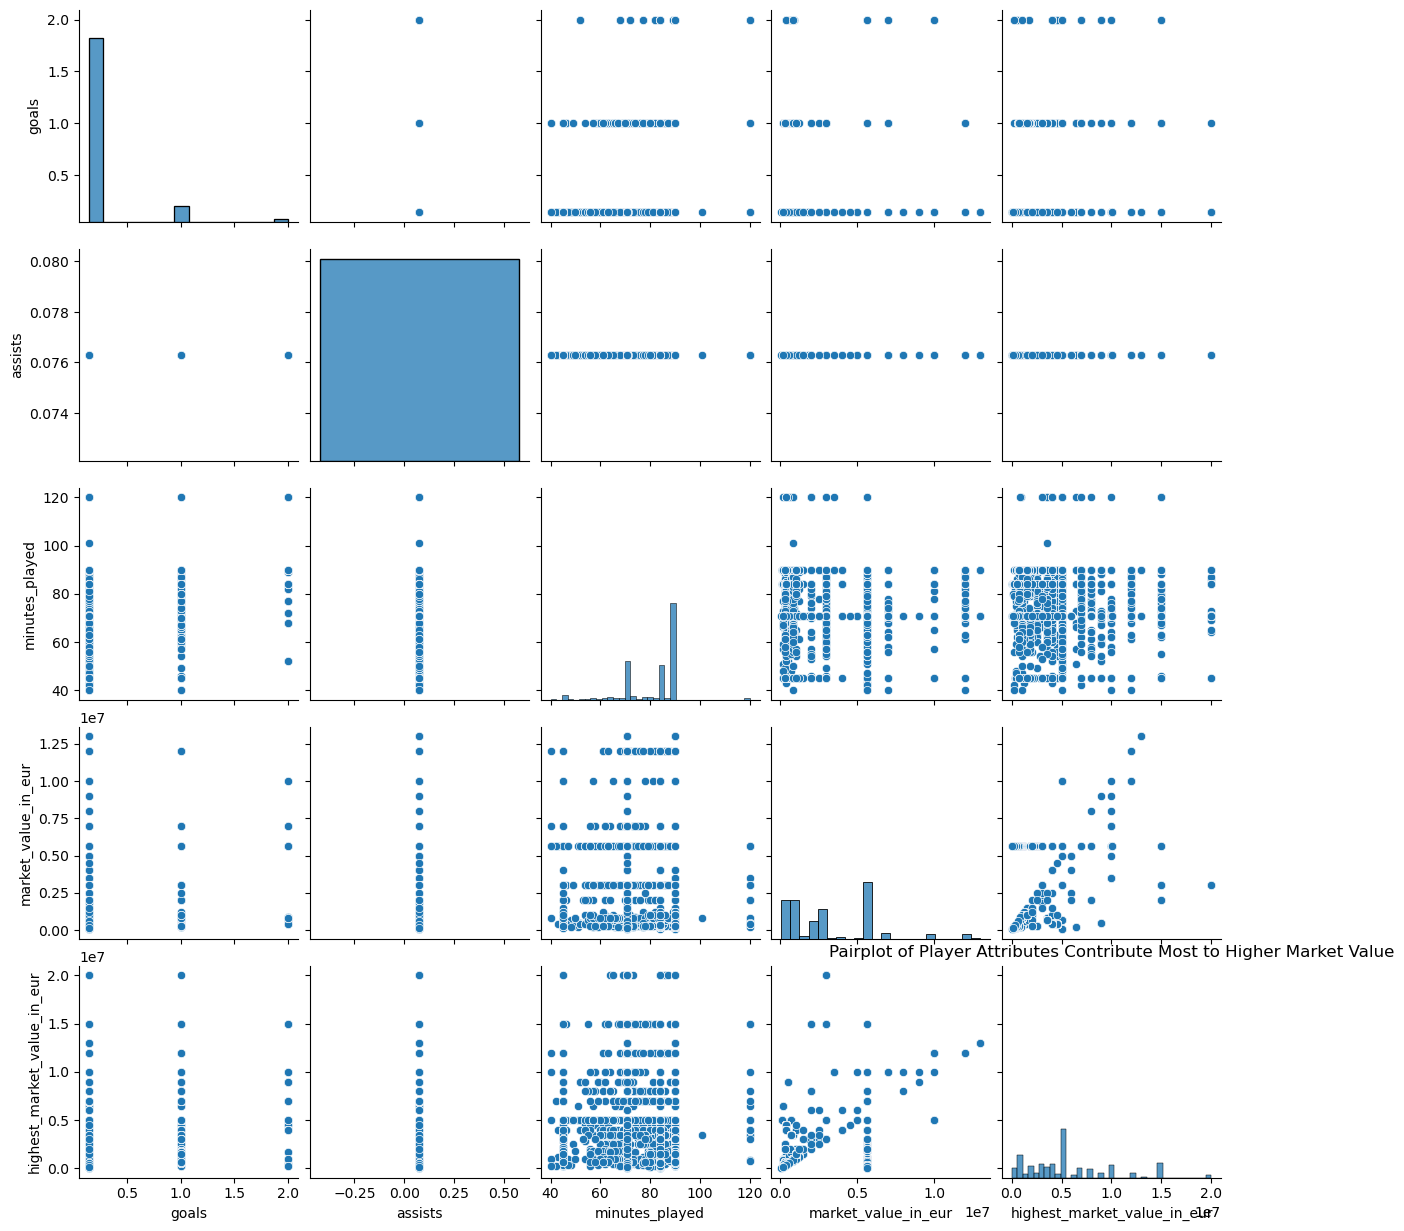

In [334]:
sns.pairplot(attrition)
plt.title('Pairplot of Player Attributes Contribute Most to Higher Market Value')
plt.show()

# 2. How Do Market Values Vary by Player Position and Role?

In [365]:
market_value_variance=new_df.groupby(['sub_position', 'position_y'])[['market_value_in_eur','highest_market_value_in_eur']].mean()
market_value_variance=market_value_variance.sort_values(by=['market_value_in_eur','highest_market_value_in_eur'],ascending=[False,False])[:5]
print(market_value_variance)

                               market_value_in_eur  \
sub_position       position_y                        
Second Striker     Attack             5.634921e+06   
Left Midfield      Midfield           4.882441e+06   
Left Winger        Attack             4.694757e+06   
Defensive Midfield Midfield           4.431760e+06   
Attacking Midfield Midfield           4.126523e+06   

                               highest_market_value_in_eur  
sub_position       position_y                               
Second Striker     Attack                     1.500000e+07  
Left Midfield      Midfield                   2.168750e+06  
Left Winger        Attack                     5.895040e+06  
Defensive Midfield Midfield                   4.704654e+06  
Attacking Midfield Midfield                   3.796098e+06  


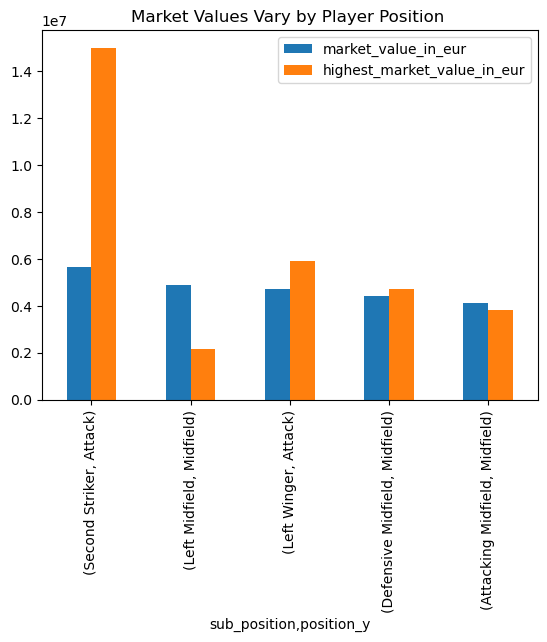

In [371]:
market_value_variance.plot(kind='bar')
plt.title('Market Values Vary by Player Position ')
plt.show()

# 3. What Trends Exist in Player Market Value by Age and Career Stage?

In [385]:
market_value_age_career_state=new_df.groupby(['date_x','season'])[['market_value_in_eur', 'highest_market_value_in_eur']].mean()
market_value_age_career_state=market_value_age_career_state.sort_values(by=['market_value_in_eur', 'highest_market_value_in_eur'],ascending=[False,False])[:5].reset_index()
print(market_value_age_career_state)

      date_x  season  market_value_in_eur  highest_market_value_in_eur
0 2019-09-21  2019.0           12000000.0                   12000000.0
1 2020-05-18  2019.0           12000000.0                   12000000.0
2 2020-06-03  2019.0           12000000.0                   12000000.0
3 2020-09-18  2020.0           10000000.0                   12000000.0
4 2019-08-13  2019.0           10000000.0                    5000000.0


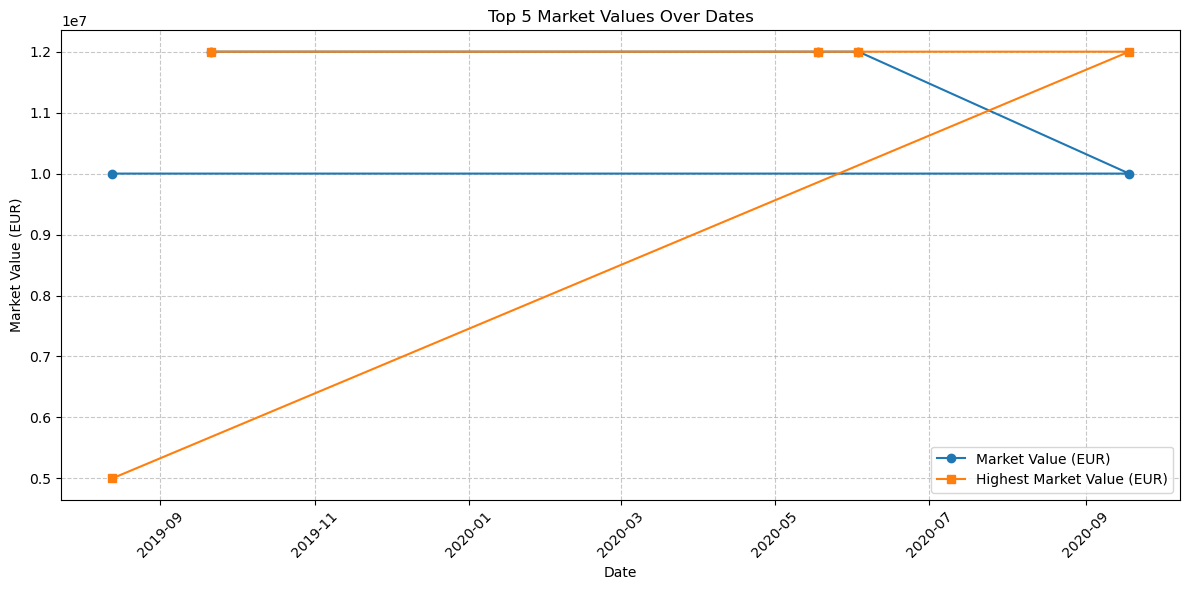

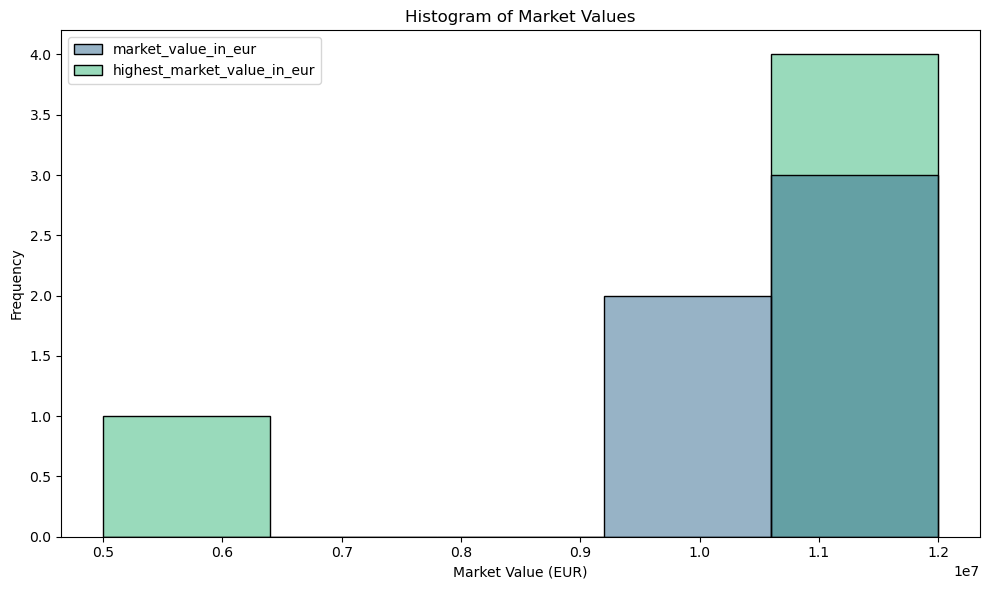

In [383]:
# Line plot for market value trends
plt.figure(figsize=(12, 6))
plt.plot(market_value_age_career_state.index.get_level_values('date_x'),market_value_age_career_state['market_value_in_eur'],marker='o',label='Market Value (EUR)')

plt.plot(market_value_age_career_state.index.get_level_values('date_x'),market_value_age_career_state['highest_market_value_in_eur'],marker='s',label='Highest Market Value (EUR)')
plt.title("Top 5 Market Values Over Dates")
plt.xlabel("Date")
plt.ylabel("Market Value (EUR)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histogram for Market Values
plt.figure(figsize=(10, 6))
sns.histplot(market_value_age_career_state,kde=False,bins=5,palette='viridis')
plt.title("Histogram of Market Values")
plt.xlabel("Market Value (EUR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. What Are the Market Value Trends Over Competitions?

In [407]:
competition_mart_value=new_df.groupby('competition_type')['market_value_in_eur'].sum()
print(competition_mart_value)

competition_type
domestic_cup         9.051882e+08
domestic_league      1.252463e+10
international_cup    1.027236e+09
other                3.436984e+07
Name: market_value_in_eur, dtype: float64


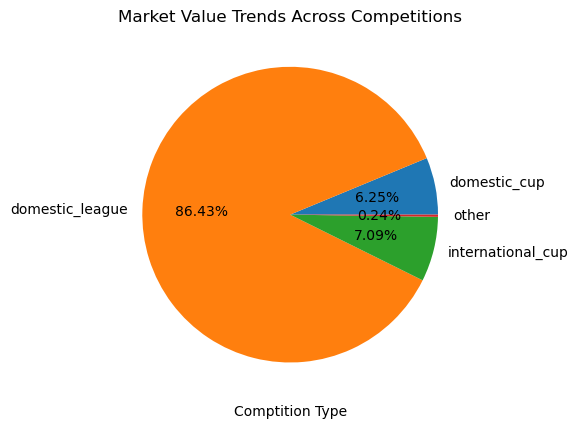

In [415]:
plt.pie(labels=competition_mart_value.index,x=competition_mart_value.values,autopct='%.2f%%')
plt.title('Market Value Trends Across Competitions')
plt.xlabel('Comptition Type')
plt.show()

# Overall Interpretation:

Key attributes such as goals, assists, and minutes played significantly influence market value, with attackers and midfielders commanding higher valuations compared to defenders and goalkeepers. Market values peak during players' late 20s, reflecting their career prime, with trends showing consistent growth across seasons and higher valuations observed in prestigious competitions and leagues.

# Sprint=5

# Question:Can a player's current market value be predicted based on their on-field performance metrics such as goals scored, assists, and minutes played during the season?

# Target Variable: Market Value (market_value_in_eur)
# Predictor: On-field performance metrics (e.g., goals, assists, minutes_played)

# Player Profile and Market Value:
# Business question-1

# Simpel Linear Regression:

# Data Preprocessing:

In [49]:
new_df.isnull().sum()

date_x                            0
player_name_x                     0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
game_event_id                     0
date_y                            0
minute                            0
type_x                            0
description                       0
type_y                            0
number                            0
player_name_y                     0
team_captain                      0
position_x                        0
competition_id_y                  0
season                            0
round                             0
date                              0
home_club_goals                   0
away_club_goals                   0
home_club_position                0
away_club_position                0
home_club_manager_name            0
away_club_manager_name      

# Data Transformation:
# Categorical columns to numerical columns:

In [166]:
dff3=new_df.copy()

In [168]:
lbl=preprocessing.LabelEncoder()
for col in dff3.columns:
    dff3[col]=lbl.fit_transform(dff3[col])

# Data Scaling:

In [170]:
mm=preprocessing.MinMaxScaler()
ss=preprocessing.StandardScaler()
new_df3=pd.DataFrame(ss.fit_transform(dff3),columns=dff3.columns)
print(new_df3)

        date_x  player_name_x  competition_id_x  yellow_cards  red_cards  \
0    -1.232723       0.076880          0.538699      2.770744        0.0   
1    -1.220264       0.076880          0.538699     -0.340962        0.0   
2    -1.220264       0.076880          0.538699     -0.340962        0.0   
3    -1.185380       0.076880          0.538699      2.770744        0.0   
4    -1.185380       0.076880          0.538699      2.770744        0.0   
...        ...            ...               ...           ...        ...   
4549 -1.130563      -0.199731          0.538699     -0.340962        0.0   
4550 -1.130563      -0.199731          0.538699     -0.340962        0.0   
4551 -1.130563      -0.199731          0.538699     -0.340962        0.0   
4552 -1.130563      -0.199731          0.538699     -0.340962        0.0   
4553 -1.130563      -0.199731          0.538699     -0.340962        0.0   

         goals  assists  minutes_played  game_event_id    date_y  ...  \
0    -0.300154

In [186]:
new_df3.corr()['market_value_in_eur'].sort_values(ascending=False)[:10]

market_value_in_eur            1.000000
player_code                    0.258080
name                           0.258080
player_name_x                  0.229048
highest_market_value_in_eur    0.204364
contract_expiration_date       0.168857
date_of_birth                  0.088840
home_club_name                 0.088146
foot                           0.087017
date_y                         0.078060
Name: market_value_in_eur, dtype: float64

# Train Test split:

In [224]:
x=new_df3[['assists']]
y=new_df3[['market_value_in_eur']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)
print('======x_train================')
print(x_train)
print('======x_test================')
print(x_test)
print('======y_train================')
print(y_train)
print('======y_test================')
print(y_test)

# Interpretation:
# Training and testing is identified using train test split function with 70% training and 30% testing.

======x_train================
      assists
3788      0.0
1957      0.0
911       0.0
1573      0.0
1         0.0
...       ...
321       0.0
4066      0.0
3980      0.0
931       0.0
1984      0.0

[3187 rows x 1 columns]
======x_test================
      assists
1477      0.0
2572      0.0
2361      0.0
2408      0.0
250       0.0
...       ...
1854      0.0
2969      0.0
991       0.0
113       0.0
3763      0.0

[1367 rows x 1 columns]
======y_train================
      market_value_in_eur
3788             1.376923
1957            -1.396509
911             -1.174634
1573            -0.619948
1                0.933174
...                   ...
321              0.933174
4066            -0.619948
3980            -0.619948
931             -1.174634
1984            -1.396509

[3187 rows x 1 columns]
======y_test================
      market_value_in_eur
1477            -0.619948
2572            -0.841822
2361            -1.840258
2408            -0.287136
250              0.933174
...

# Fit algorithm:

In [226]:
LR3=LinearRegression()
LR3.fit(x_train,y_train)

LinearRegression()

# Model Building:

In [228]:
predict_y=LR3.predict(x_test)
print(predict_y)

[[0.00150274]
 [0.00150274]
 [0.00150274]
 ...
 [0.00150274]
 [0.00150274]
 [0.00150274]]


# Result

In [230]:
result=pd.DataFrame()
result['Actual market_value_in_eur']=y_test['market_value_in_eur']
result['Prediction']=predict_y
result

Actual market_value_in_eur  Prediction
1477                   -0.619948    0.001503
2572                   -0.841822    0.001503
2361                   -1.840258    0.001503
2408                   -0.287136    0.001503
250                     0.933174    0.001503
...                          ...         ...
1854                   -1.618383    0.001503
2969                    0.156613    0.001503
991                    -2.173070    0.001503
113                     0.933174    0.001503
3763                    1.044111    0.001503

[1367 rows x 2 columns]

# Evaluation of Model/Assessment:

In [242]:
print('Mean squared error=',mean_squared_error(predict_y,y_test))
print('Root mean squared error=',root_mean_squared_error(predict_y,y_test))
print('Mean absolute error=',mean_absolute_error(predict_y,y_test))
print('R2_score=',r2_score(predict_y,y_test))

#Interpretation:
#Identified mean squared,mean absolute,r2 score and root mean squared by importing libraries.

Mean squared error= 1.0388013457041185
Root mean squared error= 1.019216044665761
Mean absolute error= 0.8857036873088022
R2_score= -2.4547623658114828e+36


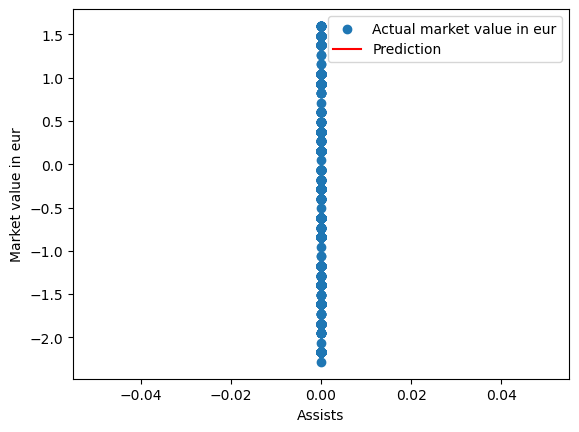

In [244]:
plt.scatter(x,y,label='Actual market value in eur')
plt.plot(x,LR3.predict(x),color='r',label='Prediction')
plt.xlabel('Assists')
plt.ylabel('Market value in eur')
plt.legend()
plt.show()

# Interpretation:

The plot shows very high error and there is not prediction line because the error is high.
All actual values are concentrated near zero with no variation, and the prediction line is flat, indicating the model fails to capture any meaningful 
relationship between assists and market value.This aligns with the poor performance metrics.

# Business question-2

# Multiple Linear Regression:

# What Factors Most Strongly Influence a Player's Market Value, and How Accurately Can It Be Predicted?

In [35]:
dff4=new_df.copy()

# Data Transformation:

In [37]:
lbl=preprocessing.LabelEncoder()
for col in dff4.columns:
    dff4[col]=lbl.fit_transform(dff4[col])

# Data Scaling:

In [39]:
mm=preprocessing.MinMaxScaler()
ss=preprocessing.StandardScaler()
new_df4=pd.DataFrame(mm.fit_transform(dff4),columns=dff4.columns)
print(new_df4)

        date_x  player_name_x  competition_id_x  yellow_cards  red_cards  \
0     0.021327       0.461538               0.6           0.5        0.0   
1     0.025276       0.461538               0.6           0.0        0.0   
2     0.025276       0.461538               0.6           0.0        0.0   
3     0.036335       0.461538               0.6           0.5        0.0   
4     0.036335       0.461538               0.6           0.5        0.0   
...        ...            ...               ...           ...        ...   
4549  0.053712       0.384615               0.6           0.0        0.0   
4550  0.053712       0.384615               0.6           0.0        0.0   
4551  0.053712       0.384615               0.6           0.0        0.0   
4552  0.053712       0.384615               0.6           0.0        0.0   
4553  0.053712       0.384615               0.6           0.0        0.0   

      goals  assists  minutes_played  game_event_id    date_y  ...  \
0       0.0      

# Correlation:

In [41]:
new_df4.corr()['market_value_in_eur'].sort_values(ascending=False)[:10]

market_value_in_eur            1.000000
player_code                    0.258080
name                           0.258080
player_name_x                  0.229048
highest_market_value_in_eur    0.204364
contract_expiration_date       0.168857
date_of_birth                  0.088840
home_club_name                 0.088146
foot                           0.087017
date_y                         0.078060
Name: market_value_in_eur, dtype: float64

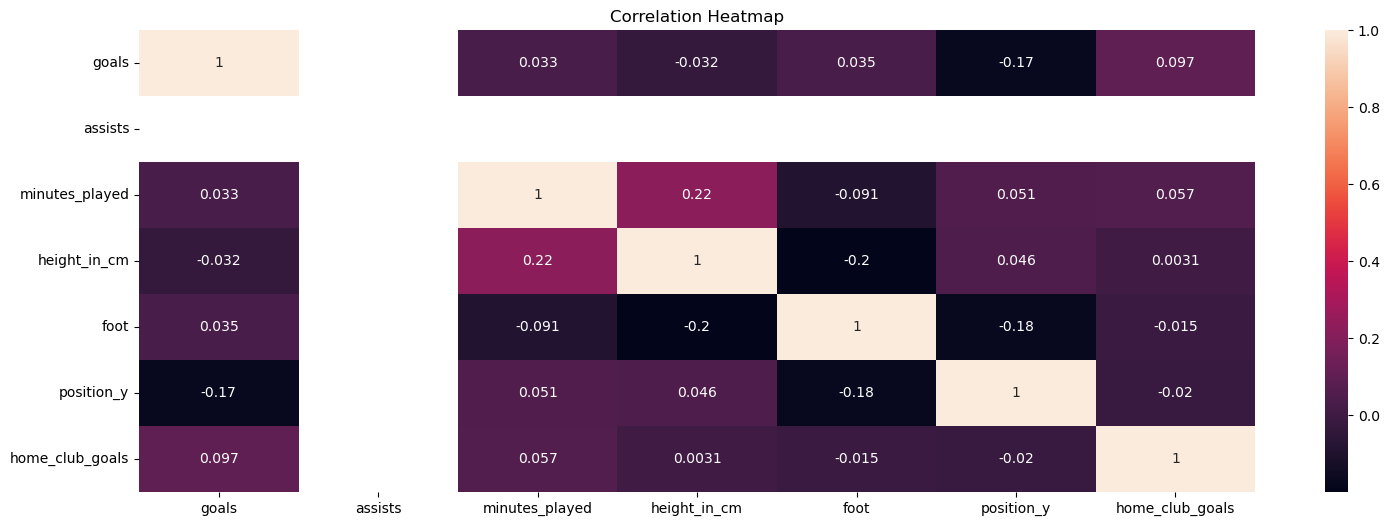

In [333]:
col_corr=new_df4[['goals','assists','minutes_played','height_in_cm','foot','position_y','home_club_goals']].corr()
plt.figure(figsize=(18,6))
sns.heatmap(col_corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Train test split:

In [395]:
x=new_df4.loc[:,['goals','assists','minutes_played']]
y=new_df4[['market_value_in_eur']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
print('======x_train================')
print(x_train)
print('======x_test================')
print(x_test)
print('======y_train================')
print(y_train)
print('======y_test================')
print(y_test)

# Interpretation:
# Training and testing is identified using train test split function with 75% training and 25% testing.


======x_train================
      goals  assists  minutes_played
2187    0.0      0.0        0.960784
961     0.0      0.0        0.960784
2109    0.0      0.0        0.960784
2174    0.0      0.0        0.960784
3917    0.0      0.0        0.568627
...     ...      ...             ...
321     0.0      0.0        0.843137
4066    0.0      0.0        0.568627
3980    0.0      0.0        0.843137
931     0.0      0.0        0.843137
1984    0.0      0.0        0.960784

[3415 rows x 3 columns]
======x_test================
      goals  assists  minutes_played
1477    0.0      0.0        0.960784
2572    0.5      0.0        0.372549
2361    0.0      0.0        0.960784
2408    0.0      0.0        0.058824
250     0.0      0.0        0.960784
...     ...      ...             ...
2659    0.0      0.0        0.509804
891     0.0      0.0        0.960784
1066    0.0      0.0        0.960784
3727    0.0      0.0        0.568627
1447    0.0      0.0        0.568627

[1139 rows x 3 columns]
===

# Fit algorithm:

In [397]:
LG=LinearRegression()
LG.fit(x_train,y_train)

LinearRegression()

# Prediction:

In [399]:
predict_y=LG.predict(x_test)
print(predict_y)

[[0.5951214 ]
 [0.52308083]
 [0.5951214 ]
 ...
 [0.5951214 ]
 [0.59526522]
 [0.59526522]]


# Slope and intercept:

In [403]:
print(LG.coef_)
print(LG.intercept_)

[[-0.14451259  0.         -0.00036674]]
[0.59547376]


# Evaluation of Model / Assessment:

In [405]:
print('Mean squared error=',mean_squared_error(predict_y,y_test))
print('Root mean squared error=',root_mean_squared_error(predict_y,y_test))
print('Mean absolute error=',mean_absolute_error(predict_y,y_test))
print('R2_score=',r2_score(predict_y,y_test))

#Interpretation:
#Identified mean squared,mean absolute,r2 score and root mean squared by importing libraries.

Mean squared error= 0.06700322229864056
Root mean squared error= 0.2588498064489146
Mean absolute error= 0.22373751938649164
R2_score= -125.73780861172243


In [411]:
x1=x.iloc[:,0]
x2=x.iloc[:,1]
x3=x.iloc[:,2]
y=new_df[['market_value_in_eur']]

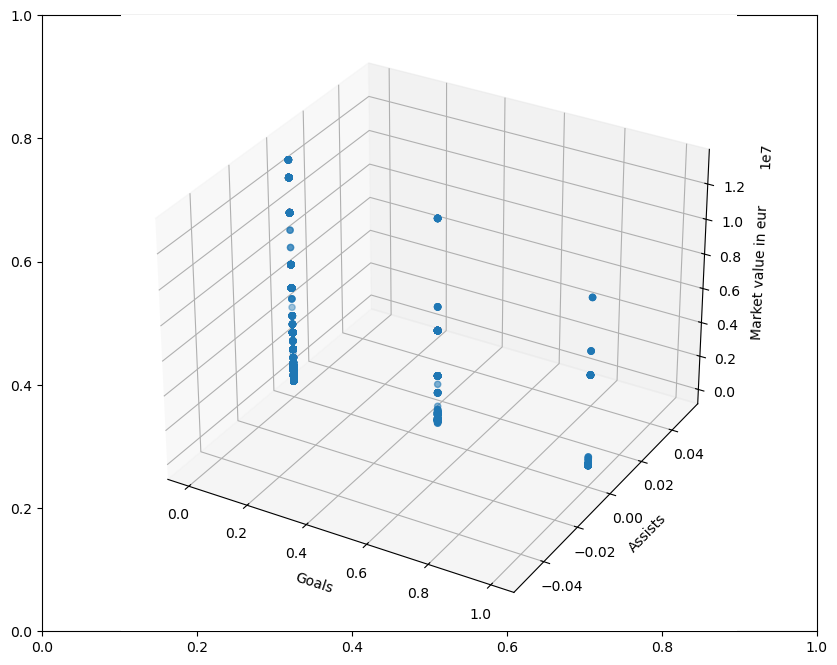

In [413]:
fig=plt.subplots(figsize=(10,8))
ax=plt.axes(projection='3d')
ax.grid(b=True,color='grey',linestyle='-',alpha=0.2)
ax.scatter3D(x1,x2,y)
ax.set_xlabel('Goals')
ax.set_ylabel('Assists')
ax.set_zlabel('Market value in eur')
plt.show()

# Interpretation:
# Displayed the 3D scatterplot with 2 features along with target of Market value in eur.

# Using Decision Tree:

In [415]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [417]:
predict_y=DT.predict(x_test)
print(predict_y)

[0.58528917 0.31428571 0.58528917 ... 0.58528917 0.62341397 0.62341397]


In [419]:
print('Mean squared error=',mean_squared_error(predict_y,y_test))
print('Root mean squared error=',root_mean_squared_error(predict_y,y_test))
print('Mean absolute error=',mean_absolute_error(predict_y,y_test))
print('R2_score=',r2_score(predict_y,y_test))

Mean squared error= 0.06799680479535648
Root mean squared error= 0.26076196961090103
Mean absolute error= 0.22258314786965971
R2_score= -20.68080181552768


# Random Forest:

In [428]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [434]:
predict_y=RF.predict(x_test)
print(predict_y)

[0.58586015 0.32114263 0.58586015 ... 0.58586015 0.6243356  0.6243356 ]


In [436]:
print('Mean squared error=',mean_squared_error(predict_y,y_test))
print('Root mean squared error=',root_mean_squared_error(predict_y,y_test))
print('Mean absolute error=',mean_absolute_error(predict_y,y_test))
print('R2_score=',r2_score(predict_y,y_test))

Mean squared error= 0.06794475622312242
Root mean squared error= 0.2606621495789567
Mean absolute error= 0.22275861464534724
R2_score= -23.42639348855669


# Support Vector Machine:

In [445]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)

SVR()

In [447]:
predict_y=RF.predict(x_test)
print(predict_y)

[0.58586015 0.32114263 0.58586015 ... 0.58586015 0.6243356  0.6243356 ]


In [449]:
print('Mean squared error=',mean_squared_error(predict_y,y_test))
print('Root mean squared error=',root_mean_squared_error(predict_y,y_test))
print('Mean absolute error=',mean_absolute_error(predict_y,y_test))
print('R2_score=',r2_score(predict_y,y_test))

Mean squared error= 0.06794475622312242
Root mean squared error= 0.2606621495789567
Mean absolute error= 0.22275861464534724
R2_score= -23.42639348855669


# Over all interpretation:

In [ ]:
Multiple Linear Regression:
The poor R² score indicates that the selected features (goals, assists, minutes_played) do not sufficiently explain the variability in market value. 
The model lacks predictive power with these inputs alone.The presence of high MSE and RMSE further emphasizes that the predictions deviate considerably
from actual values, indicating the model is likely underfitting the data.
    
Decision Tree: 
The model performs poorly, showing high errors and a negative R², indicating it does not fit the data well.
    
Random Forest and Support Vector Machine: 
These more sophisticated models do not improve prediction accuracy significantly, yielding similar high errors and negative R² values.
This suggests limited predictive power with the selected features(goals, assists, minutes_played).

# Average model:
Decision Tree is choosed as a best model from the comparison of Multiple linear regression,Random forest and Support Vector Machine.

# Sprint=6

# Team Comparison:

# Business question-1

# 1.Which teams have the highest winning count over the seasons?

In [215]:
team_perf=new_df.groupby(['season','home_club_name', 'away_club_name'])[['home_club_goals', 'away_club_goals']].count()
team_perf=team_perf.sort_values(by=['home_club_goals', 'away_club_goals'],ascending=[False,False])[:10].reset_index()
team_perf

season                   home_club_name  \
0  2015.420827                Borussia Dortmund   
1  2012.000000                      Hannover 96   
2  2012.000000                       AC Horsens   
3  2012.000000                Borussia Dortmund   
4  2012.000000  Tottenham Hotspur Football Club   
5  2016.000000                Borussia Dortmund   
6  2016.000000                Borussia Dortmund   
7  2019.000000                Borussia Dortmund   
8  2019.000000                Borussia Dortmund   
9  2012.000000               AFC Ajax Amsterdam   

                    away_club_name  home_club_goals  away_club_goals  
0                Borussia Dortmund              828              828  
1                Borussia Dortmund                8                8  
2        Aarhus Gymnastik Forening                6                6  
3                      Hannover 96                6                6  
4                Borussia Dortmund                6                6  
5                     Hamburger SV                6                6  
6                       Hertha BSC                6                6  
7               Fortuna Dusseldorf                6                6  
8  eintracht frankfurt Football ag                6                6  
9               Alkmaar Zaanstreek                5                5

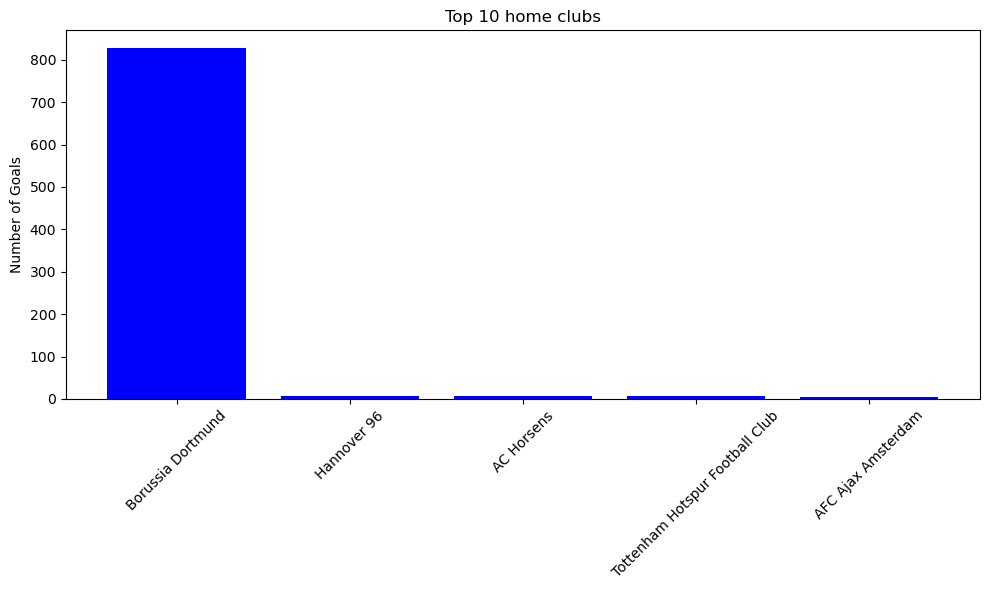

In [261]:
plt.figure(figsize=(10, 6))
plt.bar(team_perf['home_club_name'] ,team_perf['home_club_goals'], color='blue', label='Home Goals')
plt.xticks(rotation=45)
plt.ylabel('Number of Goals')
plt.title('Top 10 home clubs')
plt.tight_layout()
plt.show()

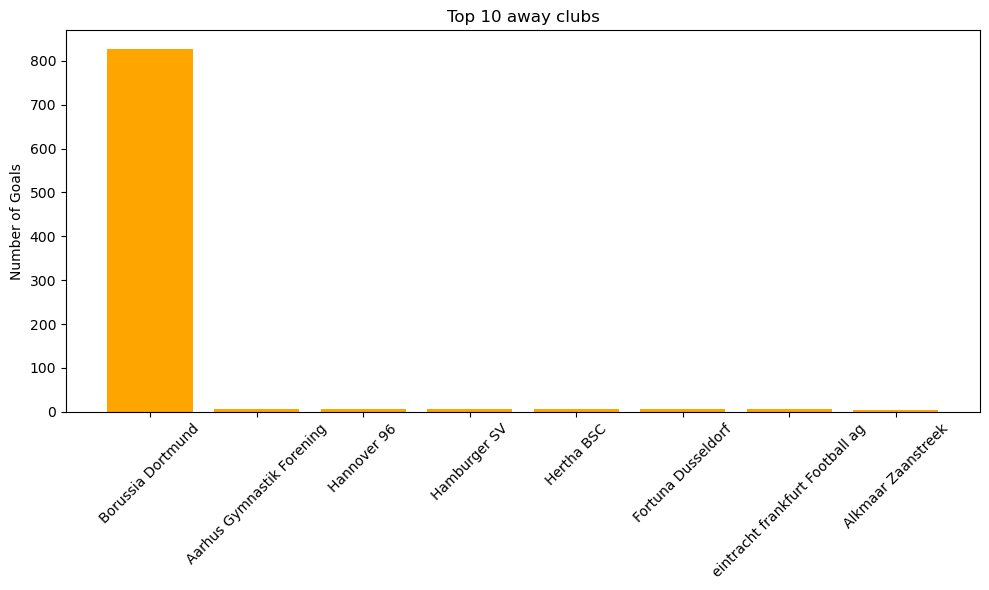

In [259]:
plt.figure(figsize=(10, 6))
plt.bar(team_perf['away_club_name'],team_perf['away_club_goals'], color='orange', label='Away Goals')
plt.xticks(rotation=45)
plt.ylabel('Number of Goals')
plt.title('Top 10 away clubs')
plt.tight_layout()
plt.show()

<Axes: xlabel='season', ylabel='home_club_goals'>

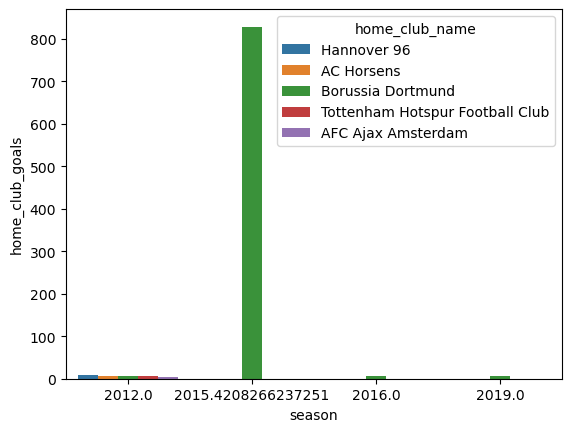

In [117]:
sns.barplot(x='season',y='home_club_goals',data=team_perf,hue='home_club_name')

# Interpretation:

In [140]:
#The home club "Borussia Dortmund" has the highest goal /winning points its above 800 (828) in the season of 2015.420827.
#I have visualized it using barplot and count plot.
#In bar plot I has displayed all home club names along with seasons.

# Business Question-2

# Performance comparison: home matches vs. away matches (goals scored and conceded).

In [164]:
perf_comparison=new_df.groupby(['home_club_name','away_club_name'])[['home_club_goals', 'away_club_goals']].sum()
perf_comparison=perf_comparison.sort_values(by=['home_club_goals', 'away_club_goals'],ascending=[False,False][:5]).reset_index()
top5=perf_comparison[:5]
top5

home_club_name                             away_club_name  \
0                Borussia Dortmund                          Borussia Dortmund   
1  Tottenham Hotspur Football Club                          Borussia Dortmund   
2                Borussia Dortmund            eintracht frankfurt Football ag   
3                Borussia Dortmund  Borussia Verein fur Leibesubung 1900 e.V.   
4                Borussia Dortmund                               Hamburger SV   

   home_club_goals  away_club_goals  
0      1380.017713      1115.537305  
1        29.651100        18.643854  
2        28.255502        24.643854  
3        26.208803        23.315083  
4        22.604402        12.630166

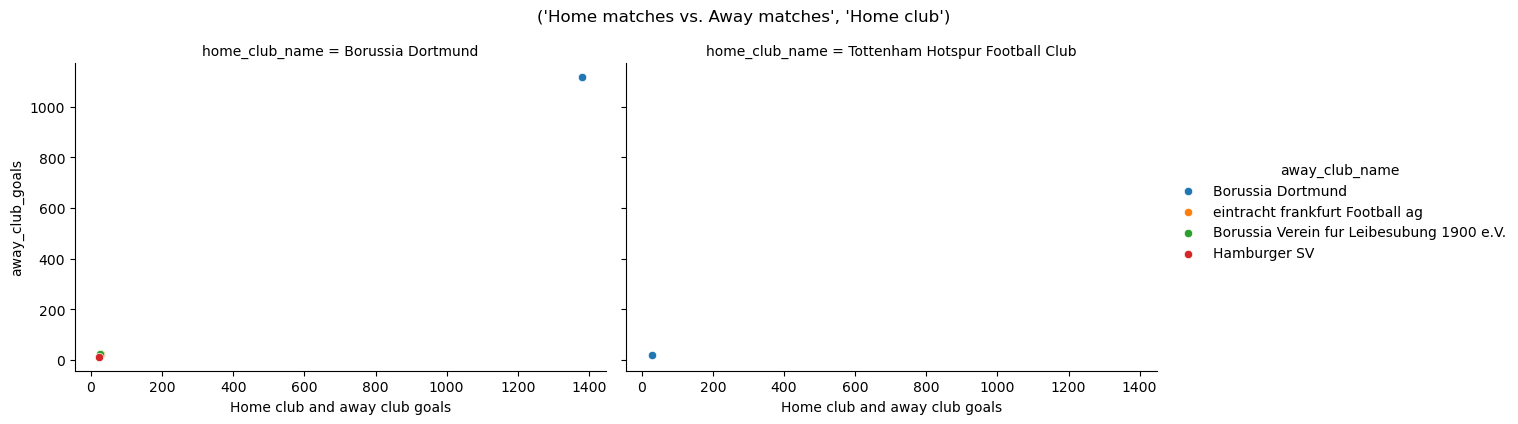

In [170]:
g=sns.FacetGrid(data=top5,col='home_club_name',hue='away_club_name',height=4,aspect=1.5)
g.map(sns.scatterplot,'home_club_goals', 'away_club_goals').add_legend()
g.set_axis_labels('Home club and away club goals')
g.fig.suptitle(('Home matches vs. Away matches','Home club'),y=1.05)
plt.show()

# Interpretation:

In [ ]:
Using FacetGrid with scatterplot I has identified that "Borussia Dortmund" is in peak of their goals
(Borussia Dortmund-->	Borussia Dortmund-->	1380.017713	1115.537305).
The very lowest goals will be (Borussia Dortmund->	Hamburger SV-->	22.604402	12.630166)

# Business question-3:

# Display top goal scorers and assist for each season?

In [75]:
topgoals=new_df.groupby('season')[['goals','assists']].count()
topgoals=topgoals.sort_values(by=['goals','assists'],ascending=[False,False][:5])
topgoals.index = topgoals.index.astype(int)
topgoals = topgoals.iloc[:10]
print(topgoals)

        goals  assists
season                
2015      828      828
2012      678      678
2018      500      500
2013      488      488
2019      462      462
2016      457      457
2017      384      384
2015      378      378
2014      315      315
2020       64       64


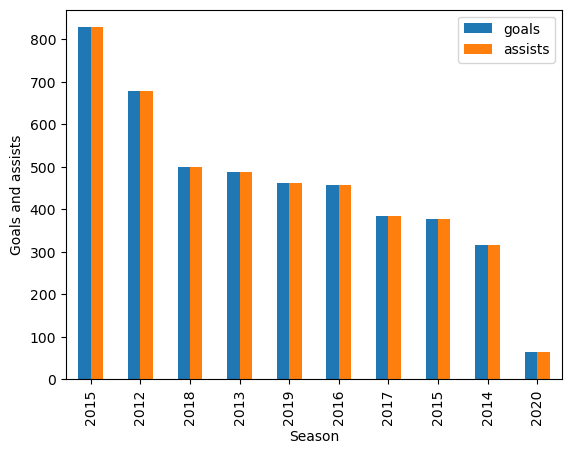

In [77]:
topgoals.plot(kind='bar',xlabel='Season',ylabel='Goals and assists')
plt.show()

# Interpretation:

In [ ]:
#Using stacked bar char in the season of 2015 has the highest goal and assists points its above 800.

# Business question-4:

# In which minute intervals are goals most frequently scored during matches?

In [263]:
bins = [0,15,30,45,60,75,90,105,120]
labels = ['0-15','16-30','31-45','46-60','61-75','76-90','91-105','106-120']


new_df['minute_interval']=pd.cut(new_df['minute'], bins=bins, labels=labels, right=False)


goals_by_interval=new_df['minute_interval'].value_counts().sort_index().reset_index()
print(goals_by_interval)

  minute_interval  count
0            0-15      0
1           16-30      0
2           31-45      0
3           46-60      0
4           61-75   4554
5           76-90      0
6          91-105      0
7         106-120      0


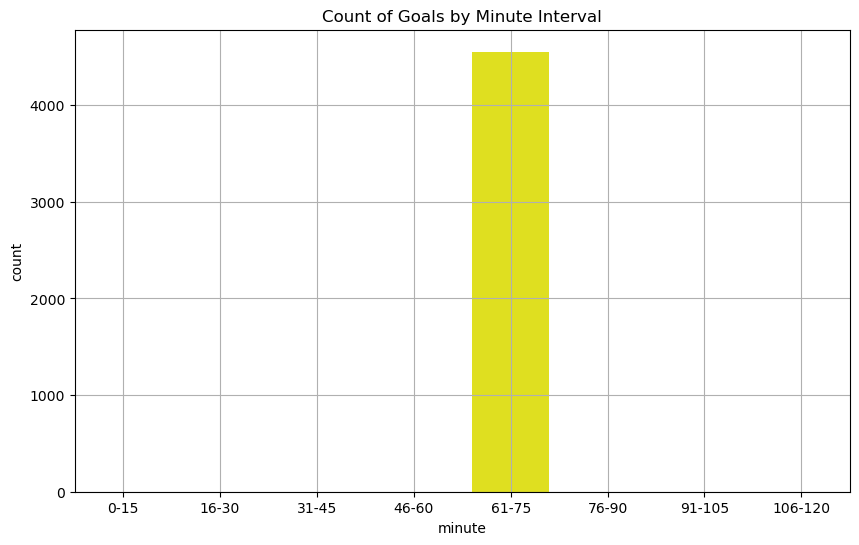

In [293]:
bins = [0,15,30,45,60,75,90,105,120]
labels = ['0-15','16-30','31-45','46-60','61-75','76-90','91-105','106-120']


x=pd.cut(new_df['minute'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10,6))
sns.countplot(x=x,color='yellow')
plt.title('Count of Goals by Minute Interval')
plt.grid()
plt.show()

# Interpretation:

In [ ]:
# Using countplot I have identified highest count is 0 for all minute interval only one minute interval of 61-75 is 4554c count.

# Hypothesis Testing:

# League Dynamics:
# Question: Is there a significant difference in average attendance between different competition types (e.g., competition_type)?

# Null and Alternate Hypothesis:

In [ ]:
Null Hypothesis (Ho): There is no significant difference in average attendance across competition types.
Alternative Hypothesis(Ha): There is a significant difference in average attendance across competition types.
# Tail type:
Two tail (left and right).

# Z-Test:

In [314]:
pop_mean=new_df['attendance'].mean()
pop_std=new_df['attendance'].std()
x_mean=new_df['attendance'].sample(45,replace=False,random_state=42)
x_mean=x_mean.mean()
n=45
alpha=0.05

In [316]:
z_stat=(x_mean-pop_mean)/(pop_std/math.sqrt(n))
z_crit=norm.ppf(1-alpha/2)
p_val=norm.sf(abs(z_stat))

In [324]:
print('Z-Statistical value=',z_stat)
print('Z-Critical Value=',z_crit)
print('Probability Value=',p_val)

Z-Statistical value= 0.774810971436276
Z-Critical Value= 1.959963984540054
Probability Value= 0.21922568263170428


# Statistical Decision:

In [326]:
if (z_stat<z_crit) and (p_val>alpha):
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

Accept Null Hypothesis


# Interpretation:

-->There is no significance difference in average attendance across competition types.
-->There is no significantly increased/decrease in average attendance.This improvement supports continuing the new technique for future performance.

# T-Test with 2 sample:

# Injury and Player Performance

# Question: Does the average number of minutes played differ significantly between players with yellow/red cards and those without?

# Null and Alternate hypothesis:

In [ ]:
Ho:There is no significance difference in the mean score of minute is equal.
Ha:There is significance difference in the mean score of minute is not equal.

In [336]:
s1=new_df['red_cards']
s2=new_df['yellow_cards']
n1=len(s1)
n2=len(s2)
s1_mean=np.mean(s1)
s2_mean=np.mean(s2)
s1_std=np.std(s1)
s2_std=np.std(s2)
df=n1+n2-2
alpha=0.1

# Tail type:
# Two tail (left and right, not equal to)

In [341]:
n=s1_mean-s2_mean
d=math.sqrt((s1_std**2*(n1-1)+s2_std**2*(n2-1))/df)*(math.sqrt(1/n1+1/n2))
T_stat=n/d
T_crit=t.ppf((1-alpha/2),df)
p_val=2*t.sf(abs(T_stat),df)
print('T_stat:',T_stat,'T_crit',T_crit,'P_value',p_val)


# T_crit in left side:
T_crit2=t.ppf((alpha/2),df)
print('T_crit2',T_crit2)

T_stat: -54.375658046785254 T_crit 1.6450209809074197 P_value 0.0
T_crit2 -1.6450209809074203


In [347]:
if T_stat<T_crit2 and p_val>alpha:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


# Interpretation:

Using T-Test the business conclusion is "Reject Null Hypothesis" ,So that there is significant difference in mean score of minute is not equal.

# Sprint=7

# Attendance and Stadium Analysis:

# Business Questions-1:

# 1. Which Matches and Teams Attract the Highest Attendance?

In [296]:
high_attendance_team=new_df.groupby(['home_club_name','away_club_name','competition_type','date_x'])['attendance'].count()
high_attendance_team=high_attendance_team.sort_values(ascending=False)[:5].reset_index()
high_attendance_team

home_club_name  \
0                                  Borussia Dortmund   
1                                         AC Horsens   
2    TSG 1899 Hoffenheim Football-Spielbetriebs GmbH   
3                                 Alkmaar Zaanstreek   
4  Eindhovense Voetbalvereniging Philips Sport Ve...   

              away_club_name competition_type     date_x  attendance  
0          Borussia Dortmund  domestic_league 2012-11-03         828  
1  Aarhus Gymnastik Forening  domestic_league 2012-08-27           5  
2                Hannover 96  domestic_league 2012-09-23           4  
3      Football Club Utrecht  domestic_league 2013-04-14           4  
4         Alkmaar Zaanstreek     domestic_cup 2013-05-09           4

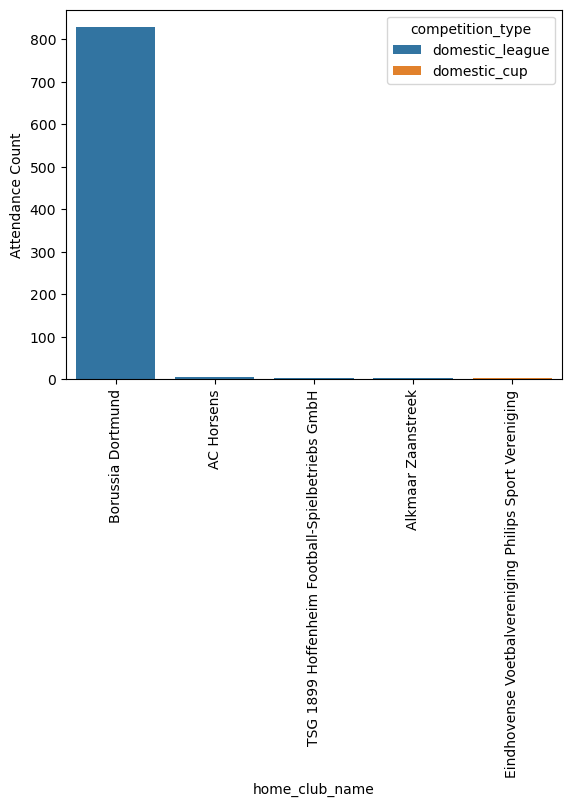

In [298]:
sns.barplot(x='home_club_name',y='attendance',hue='competition_type',data=high_attendance_team)
plt.ylabel('Attendance Count')
plt.xticks(rotation=90)
plt.show()

# Interpretation:

In domestic league match the home club and away club of "Borussia Dortmund" and "Borussia Dortmund"	at "2012-11-03" has highest attendance of 828.

===>These are the top =5 home and away club team they have highest attendance count.


Borussia Dortmund	Borussia Dortmund	domestic_league	2012-11-03	=828
1	AC Horsens	Aarhus Gymnastik Forening	domestic_league	2012-08-=27	
2	TSG 1899 Hoffenheim Football-Spielbetriebs GmbH	Hannover 96	domestic_league	2012-09=-23
3	Alkmaar Zaanstreek	Football Club Utrecht	domestic_league	2013-0=4-14
4	Eindhovense Voetbalvereniging Philips Sport Ve...	Alkmaar Zaanstreek	domestic_cup	2013-=0.-0	4


# Business question-2

# 2. How Does Attendance Vary Across Stadiums and Locations?

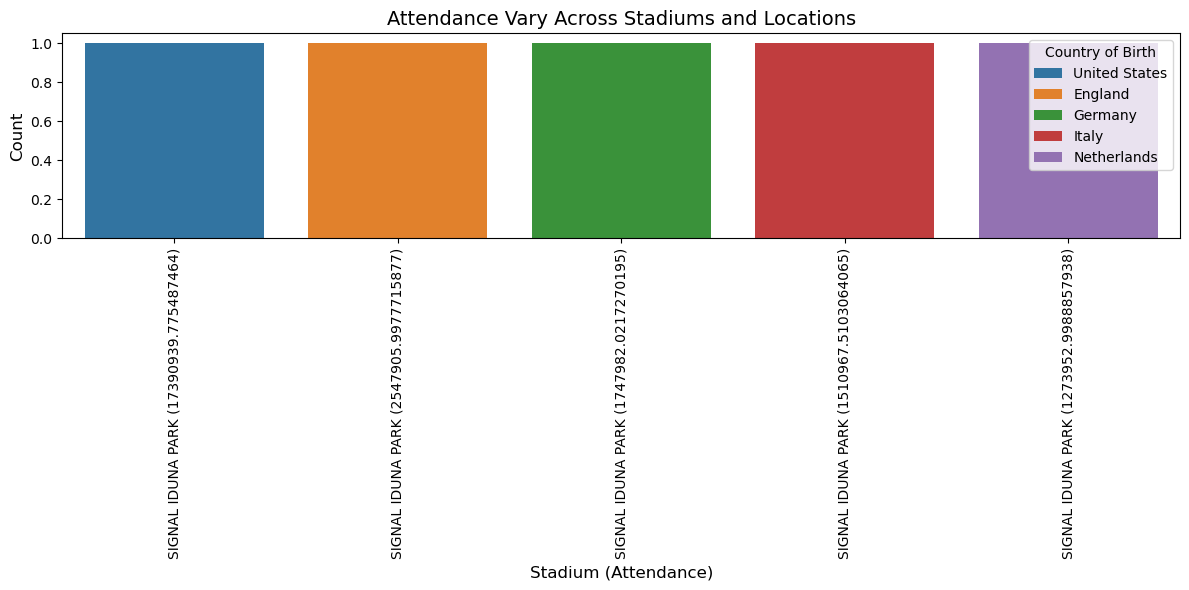

In [100]:
# Combine 'stadium' and 'attendance' into a single column for plotting
variance['stadium_attendance'] = variance['stadium'] + " (" + variance['attendance'].astype(str) + ")"

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=variance, x='stadium_attendance', hue='country_of_birth')
plt.title('Attendance Vary Across Stadiums and Locations', fontsize=14)
plt.xlabel('Stadium (Attendance)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Country of Birth')
plt.tight_layout()
plt.show()

In [96]:
variance=new_df.groupby(['stadium','season','country_of_birth'])['attendance'].sum()
variance=variance.sort_values(ascending=False)[:5].reset_index()
variance

stadium       season country_of_birth    attendance
0  SIGNAL IDUNA PARK  2015.420827    United States  1.739094e+07
1  SIGNAL IDUNA PARK  2015.420827          England  2.547906e+06
2  SIGNAL IDUNA PARK  2015.420827          Germany  1.747982e+06
3  SIGNAL IDUNA PARK  2015.420827            Italy  1.510968e+06
4  SIGNAL IDUNA PARK  2015.420827      Netherlands  1.273953e+06

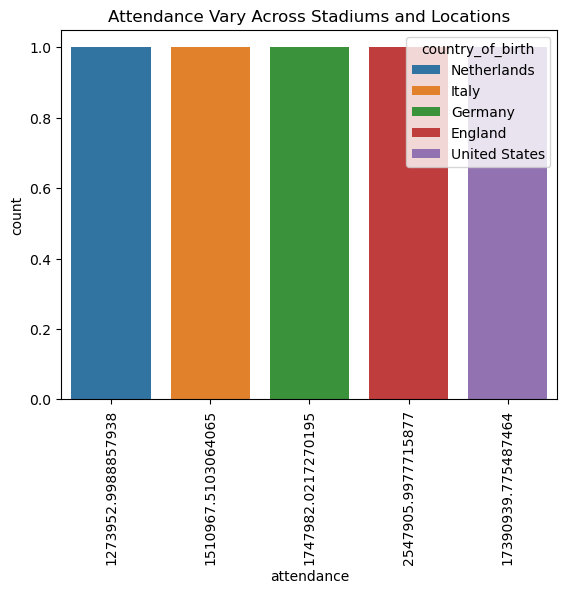

In [140]:
sns.countplot(data=variance,x='attendance',hue='country_of_birth')
plt.title('Attendance Vary Across Stadiums and Locations')
plt.xticks(rotation=90)
plt.show()

# Interpretation:

In [ ]:
Using countplot and barplot I has identified that stadium "SIGNAL IDUNA PARK,season="2015.420827",Country of birth="United States" with count of
"1.739094e+07". is in peak.

# Business Question=3:

# 3. What is the Impact of Stadium Size and Features on Attendance?

In [301]:
impact=pd.pivot_table(new_df,index=['stadium'],values=['attendance'],aggfunc=['count'])
impact=impact.sort_values(by=('count', 'attendance'),ascending=False)[:5]
impact

count
                         attendance
stadium                            
SIGNAL IDUNA PARK               938
Stadion im Borussia-Park        108
Veltins-Arena                   107
Commerzbank Arena                97
bet365 Stadium                   97

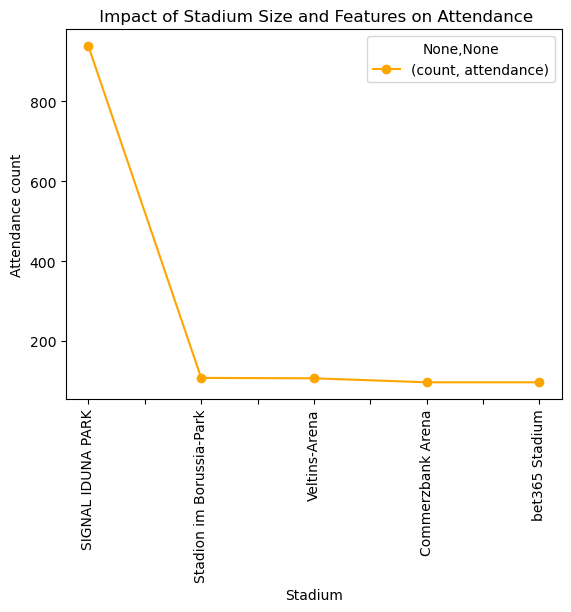

In [192]:
impact.plot(kind='line',color='orange',marker='o')
plt.title(' Impact of Stadium Size and Features on Attendance')
plt.xlabel('Stadium')
plt.ylabel('Attendance count')
plt.xticks(rotation=90)
plt.show()

# Interpretation:

In [ ]:
Using line chart I identified that the count of attendance is increasing or decreasing,So by analysis it has ensured that 
the count of attendance is decreasing across various stadium the peak stadium that has highest attendence count is "Signal Iduna Park" with 938 count.

# Business Question-4

# 4. What Trends Exist in Match Attendance Over Seasons?

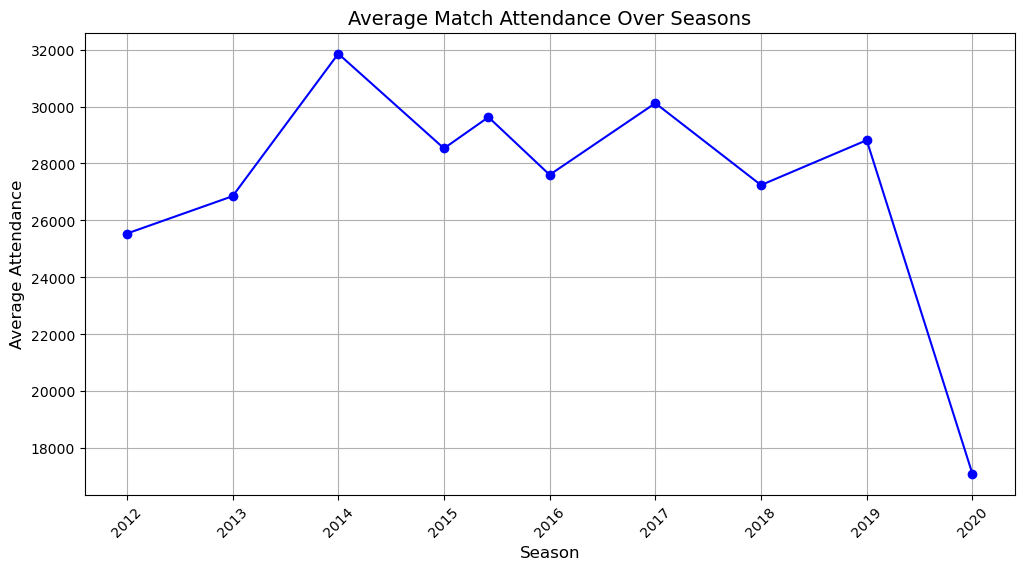

In [197]:
attendance_trends=new_df.groupby('season')['attendance'].mean().reset_index()
attendance_trends = attendance_trends.sort_values(by='season')

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(attendance_trends['season'], attendance_trends['attendance'], marker='o', linestyle='-', color='b')
plt.title('Average Match Attendance Over Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Interpretation:

In [ ]:
The mean value of attendance is fluctuation across all seasons from 2012 to 2020.Additionally in the year of 2014 the mean value is high.
Furthermore the second peak season will be 2017.

# K-Nearest Neighbors:

# "Can we classify the type of match (e.g., high-attendance vs. low-attendance) based on stadium characteristics and match attributes?"

# Predictors: Stadium name, competition type, season, home and away team rankings, previous attendance trends.
# Target Variable: Attendance Category (e.g., High, Medium, Low).

In [211]:
dff5=new_df.copy()

# Data Transformation:
# Categorical to numerical:

In [213]:
data=dff5['attendance']
bin=[0,600,900,10000]
label=['low','medium','high']
dff5['attendance']=pd.cut(data,bins=bin,labels=label)

In [215]:
lbl=preprocessing.LabelEncoder()
for col in dff5.columns:
    dff5[col]=lbl.fit_transform(dff5[col])

# Data Scaling:

In [217]:
mm=preprocessing.MinMaxScaler()
ss=preprocessing.StandardScaler()
new_df5=pd.DataFrame(mm.fit_transform(dff5),columns=dff5.columns)

# Correlation:

In [219]:
new_df5.corr()['attendance'].sort_values(ascending=False)[:10]

attendance                     1.000000
highest_market_value_in_eur    0.484836
competition_id_x               0.377567
competition_id_y               0.376909
stadium                        0.174458
last_season                    0.156341
away_club_position             0.139344
date_y                         0.127945
name                           0.109249
player_code                    0.109249
Name: attendance, dtype: float64

# Train test split:

In [221]:
print('=============Value counts============')
print(dff5['attendance'].value_counts().reset_index())
print('=============Unique values===========')
print(dff5['attendance'].unique())

# Changed attendance columns as 0,1,2,3 using pd.cut function.

=============Value counts============
   attendance  count
0           3   3855
1           0    677
2           1     18
3           2      4
=============Unique values===========
[3 0 1 2]


In [252]:
x=new_df5[['stadium','competition_type','season','home_club_position','away_club_position']]
y=new_df5['attendance']
y=y[y.isin([0,1,2])]


valid_indices = y.notna()
x = x[valid_indices]
y = y[valid_indices]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)
print('======x_train================')
print(x_train)
print('======x_test================')
print(x_test)
print('======y_train================')
print(y_train)
print('======y_test================')
print(y_test)

======x_train================
       stadium  competition_type    season  home_club_position  \
2187  0.030812          0.333333  0.888889            0.117647   
961   0.722689          0.333333  0.000000            0.941176   
2109  0.591036          0.333333  0.555556            0.117647   
2174  0.361345          0.000000  0.777778            0.529412   
3917  0.672269          0.333333  0.444444            0.529412   
...        ...               ...       ...                 ...   
321   0.854342          0.333333  0.000000            0.764706   
4066  0.672269          0.333333  0.444444            0.529412   
3980  0.176471          0.333333  0.777778            0.823529   
931   0.854342          0.333333  0.222222            0.764706   
1984  0.324930          0.333333  0.222222            0.235294   

      away_club_position  
2187            0.421053  
961             0.736842  
2109            0.210526  
2174            0.473684  
3917            0.473684  
...            

In [200]:
y=new_df5[['attendance']].isnull().sum()
y

attendance    0
dtype: int64

In [231]:
y.isnull().sum()

attendance    22
dtype: int64

In [241]:
y.dropna(inplace=True)

In [243]:
y.isnull().sum()

attendance    0
dtype: int64

In [ ]:
# Fit algorithm:

In [254]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

# Prediction:

In [259]:
predict_y=KNN.predict(x_test)
print(predict_y)

[0. 0. 1. ... 0. 0. 0.]


# Model Evaluation:

In [270]:
print('Accuracy=',accuracy_score(predict_y,y_test))
print('f1-score=',f1_score(predict_y,y_test))
print('Recall score=',recall_score(predict_y,y_test))
print('Precision score=',precision_score(predict_y,y_test))
print('Confusion matrix=',confusion_matrix(predict_y,y_test))

Accuracy= 0.8507462686567164
f1-score= 0.3609022556390977
Recall score= 0.4528301886792453
Precision score= 0.3
Confusion matrix= [[921 112]
 [ 58  48]]


# Interpretation:

In [ ]:
#The model shows accuracy (85%), but low F1 score (36%), recall (45%), and precision (30%) indicate struggles with identifying true positives
#and avoiding false positives.Improving recall score should be needed.

Accuracy= 0.8507462686567164
f1-score= 0.3609022556390977
Recall score= 0.4528301886792453
Precision score= 0.3
Confusion matrix= [[921 112]
 [ 58  48]]

# Confusion matrix:
True negative:921
False Positive:112
False negative:58
True positive:48

# So by this we can fix that the accuracy is good when we are going to predict target on the basis of 'stadium','competition_type','season','home_club_position','away_club_position'.

In [295]:
k_value=range(1,8)
cv_score=[]
for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
    cv_score.append(score.mean())

# optimal K:
optimal_k=k_value[np.argmax(cv_score)]
print(f'The optimal number of neighbors is ={optimal_k}')

The optimal number of neighbors is =2


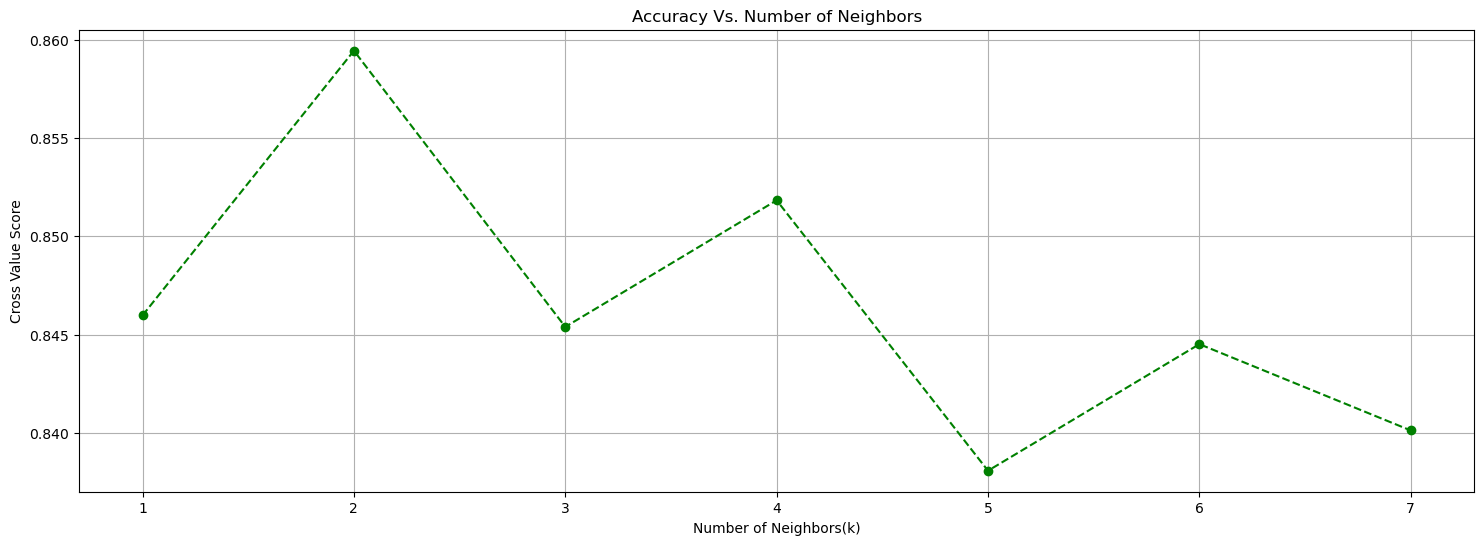

In [314]:
plt.figure(figsize=(18,6))
plt.plot(k_value,cv_score,marker='o',linestyle='--',color='g')
plt.title('Accuracy Vs. Number of Neighbors')
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Cross Value Score')
plt.grid()
plt.show()

# Interpretation:

In [ ]:
# When we are using K-value from 1-8 (7) (features) using brootforce technique,we can identify that 2 features is enough to do KNN.Its accuracy is good.
# I used odd number=7(K).
# When i am using the k value=7 the optimal value(maximum ) value is =2 with the percentage of 86%.

# Sprint=8

# Substitution Analysis in sql:

In [40]:
pip install mysql-connector-python 

Note: you may need to restart the kernel to use updated packages.


In [48]:
import mysql.connector as sql

In [58]:
from  sqlalchemy import create_engine

In [60]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [64]:
hostname='localhost'
user='root'
pw='12345678'
db='capston_project'

In [68]:
engine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname,db=db,user=user,pw=pw))

In [72]:
new_df.to_sql('End_project',engine,index=False)

4554

# Event Analsis:

# Business question-1
# What is the distribution of key events (e.g., goals, fouls, cards, substitutions) across different match periods (e.g., first half, second half, extra time)?

In [305]:
new=new_df.copy()

In [309]:
new.insert(50,'match_periods',value=np.nan)

In [311]:
new.loc[new['minutes_played']>=45,'match_periods']='First half'
new.loc[new['minutes_played']<=45,'match_periods']='Second half'

In [351]:
key_events=new.groupby(['player_name_x','goals','yellow_cards','red_cards','assists', 'minutes_played','match_periods'])['match_periods'].count().sort_values(ascending=False)[:10]
key_events

player_name_x        goals     yellow_cards  red_cards  assists   minutes_played  match_periods
Fabian Johnson       0.145352  0.134068      0.003224   0.076303  70.705803       First half       832
Brad Guzan           0.145352  0.134068      0.003224   0.076303  90.000000       First half       144
Tim Howard           0.145352  0.134068      0.003224   0.076303  90.000000       First half       133
Geoff Cameron        0.145352  0.134068      0.003224   0.076303  90.000000       First half       116
John Anthony Brooks  0.145352  0.134068      0.003224   0.076303  90.000000       First half       113
Timothy Chandler     0.145352  0.134068      0.003224   0.076303  90.000000       First half        97
Fabian Johnson       0.145352  0.134068      0.003224   0.076303  90.000000       First half        86
DeAndre Yedlin       0.145352  0.134068      0.003224   0.076303  90.000000       First half        69
Fabian Johnson       0.145352  0.134068      0.003224   0.076303  84.000000     

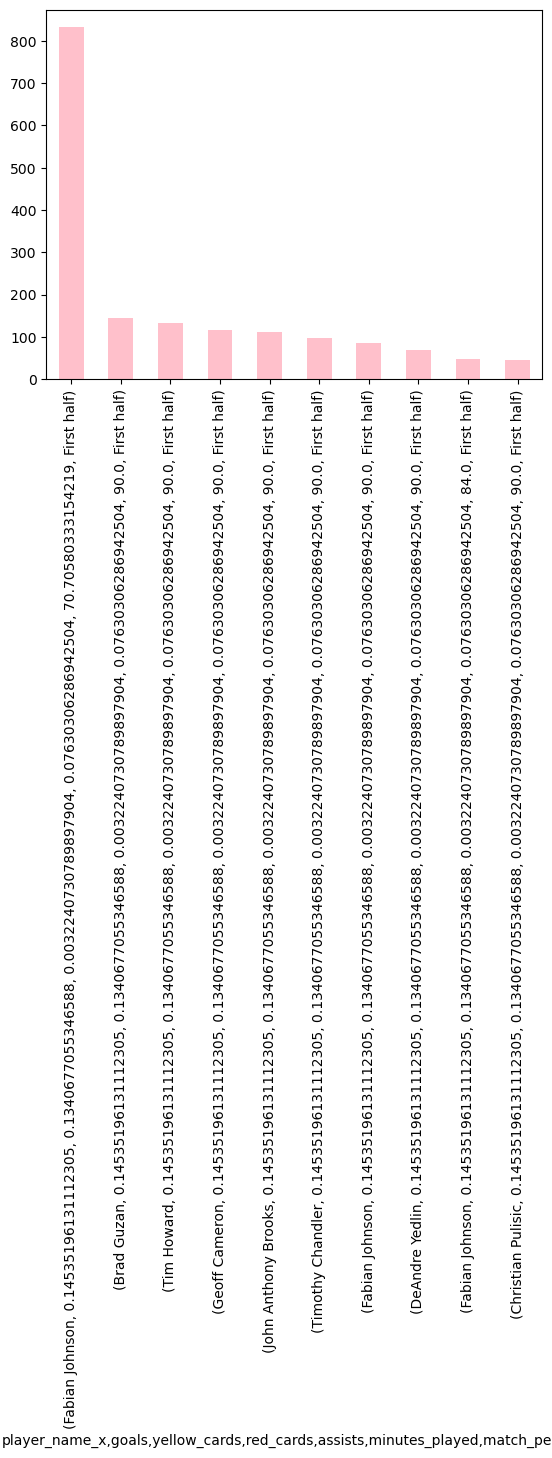

In [357]:
key_events.plot(kind='bar',color='pink')
plt.show()

# Interpretation:

In [ ]:
==>Using group by with key events of goals, fouls(red card), cards, substitutions,most high match periods played by the players in first half with the 
count of 1656 and minutes played about 90 minutes.
==> Second half is very less played by players with minute of 45 and count is =1.

# Business question-2:
# How do specific events, such as early goals or red cards, correlate with match outcomes?

In [315]:
new1=new.copy()

In [317]:
lbl=preprocessing.LabelEncoder()
new1['match_periods']=lbl.fit_transform(new1['match_periods'])

In [319]:
new1['match_periods'].unique()

array([0, 1])

In [321]:
new_df.columns

Index(['date_x', 'player_name_x', 'competition_id_x', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'game_event_id',
       'date_y', 'minute', 'type_x', 'description', 'type_y', 'number',
       'player_name_y', 'team_captain', 'position_x', 'competition_id_y',
       'season', 'round', 'date', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'name',
       'last_season', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name', 'minute_interval'],
      dtype='object')

In [327]:
correlation=new1[['red_cards', 'goals', 'match_periods','market_value_in_eur', 'highest_market_value_in_eur', 'height_in_cm']].corr()
print(correlation)

                             red_cards     goals  match_periods  \
red_cards                          NaN       NaN            NaN   
goals                              NaN  1.000000      -0.013813   
match_periods                      NaN -0.013813       1.000000   
market_value_in_eur                NaN -0.069665       0.000516   
highest_market_value_in_eur        NaN  0.006769      -0.024690   
height_in_cm                       NaN -0.035069      -0.030591   

                             market_value_in_eur  highest_market_value_in_eur  \
red_cards                                    NaN                          NaN   
goals                                  -0.069665                     0.006769   
match_periods                           0.000516                    -0.024690   
market_value_in_eur                     1.000000                     0.270128   
highest_market_value_in_eur             0.270128                     1.000000   
height_in_cm                            0.01

<Axes: >

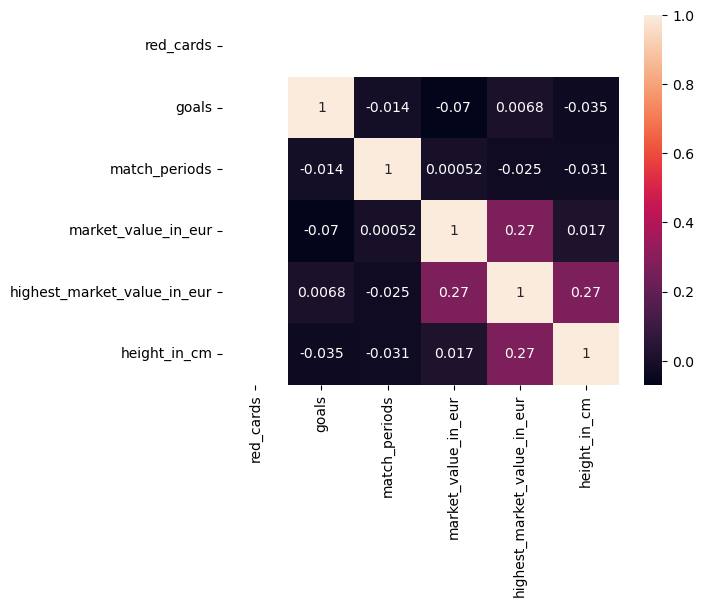

In [128]:
sns.heatmap(correlation,annot=True)

# Interpretation:

In [ ]:
==>When correlation is done with red_cards,goals ,match_outcome it shows negative relationship,it refers when one variable(feature) is 
increasing another feature is decreasing / when one feature is decreasing other feature is increasing.

==> It shows very low relationship between each other as -0.014.
==> It is displayed using heatmap.

# Business objective-3:
# Are there identifiable trends or hotspots in the spatial location of events (e.g., fouls, passes, shots) during matches?

In [329]:
new.groupby(['description','position_x','match_periods'])['match_periods'].count().sort_values(ascending=False)

description                                                position_x   match_periods
, Tactical                                                 Centre-Back  First half       3578
                                                                        Second half       104
, Not reported                                             Centre-Back  First half         66
, Right-footed shot, 1. Goal of the Season                 Centre-Back  First half         40
1. Yellow card  , Foul                                     Centre-Back  First half         33
                                                                                         ... 
, Penalty, 1. Goal of the Season Assist: Handball by       Centre-Back  First half          1
, Penalty, 1. Tournament Goal Assist: , Fouled player      Centre-Back  First half          1
, Penalty, 1. Tournament Goal Assist: Handball by          Centre-Back  First half          1
, Penalty, 12. Goal of the Season Assist: , Fouled player  Centre-Ba

In [331]:
filter=new1[new1['description'].isin(['1. Yellow card  , Foul','8. Yellow card  , Foul'])]
filter

date_x        player_name_x competition_id_x  yellow_cards  \
0    2012-08-26       Jermaine Jones               L1      1.000000   
28   2012-09-18       Jermaine Jones               CL      1.000000   
39   2013-08-17       Jermaine Jones               L1      1.000000   
66   2013-10-22       Jermaine Jones               CL      1.000000   
285  2012-10-31        Oguchi Onyewu              CDR      1.000000   
303  2012-11-03        Clint Dempsey              GB1      1.000000   
348  2012-08-26      Michael Bradley              IT1      1.000000   
400  2012-09-16       Fabian Johnson               L1      1.000000   
613  2012-11-24        Geoff Cameron              GB1      1.000000   
638  2013-01-15        Geoff Cameron              FAC      1.000000   
677  2014-01-26        Geoff Cameron              FAC      1.000000   
783  2012-09-16       Danny Williams               L1      1.000000   
888  2013-05-09        Jozy Altidore              NLP      1.000000   
939  2012-07-22     Clarence Goodson              DK1      1.000000   
946  2013-03-17     Clarence Goodson              DK1      1.000000   
1132 2013-03-16       Sacha Kljestan              BE1      1.000000   
1166 2013-09-17       Sacha Kljestan               CL      1.000000   
1195 2012-07-29    Michael Parkhurst              DK1      1.000000   
1249 2012-10-06     Timothy Chandler               L1      1.000000   
1273 2013-08-04     Timothy Chandler              DFB      1.000000   
1274 2013-08-18     Timothy Chandler               L1      1.000000   
1583 2012-09-02          Eric Lichaj              GB1      1.000000   
1725 2012-11-03       Fabian Johnson               L1      0.134068   
1730 2012-11-03       Fabian Johnson               L1      0.134068   
1892 2012-11-26      Aron Johannsson              DK1      1.000000   
2048 2014-04-06  John Anthony Brooks               L1      1.000000   
2230 2012-11-03       Fabian Johnson               L1      0.134068   
2328 2013-08-18    Babajide Ogunbiyi              DK1      1.000000   
2413 2012-11-03       Fabian Johnson               L1      0.134068   
2459 2012-07-22        Conor O'Brien              DK1      1.000000   
2485 2012-11-01        Conor O'Brien              DKP      1.000000   
2493 2013-08-11        Conor O'Brien              DK1      1.000000   
2543 2014-01-05    Sebastian Lletget              FAC      1.000000   
2572 2012-11-03       Fabian Johnson               L1      0.134068   
3157 2012-11-03       Fabian Johnson               L1      0.134068   
3387 2012-11-03       Fabian Johnson               L1      0.134068   
3669 2012-11-03       Fabian Johnson               L1      0.134068   
3884 2012-11-03       Fabian Johnson               L1      0.134068   
4004 2012-11-03       Fabian Johnson               L1      0.134068   
4126 2012-11-03       Fabian Johnson               L1      0.134068   

      red_cards     goals   assists  minutes_played  \
0      0.003224  0.145352  0.076303       90.000000   
28     0.003224  0.145352  0.076303       90.000000   
39     0.003224  0.145352  0.076303       90.000000   
66     0.003224  0.145352  0.076303       71.000000   
285    0.003224  1.000000  0.076303       90.000000   
303    0.003224  0.145352  0.076303       90.000000   
348    0.003224  0.145352  0.076303       90.000000   
400    0.003224  0.145352  0.076303       90.000000   
613    0.003224  0.145352  0.076303       90.000000   
638    0.003224  0.145352  0.076303      120.000000   
677    0.003224  0.145352  0.076303       90.000000   
783    0.003224  0.145352  0.076303       90.000000   
888    0.003224  1.000000  0.076303       88.000000   
939    0.003224  0.145352  0.076303       90.000000   
946    0.003224  0.145352  0.076303       90.000000   
1132   0.003224  0.145352  0.076303       90.000000   
1166   0.003224  0.145352  0.076303       90.000000   
1195   0.003224  0.145352  0.076303       78.000000   
1249   0.003224  0.145352  0.076303       90.000000 

<Figure size 2200x600 with 0 Axes>

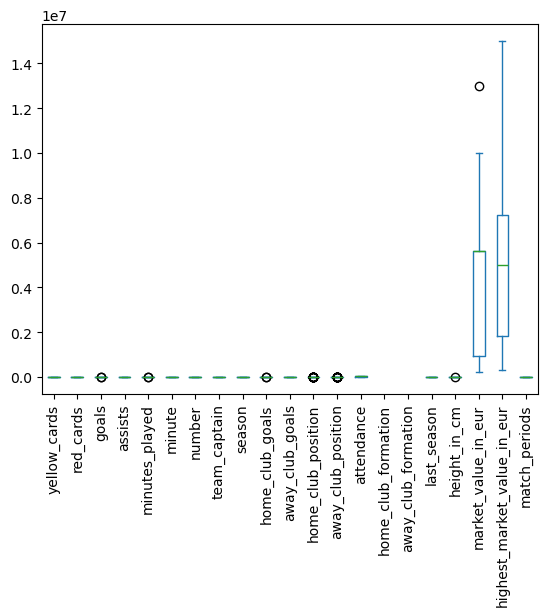

In [333]:
plt.figure(figsize=(22,6))
filter.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

# Interpretation:

In [ ]:
#Using various plot like boxplot I has displayed all the possible trends using description in fouls and yellow cards,
#so most of the events are occured with yellowcards,fouls and tactical, with the highest count of 3578,104,66.

# Business objective-4:
# How do weather conditions or stadium characteristics influence the frequency and type of match events?

In [335]:
match_event=new.groupby(['stadium','season','description','type_x','minutes_played','match_periods'])['minutes_played'].sum()
match_event=match_event.sort_values(ascending=False)[:5]
match_event

stadium            season       description  type_x         minutes_played  match_periods
SIGNAL IDUNA PARK  2015.420827  , Tactical   Substitutions  70.705803       First half       43979.009672
Villa Park         2012.000000  , Tactical   Substitutions  90.000000       First half        2070.000000
Goodison Park      2014.000000  , Tactical   Substitutions  90.000000       First half        1890.000000
                   2012.000000  , Tactical   Substitutions  90.000000       First half        1710.000000
Villa Park         2013.000000  , Tactical   Substitutions  90.000000       First half        1710.000000
Name: minutes_played, dtype: float64

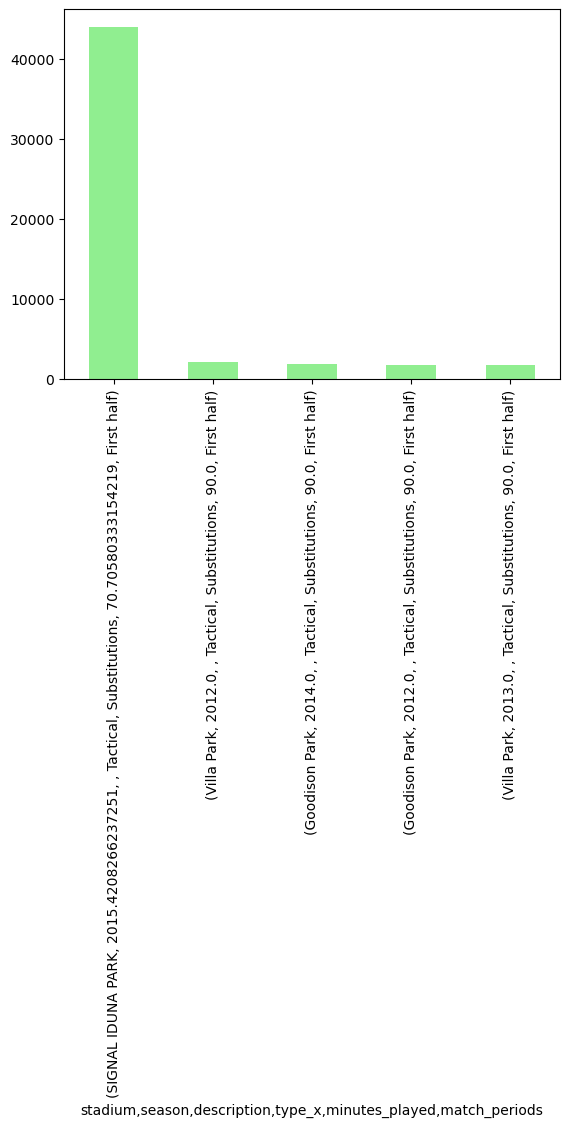

In [341]:
match_event.plot(kind='bar',color='lightgreen')
plt.show()

# Interpretation:

In [ ]:
==>Signal Iduna Park (2015) had the highest tactical substitutions in the first half, with 43,979 minutes played, followed by Villa Park (2012, 2013) 
and Goodison Park (2014, 2012).
==>Tactical adjustments were consistently prominent in the first half across these stadiums.

# Sprint=9

#  Competition Type:
# Are the average goals per match significantly different across various competition types?

# Z-test:

In [ ]:
Null hypothesis: There is no significant difference in average goals per match across various competition types.(old theory/believe) 
Alternate hypothesis: There is significant difference in average goals per match across various competition types.
Hypothesis test based on left tail because the average goals may decrease / less then the old theory/believe,

In [ ]:
Test tail type:
Left tail

In [35]:
goals=new_df['home_club_goals']+new_df['away_club_goals']
goals

0       4.000000
1       4.000000
2       4.000000
3       4.000000
4       4.000000
          ...   
4649    2.979871
4650    2.979871
4651    2.979871
4652    2.979871
4653    2.979871
Length: 4554, dtype: float64

In [52]:
pop_mean=goals.mean()
pop_std=goals.std()
samp=new_df.sample(n=50,random_state=50)
fetch_samp=samp['goals']
n=len(fetch_samp)
x_mean=fetch_samp.mean()
alpha=0.5
#LOS=95%

In [54]:
z_stat=(x_mean-pop_mean)/(pop_std-math.sqrt(n))
z_crit=norm.ppf(alpha)
p_val=norm.sf(abs(z_stat))

In [58]:
print(f'Z-Statistical value:{z_stat}\nZ-Critical Value:{z_crit}\nProbability Value:{p_val}\n')

Z-Statistical value:0.46527890984516174
Z-Critical Value:0.0
Probability Value:0.32086586794792094



# Statistical Conclusion:

In [72]:
if (z_stat<z_crit) and (p-val>alpha):
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


# Interpretation:

In [ ]:
# The statistical conclusion is "Reject Null Hypotheis" so that there is significant difference in average goals per match across various competition types.
# Finally the conclusion is the prediction may change in future.

# Competitive Analysis:
# Business question-1:
# 1. Performance Trends Across Competitions
# How do team performances (e.g., wins, draws, losses) vary across different competition types?

In [361]:
new.insert(51,'Team_performance',value=np.nan)

In [363]:
# Create a new column 'Team_performance' based on the conditions:
new['Team_performance'] = np.where(new['home_club_goals'] > new['away_club_goals'], 'Win',np.where(new['home_club_goals'] <
                                                                                                   new['away_club_goals'], 'Loss', 'Draw'))

# Display the first few rows to verify the results:
print(new[['home_club_goals', 'away_club_goals', 'Team_performance']])

      home_club_goals  away_club_goals Team_performance
0              2.0000         2.000000             Draw
1              3.0000         1.000000              Win
2              3.0000         1.000000              Win
3              2.0000         2.000000             Draw
4              2.0000         2.000000             Draw
...               ...              ...              ...
4649           1.6511         1.328771              Win
4650           1.6511         1.328771              Win
4651           1.6511         1.328771              Win
4652           1.6511         1.328771              Win
4653           1.6511         1.328771              Win

[4554 rows x 3 columns]


In [365]:
# Without reset_index():
diff=new.groupby(['competition_type','Team_performance'])['Team_performance'].count()
diff=diff.sort_values(ascending=False)
diff

competition_type   Team_performance
domestic_league    Win                 2446
                   Loss                 985
                   Draw                 577
domestic_cup       Win                  152
international_cup  Win                  138
domestic_cup       Loss                 106
international_cup  Loss                  76
                   Draw                  53
domestic_cup       Draw                  12
other              Win                    6
                   Loss                   3
Name: Team_performance, dtype: int64

In [262]:
# Using reset_index():

diff = new.groupby(['competition_type', 'Team_performance'])['Team_performance'].count()
diff = diff.sort_values(ascending=False).reset_index(name='count')
print(diff)

     competition_type Team_performance  count
0     domestic_league              Win   2446
1     domestic_league             Loss    985
2     domestic_league             Draw    577
3        domestic_cup              Win    152
4   international_cup              Win    138
5        domestic_cup             Loss    106
6   international_cup             Loss     76
7   international_cup             Draw     53
8        domestic_cup             Draw     12
9               other              Win      6
10              other             Loss      3


<Axes: xlabel='competition_type', ylabel='count'>

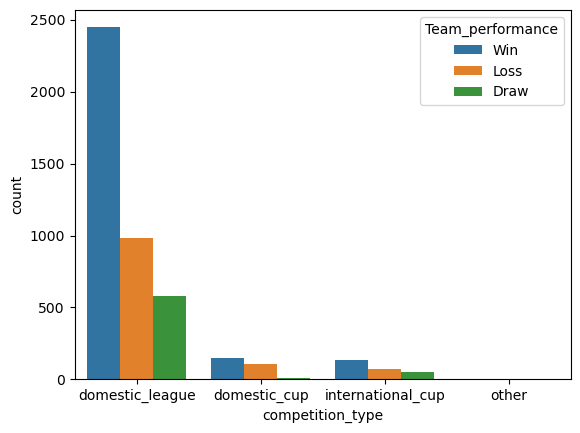

In [264]:
sns.barplot(data=diff,x='competition_type',y='count',hue='Team_performance')

# Interpretation:

In [ ]:
The team performance vary across different competition based on 'Win','Losses','Draw'.
So the highest count for competition type of "domestic_league" is almost "winning" with a count of 2446.

'Competition type'             'perf'  'count'
1.domestic_league              Win   2446
2.domestic_league             Loss    985
3.domestic_league             Draw    577

# Business question-2:
# 2. Team Rankings and Position Changes
# Which teams have shown consistent improvement or decline in their league positions over multiple seasons?

In [367]:
improvement= new.groupby(['season','competition_type','Team_performance'])['Team_performance'].count()
improvement=improvement.sort_values(ascending=False).reset_index(name='count')
improvement

season   competition_type Team_performance  count
0   2015.420827    domestic_league              Win    828
1   2012.000000    domestic_league              Win    277
2   2018.000000    domestic_league              Win    242
3   2013.000000    domestic_league              Win    223
4   2019.000000    domestic_league              Win    187
..          ...                ...              ...    ...
78  2014.000000       domestic_cup             Draw      1
79  2019.000000       domestic_cup             Draw      1
80  2015.000000              other             Loss      1
81  2016.000000       domestic_cup             Draw      1
82  2020.000000  international_cup              Win      1

[83 rows x 4 columns]

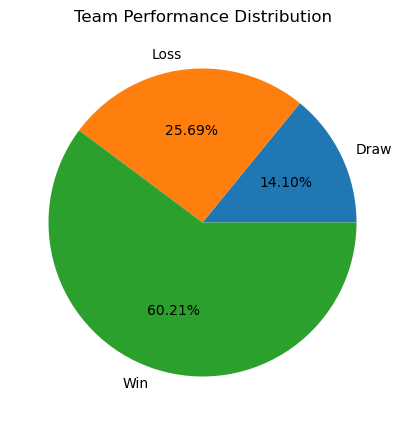

In [379]:
performance_counts=improvement.groupby('Team_performance')['count'].sum()

plt.figure(figsize=(10, 5))
plt.pie(performance_counts,labels=performance_counts.index,autopct='%.2f%%')
plt.title('Team Performance Distribution') 
plt.show()

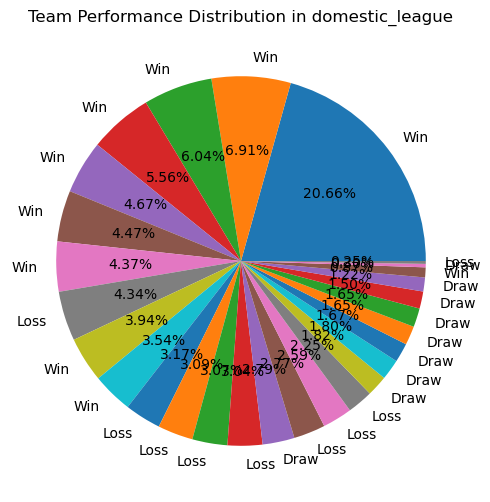

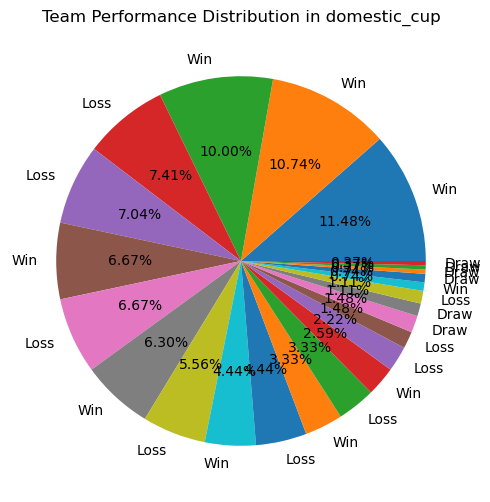

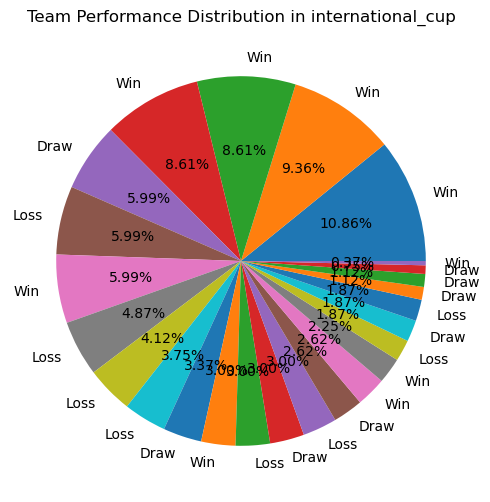

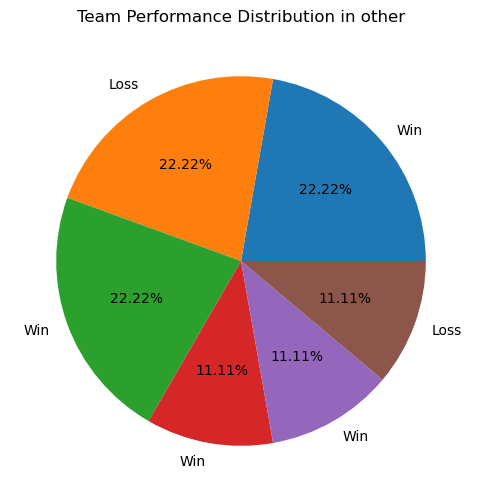

In [224]:
for comp_type in improvement['competition_type'].unique():
    subset = improvement[improvement['competition_type']==comp_type]
    plt.figure(figsize=(6, 6))
    plt.pie(subset['count'], labels=subset['Team_performance'], autopct='%.2f%%')
    plt.title(f"Team Performance Distribution in {comp_type}")
    plt.show()

# Interpretation:

In [ ]:
# Using pie chart I has displayed what are the scores got by players in all competition type.
# so that in Domestic _league most of the players are 'win' with 20.66%
# In Domestic_cup most of the players are 'Win' with 11.48%
# In International_cup most of the players are 'Win' with 10.86%
# In Other matches most of the players are equal in all level of 'win','loss',and 'draw'.

# Business question-3:
# 3. Goal Scoring and Defensive Strengths
# Which teams have the highest average goals scored and the lowest goals conceded per match?

In [391]:
high_low= new.groupby(['season','competition_type','Team_performance'])['goals'].mean()
high_low=high_low.sort_values(ascending=False).reset_index(name='mean')
high_low

season   competition_type Team_performance      mean
0   2020.0       domestic_cup              Win  1.000000
1   2018.0              other              Win  1.000000
2   2017.0              other              Win  1.000000
3   2012.0       domestic_cup             Loss  0.802973
4   2015.0  international_cup             Draw  0.715117
..     ...                ...              ...       ...
78  2016.0       domestic_cup             Draw  0.145352
79  2016.0  international_cup             Draw  0.145352
80  2017.0       domestic_cup             Draw  0.145352
81  2017.0  international_cup             Loss  0.145352
82  2020.0  international_cup              Win  0.145352

[83 rows x 4 columns]

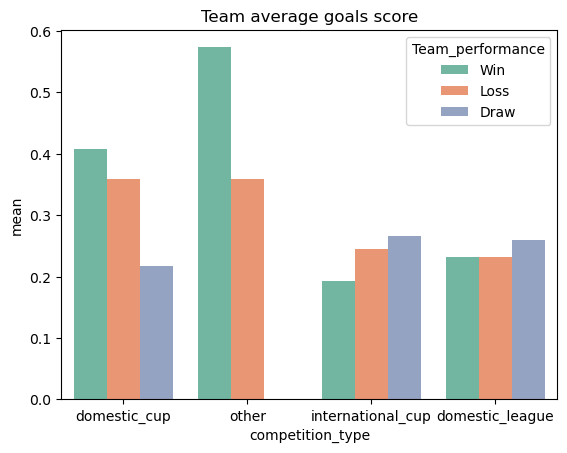

In [395]:
sns.barplot(data=high_low,x='competition_type',y='mean',hue='Team_performance',palette='Set2',ci=None)
plt.title('Team average goals score')
plt.show()

# Interpretation:

In [ ]:
# Using advanced barplot and groupby with competition type,team performance and mean value of average goals,
# the conclusion is that "Other" competition type is highest in average goals with the average value of 5.000000.
# In second "International match" the football players 'Won' the match with the average goals score of 4.138026.
# The third "International match" the foolball players 'Loss' the match with the average goals score of 3.864755.

# Business question-4:
# 4. Head-to-Head Analysis
# What are the win/loss records of teams in key rivalries?
# Rivalries refer to strong, competitive.

In [398]:
win_loss=pd.pivot_table(new,index=['Team_performance','competition_type'],values=['goals'])
win_loss=win_loss.sort_index(ascending=False).reset_index()
win_loss

Team_performance   competition_type     goals
0               Win              other  0.572676
1               Win  international_cup  0.213476
2               Win    domestic_league  0.214511
3               Win       domestic_cup  0.395734
4              Loss              other  0.430235
5              Loss  international_cup  0.286034
6              Loss    domestic_league  0.232136
7              Loss       domestic_cup  0.388769
8              Draw  international_cup  0.225979
9              Draw    domestic_league  0.263152
10             Draw       domestic_cup  0.287793

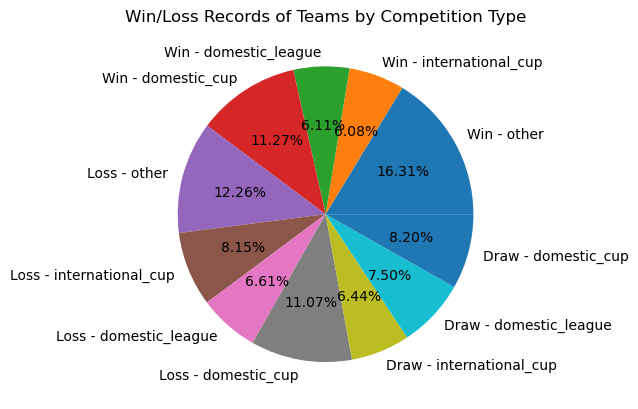

In [400]:
win_loss['label'] = win_loss['Team_performance'] + ' - ' + win_loss['competition_type']

plt.pie(x=win_loss['goals'], labels=win_loss['label'], autopct='%.2f%%')
plt.title('Win/Loss Records of Teams by Competition Type')
plt.show()

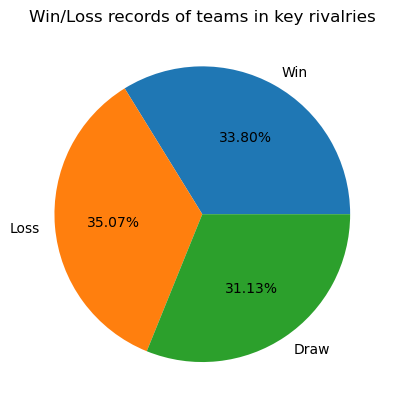

In [326]:
win_loss=pd.pivot_table(new,index=['Team_performance'],values=['goals'])
win_loss=win_loss.sort_index(ascending=False).reset_index()
win_loss

plt.pie(x=win_loss['goals'],labels=win_loss['Team_performance'],autopct='%.2f%%')
plt.title('Win/Loss records of teams in key rivalries')
plt.show()

# Interpretation:

In [ ]:
# Using pie chart I identified that most of the matches played by football players are 'Loss' with 35.07%,Secondly with a 'Win' score 33.80%,
# and finally 'match draw' with a percentage of 31.13%.
# Thus all the win/loss scores are displayed using pie chart for each team performance.

# Sprint=10:

# Player Attributes and Demographics

# Business Questions for Player Attributes and Demographics:
# Business question-1:
# Performance by Player Demographics:
# How do players countries of birth impact their market value, goals scored, or overall performance metrics?

In [151]:
perf_analysis=pd.pivot_table(new_df,index=['country_of_birth'],values=['goals', 'assists', 'market_value_in_eur'],aggfunc=['mean'])
perf_analysis=perf_analysis.sort_values(by=[('mean','market_value_in_eur')],ascending=False)[:10].reset_index()
perf_analysis

country_of_birth      mean                              
                     assists     goals market_value_in_eur
0      Netherlands  0.076303  0.190587        1.000000e+07
1         Ethiopia  0.076303  0.145352        5.634921e+06
2            UdSSR  0.076303  0.430499        5.634921e+06
3          England  0.076303  0.179538        3.784400e+06
4    United States  0.076303  0.243482        3.159619e+06
5          Germany  0.076303  0.212819        2.845219e+06
6          Nigeria  0.076303  0.145352        1.500000e+06
7            Italy  0.076303  0.279321        8.000000e+05
8          Ireland  0.076303  0.145352        5.000000e+05
9         Colombia  0.076303  0.328491        4.000000e+05

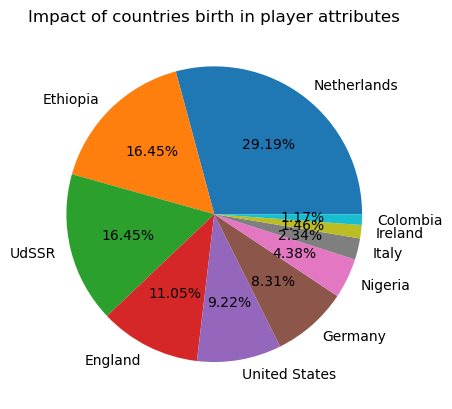

In [153]:
plt.pie(perf_analysis[('mean','market_value_in_eur')],autopct='%.2f%%',labels=perf_analysis['country_of_birth'])
plt.title('Impact of countries birth in player attributes')
plt.show()

# Interpretation:

In [ ]:
# Using pivot table with pie chart and bar chart the conclusion is "Netherlands" with mean market value=1.000000e+07(29.19%) is in peak.
# The second highest is "Ethiopie and UdSSR" with the highest value of 16.45%.
# The third most top is 'England' with mean market value of 11.05%.
# Finally the last part that the country of birth may or may not impact performance metrics.Most of these attributes are caused impact.

# Business questions-2:
# Physical Attributes and Performance:
# Do foot preferences (left/right) correlate with player positions and roles on the field?

In [402]:
physical_perf=new_df.groupby(['foot','position_y'])['position_y'].count()
physical_perf=physical_perf.sort_values(ascending=False)
physical_perf

foot   position_y
right  Attack        1424
       Midfield      1096
       Defender      1007
       Goalkeeper     278
left   Defender       240
both   Midfield       201
left   Goalkeeper     152
       Attack         129
both   Attack          17
left   Midfield        10
Name: position_y, dtype: int64

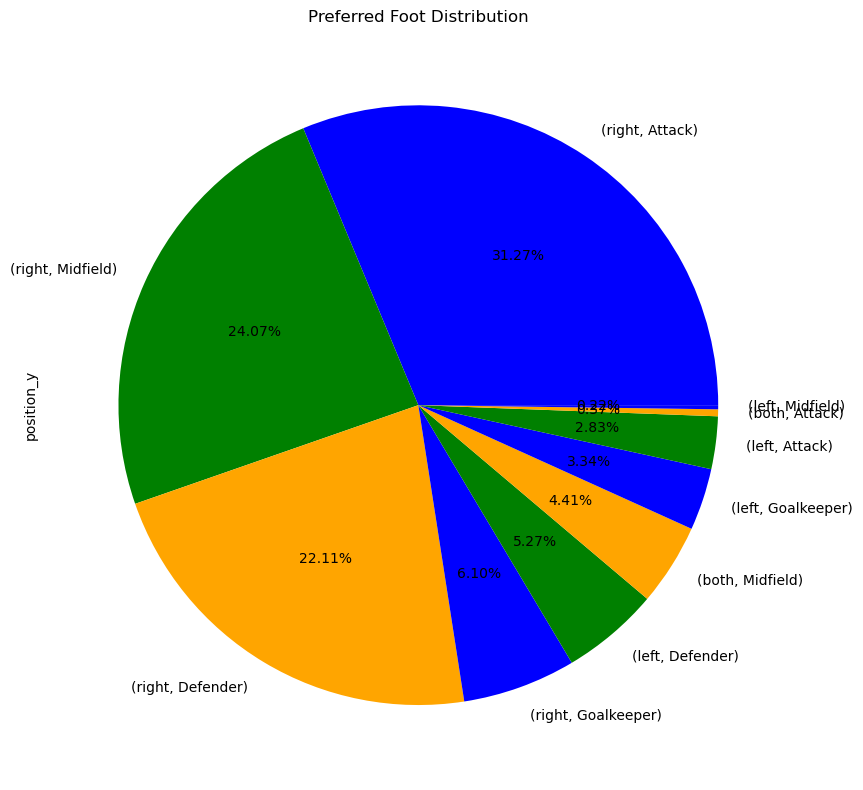

In [406]:
plt.figure(figsize=(10,8))
physical_perf.plot(kind='pie',autopct='%.2f%%',colors=['blue', 'green', 'orange'],title='Preferred Foot Distribution')
plt.tight_layout()
plt.show()

In [220]:
physical_perf=new_df.groupby('foot')['position_y'].count()
physical_perf=physical_perf.sort_values(ascending=False)
physical_perf

foot
right    3805
left      531
both      218
Name: position_y, dtype: int64

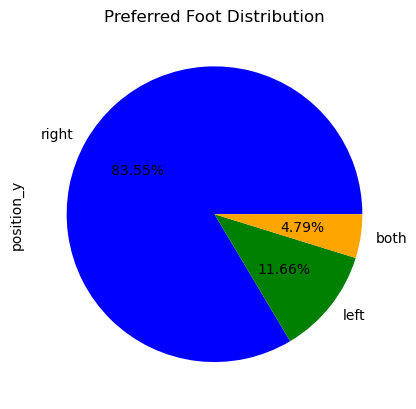

In [224]:
physical_perf.plot(kind='pie',autopct='%.2f%%',colors=['blue', 'green', 'orange'],title='Preferred Foot Distribution')
plt.show()

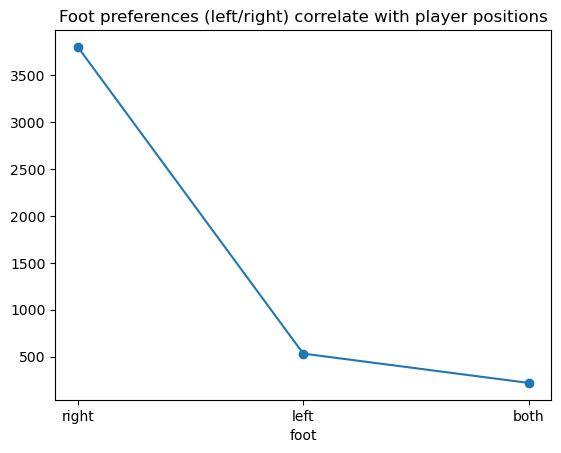

In [222]:
plt.scatter(x=physical_perf.index,y=physical_perf.values)
physical_perf.plot(kind='line')
plt.title('Foot preferences (left/right) correlate with player positions')
plt.show()

# Interpretation:

In [ ]:
==> Using pie chart ,connected scatter plot I has identified that the line is downward when it comes in both case.
    
==>While using pie chart the left foot showed with a percentage of 11.66%,right foot showed 83.55%  and when in both foot
it showed the percentage of 4.79% of position_y.So that I concluded it with when a person preferred right foot in position most
of the player position is in 'Attack mode'.

==>The very low count of position_y is for left foot with 10.

# Business question-3:
# Is there a trend between the highest market value (in EUR) and players' contract expiration dates?

In [321]:
new_df[['contract_expiration_date','date_x','date_y','date']].dtypes

# Verified that all the columns are datetime.So there is not need to covert into datetime.

contract_expiration_date    datetime64[ns]
date_x                      datetime64[ns]
date_y                      datetime64[ns]
date                        datetime64[ns]
dtype: object

In [239]:
trend=new_df.groupby('contract_expiration_date')['market_value_in_eur'].max()
trend=trend.sort_values(ascending=False).reset_index()
trend

contract_expiration_date  market_value_in_eur
0                2026-05-31         1.300000e+07
1                2025-06-30         1.200000e+07
2                2027-06-30         1.200000e+07
3                2024-06-30         1.000000e+07
4                2028-06-30         9.000000e+06
5                2023-06-30         5.634921e+06
6                2026-06-30         5.000000e+06
7                2025-12-31         2.500000e+06
8                2027-12-31         2.500000e+06
9                2024-12-31         2.000000e+06
10               2026-12-31         2.000000e+06
11               2023-12-31         1.000000e+06
12               2023-11-30         5.000000e+05
13               2024-05-31         4.000000e+05
14               2023-05-31         1.500000e+05

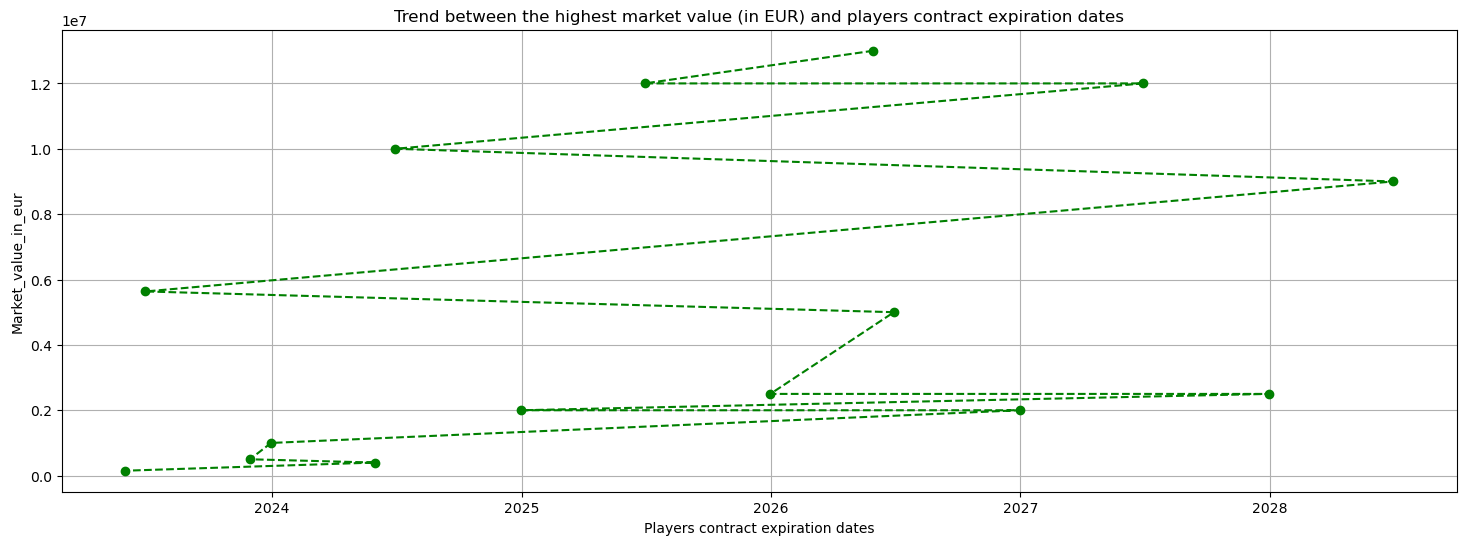

In [267]:
plt.figure(figsize=(18,6))
plt.plot(trend['contract_expiration_date'],trend['market_value_in_eur'],marker='o',linestyle='--',color='g')
plt.title("Trend between the highest market value (in EUR) and players contract expiration dates")
plt.xlabel('Players contract expiration dates')
plt.ylabel('Market_value_in_eur')
plt.grid()
plt.show()

# Interpretation:

In [ ]:
==>Using lineplot to find trend between players market value and contract_expiration_date,I has identified that there is 
fluctuating among those market values.
==> Using plot the trend line is highest in the year after 2026.So that we can say that overall conclusion is fluctuation trend line between
market value and expiration dates.
==>So we can't predict a particular date will high or low.

# Business question-4:
# Longevity and Contract Expiry Trends:
# Are certain demographics or physical attributes indicative of longer contracts or career spans?

In [408]:
demo_physical_attributes=new_df.groupby([ 'foot','contract_expiration_date','date_of_birth','height_in_cm'])[['goals','minutes_played','assists']].mean()
demo_physical_attributes=demo_physical_attributes.sort_values(by='goals',ascending=False)[:20]
demo_physical_attributes

goals  \
foot  contract_expiration_date date_of_birth height_in_cm             
right 2024-12-31               1990-11-10    184.00000     0.625352   
                               1989-11-06    185.00000     0.514731   
      2024-06-30               1983-03-09    185.00000     0.491174   
      2026-06-30               1996-09-21    192.00000     0.480679   
      2024-06-30               1995-12-05    180.00000     0.449615   
                               1988-11-17    175.00000     0.430499   
                               1982-05-13    193.00000     0.430235   
      2023-12-31               1992-11-15    180.00000     0.401940   
both  2023-11-30               1992-11-23    185.00000     0.328491   
right 2024-06-30               1999-04-30    175.00000     0.325278   
                               1996-04-09    170.00000     0.294915   
both  2024-06-30               1985-09-09    185.00000     0.291267   
right 2024-06-30               1988-11-28    183.00000     0.287793   
      2027-06-30               1998-09-18    177.00000     0.279914   
                               1997-12-24    178.00000     0.279321   
      2024-06-30               1987-12-11    183.00000     0.263765   
      2023-12-31               1987-04-29    182.00000     0.263548   
      2024-06-30               1982-05-17    193.00000     0.261895   
                               1984-01-24    183.70702     0.247910   
      2025-06-30               2000-02-20    185.00000     0.245364   

                                                           minutes_played  \
foot  contract_expiration_date date_of_birth height_in_cm                   
right 2024-12-31               1990-11-10    184.00000          79.777108   
                               1989-11-06    185.00000          82.847619   
      2024-06-30               1983-03-09    185.00000          83.740741   
      2026-06-30               1996-09-21    192.00000          86.570930   
      2024-06-30               1995-12-05    180.00000          74.133333   
                               1988-11-17    175.00000          79.272727   
                               1982-05-13    193.00000          87.392150   
      2023-12-31               1992-11-15    180.00000          80.731369   
both  2023-11-30               1992-11-23    185.00000          79.642857   
right 2024-06-30               1999-04-30    175.00000          74.761595   
                               1996-04-09    170.00000          75.950000   
both  2024-06-30               1985-09-09    185.00000          84.512195   
right 2024-06-30               1988-11-28    183.00000          81.500000   
      2027-06-30               1998-09-18    177.00000          78.647538   
                               1997-12-24    178.00000          76.743555   
      2024-06-30               1987-12-11    183.00000          83.758454   
      2023-12-31               1987-04-29    182.00000          82.654564   
      2024-06-30               1982-05-17    193.00000          87.045455   
                               1984-01-24    183.70702          85.680000   
      2025-06-30               2000-02-20    185.00000          75.114480   

                                                            assists  
foot  contract_expiration_date date_of_birth height_in_cm            
right 2024-12-31               1990-11-10    184.00000     0.076303  
                               1989-11-06    185.00000     0.076303  
      2024-06-30               1983-03-09    185.00000     0.076303  
      2026-06-30               1996-09-21    192.00000     0.076303  
      2024-06-30               1995-12-05    180.00000     0.076303  
                               1988-11-17    175.00000     0.076303  
                               1982-05-13    193.00000     0.076303  
      2023-12-31               1992-11-15    180.00000     0.076303  
both  2023-11-30               1992-11-23    185.00000     0.076303  
right 2024-06-30               199

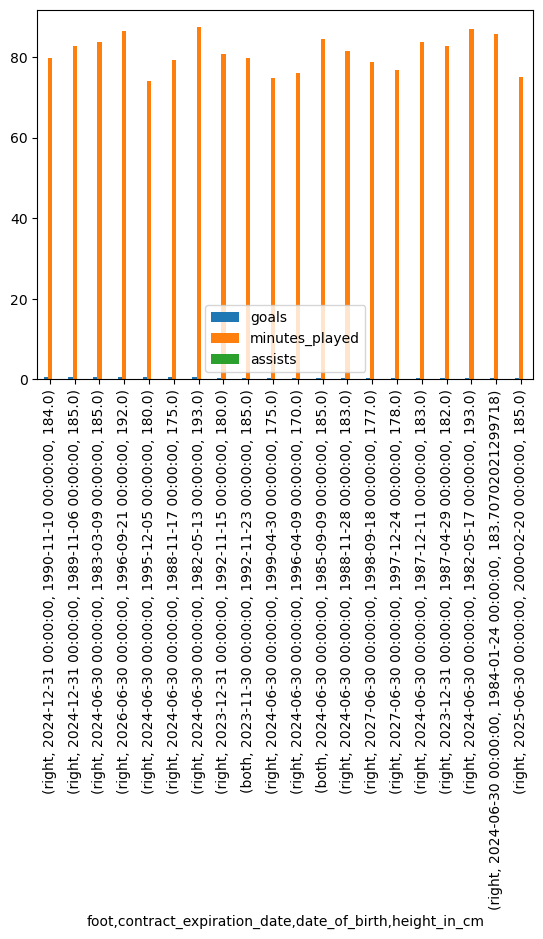

In [430]:
demo_physical_attributes.plot(kind='bar')
plt.show()

# Interpretation:

In [ ]:
#The table highlights the relationship between player physical attributes (dominant foot, height, date of birth) and contract expiration dates,
#showing that players with "right-footed" dominance and attributes like height (~184-185 cm) and experience (e.g., older players) tend to have
#better average goals per game and extended contracts, suggesting a preference for these attributes in impactful players.

# K-Means Clustering:
# "How can we categorize football players into different performance segments based on their game statistics, such as goals, assists, yellow/red cards, and minutes played?"

In [361]:
x=new_df.copy()

# Data Transformation:
# Categorical to numerical:

In [363]:
lbl=preprocessing.LabelEncoder()
for col in x.columns:
    x[col]=lbl.fit_transform(x[col])

# Data Scaling:

In [365]:
mm=preprocessing.MinMaxScaler()
ss=preprocessing.StandardScaler()
x=pd.DataFrame(mm.fit_transform(x),columns=x.columns)
print(x)

        date_x  player_name_x  competition_id_x  yellow_cards  red_cards  \
0     0.021327       0.461538               0.6           0.5        0.0   
1     0.025276       0.461538               0.6           0.0        0.0   
2     0.025276       0.461538               0.6           0.0        0.0   
3     0.036335       0.461538               0.6           0.5        0.0   
4     0.036335       0.461538               0.6           0.5        0.0   
...        ...            ...               ...           ...        ...   
4549  0.053712       0.384615               0.6           0.0        0.0   
4550  0.053712       0.384615               0.6           0.0        0.0   
4551  0.053712       0.384615               0.6           0.0        0.0   
4552  0.053712       0.384615               0.6           0.0        0.0   
4553  0.053712       0.384615               0.6           0.0        0.0   

      goals  assists  minutes_played  game_event_id    date_y  ...  \
0       0.0      

# Correlation:

In [388]:
x.corr()

goals  assists  minutes_played   cluster
goals           1.000000      NaN        0.033027  0.129011
assists              NaN      NaN             NaN       NaN
minutes_played  0.033027      NaN        1.000000 -0.841685
cluster         0.129011      NaN       -0.841685  1.000000

In [371]:
x=x[['goals', 'assists', 'minutes_played']]
kmeans=KMeans(n_clusters=3,random_state=51)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=51)

In [375]:
x['cluster']=kmeans.labels_
x['cluster']

0       0
1       1
2       1
3       2
4       2
       ..
4549    2
4550    2
4551    2
4552    2
4553    2
Name: cluster, Length: 4554, dtype: int32

In [377]:
kmeans.labels_ 
# Interpretation:
# Group is created (0=group1,1=group2,2=group3)

array([0, 1, 1, ..., 2, 2, 2])

In [384]:
x
# New column is added.

goals  assists  minutes_played  cluster
0       0.0      0.0        0.960784        0
1       0.5      0.0        0.960784        1
2       0.5      0.0        0.960784        1
3       0.0      0.0        0.627451        2
4       0.0      0.0        0.627451        2
...     ...      ...             ...      ...
4549    0.0      0.0        0.568627        2
4550    0.0      0.0        0.568627        2
4551    0.0      0.0        0.568627        2
4552    0.0      0.0        0.568627        2
4553    0.0      0.0        0.568627        2

[4554 rows x 4 columns]

# plot cluster with 2 features:

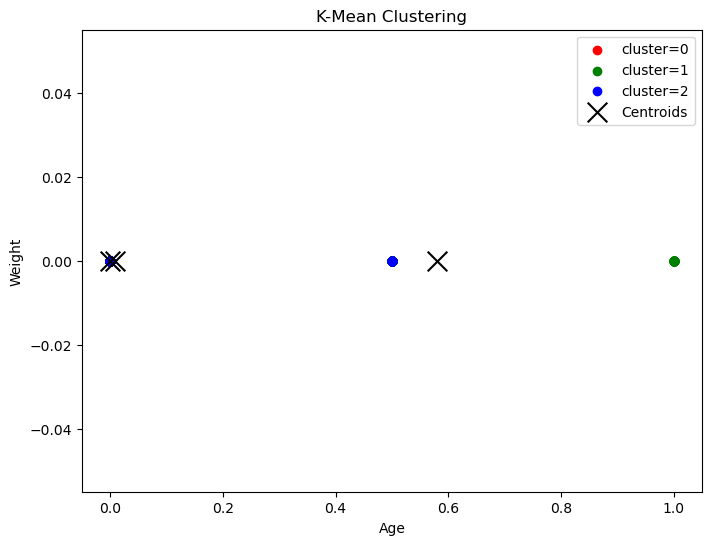

In [396]:
plt.figure(figsize=(8,6))
color=['red','green','blue']
for i in range(3):
    plt.scatter(x[x['cluster']==i]['goals'],
                x[x['cluster']==i]['assists'],
                 color=color[i],label=f'cluster={i}')

# plot cluster centroid:(to find the distance):
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='x',s=200,label='Centroids')
plt.title('K-Mean Clustering')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Silhouette Technique:

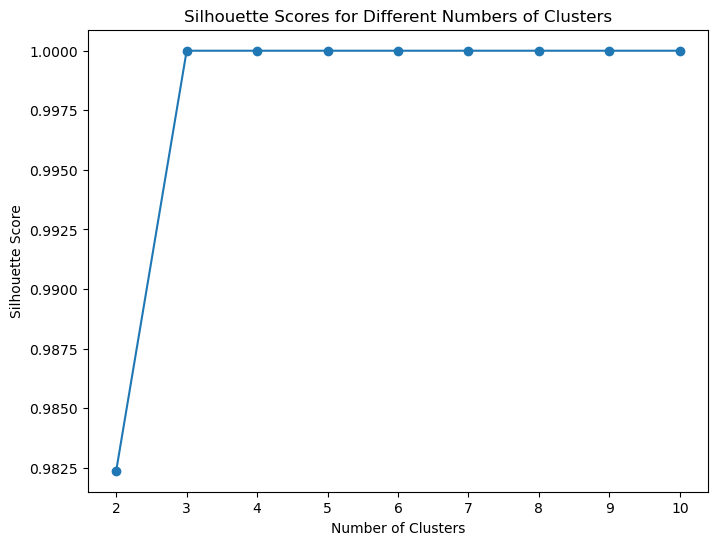

In [400]:
# Test silhouette scores for different numbers of clusters
scores = []
clusters_range = range(2, 11)

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x[['goals','assists']])
    cluster_labels = kmeans.labels_
    score = silhouette_score(x[['goals','assists']], cluster_labels)
    scores.append(score)

# Plot silhouette scores for each number of clusters
plt.figure(figsize=(8, 6))
plt.plot(clusters_range, scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Elbow method:

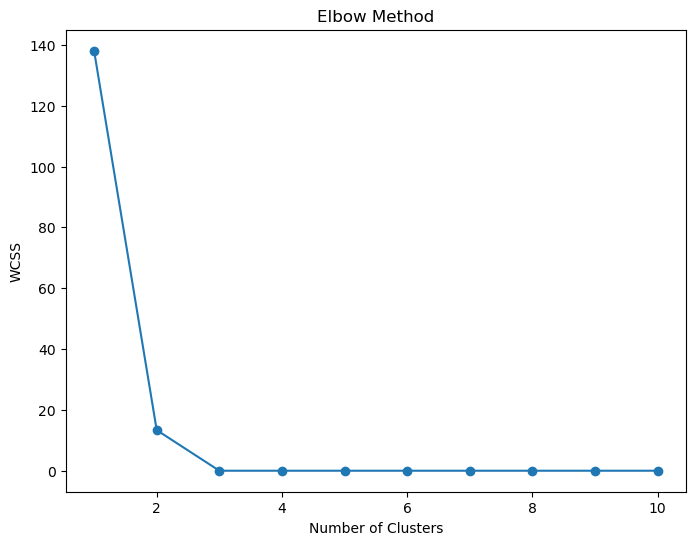

In [403]:
# Elbow method:
# Calculate the within-cluster sum of squares (WCSS)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x[['goals','assists']])
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Interrpretation:

In [ ]:
In both Silhouette score and elbow method. I has identified that, when we are using number of cluster=3 or 2,the result is good.
If not,the accuracy can be changed/might the result is not accurate.In Elbow method the cluster shows 3 or 2 will be accurate.